In [285]:
import pandas as pd

In [286]:
# load player data
# not individual stats, but personal info
players = pd.read_csv('./data/People.csv')

#load batting data
batting = pd.read_csv('./data/Batting.csv')

#load post season batting data
batting_post = pd.read_csv('./data/BattingPost.csv')

#load pitching data
pitching = pd.read_csv('./data/Pitching.csv')

#load post season pitching data
pitching_post = pd.read_csv('./data/PitchingPost.csv')

#load salary data
salaries = pd.read_csv('./data/Salaries.csv')

#load team data
teams = pd.read_csv('./data/Teams.csv')

#load fielding data
fielding = pd.read_csv('./data/Fielding.csv')

#load post season fielding data
fielding_post = pd.read_csv('./data/FieldingPost.csv')

In [287]:
#standardize column names
batting.columns = map(str.lower, batting.columns)
batting_post.columns = map(str.lower, batting_post.columns)
pitching.columns = map(str.lower, pitching.columns)
pitching_post.columns = map(str.lower, pitching_post.columns)
salaries.columns = map(str.lower, salaries.columns)
teams.columns = map(str.lower, teams.columns)
fielding.columns = map(str.lower, fielding.columns)
fielding_post.columns = map(str.lower, fielding_post.columns)
players.columns = map(str.lower, players.columns)

In [288]:
#rename 'yearid' column to year for ease
batting.rename(columns={'yearid':'year'}, inplace=True)
batting_post.rename(columns={'yearid':'year'}, inplace=True)
pitching.rename(columns={'yearid': 'year'}, inplace=True)
pitching_post.rename(columns={'yearid': 'year'}, inplace=True)
salaries.rename(columns={'yearid': 'year'}, inplace=True)
teams.rename(columns={'yearid': 'year'}, inplace=True)
fielding.rename(columns={'yearid': 'year'}, inplace=True)
fielding_post.rename(columns={'yearid':'year'}, inplace=True)

In [289]:
# concat post and regular season stats to get a true value for career stats
batting = pd.concat([batting, batting_post], join='inner')
pitching = pd.concat([pitching, pitching_post], join='inner')
fielding = pd.concat([fielding, fielding_post], join='inner')

In [290]:
#use fillna() to replace NaN for years stat wasn't recorded
#need to figure out a way to fix pitching data, since 0 will be beneficaial in a few cases
batting.fillna(value=0, inplace=True)
batting_post.fillna(value=0, inplace=True)
pitching.fillna(value=0, inplace=True)
pitching_post.fillna(value=0, inplace=True)
teams.fillna(value=0, inplace=True)
fielding.fillna(value=0, inplace=True)
fielding_post.fillna(value=0, inplace=True)

In [291]:
batting['period'] = batting['year']
batting['period'].replace(range(1871,1901), 0, inplace=True)
batting['period'].replace(range(1901,1920), 1, inplace=True)
batting['period'].replace(range(1920, 1942), 2, inplace=True)
batting['period'].replace(range(1942, 1961), 3, inplace=True)
batting['period'].replace(range(1961, 1977), 4, inplace=True)
batting['period'].replace(range(1977, 1994), 5, inplace=True)
batting['period'].replace(range(1994, 2006), 6, inplace=True)
batting['period'].replace(range(2006, 2018), 7, inplace=True)

In [292]:
pitching['period'] = pitching['year']
pitching['period'].replace(range(1871, 1901), 0, inplace=True)
pitching['period'].replace(range(1901, 1920), 1, inplace=True)
pitching['period'].replace(range(1920, 1942), 2, inplace=True)
pitching['period'].replace(range(1942, 1961), 3, inplace=True)
pitching['period'].replace(range(1961, 1977), 4, inplace=True)
pitching['period'].replace(range(1977, 1994), 5, inplace=True)
pitching['period'].replace(range(1994, 2006), 6, inplace=True)
pitching['period'].replace(range(2006, 2018), 7, inplace=True)

In [293]:
fielding['period'] = fielding['year']
fielding['period'].replace(range(1871, 1901), 0, inplace=True)
fielding['period'].replace(range(1901, 1920), 1, inplace=True)
fielding['period'].replace(range(1920, 1942), 2, inplace=True)
fielding['period'].replace(range(1942, 1961), 3, inplace=True)
fielding['period'].replace(range(1961, 1977), 4, inplace=True)
fielding['period'].replace(range(1977, 1994), 5, inplace=True)
fielding['period'].replace(range(1994, 2006), 6, inplace=True)
fielding['period'].replace(range(2006, 2018), 7, inplace=True)

In [294]:
#remove player with fewer than 100 at bats for a given year
# will need to re-evaluate number later
batting = batting[batting['ab'] >= 100]

In [295]:
# remove players with fewer than 10 game appearances for a given year
# again, will need to re-evaluate number later
pitching = pitching[pitching['g'] >= 10]

In [296]:
# remove players with fewer than 20 outfield appearances for a given year
# will need to re-evalute later for seasons with less than 162 games.
fielding = fielding[fielding['g'] >= 20]

In [297]:
# create batting average column
# I used basic batting average formula
batting['bavg'] = batting['h']/batting['ab']

In [298]:
# create on base percentage column
batting['obp'] = (batting['h']+batting['bb']+batting['hbp']) / (batting['ab']+batting['bb']+batting['hbp']+batting['sf'])

In [299]:
# create singles column
batting['1b'] = batting['h']-(batting['2b']+batting['3b']+batting['hr'])

In [300]:
# create slugging percentage column
batting['slg'] = (batting['1b']+(2*batting['2b'])+(3*batting['3b'])+(4*batting['hr'])) / batting['ab']

In [301]:
# create on base plus slugging column
batting['ops'] = batting['obp']+batting['slg']

In [302]:
# created estimated pitch count column to see trends over time
# this is an estimate used from metrics found elsewhere
# not an offical stat until 1954
pitching['est_pc'] = 3 * (pitching['h'] + (4 * pitching['bb']) + (3 * pitching['so']) + pitching['wp'])

In [303]:
# created fielding percentage column
fielding['fp%'] = ((fielding['po']+fielding['a']) / (fielding['po']+fielding['a']+fielding['e']))

In [304]:
# created range fielding per game column
fielding['rf/g'] = (fielding['po']+fielding['a']) / fielding['g']

In [305]:
# created walks plus hits per inning pitched
pitching['whip'] = (pitching['bb']+pitching['h']) / (3*pitching['ipouts'])

In [306]:
#round batting average down to 3 significant digits to better group players
batting = round(batting, 3)
pitching = round(pitching, 3)
fielding = round(fielding, 3)

In [307]:
#replace bats and throws with numbers
players['bats'].replace({'R':1, 'L':2, 'B':3,}, inplace=True)
players['throws'].replace({'R':1, 'L':2, 'S':4}, inplace=True)

In [308]:
# We only need certain data from player dataset
# Right =1
# Left =2
#Both =3
#S =4 : find what s means
players = players.groupby('playerid').sum()
players = players[['weight', 'height', 'bats', 'throws']]

## We need major league baseball data!

I realized while doing eda that there is minor league and alternative league stats for players. While this is cool to have, we don't need it for the scope of this project. So I will create new datasets with just the NL and AL league ids.

In [309]:
batting_al = batting[batting['lgid'] == 'AL']
batting_nl = batting[batting['lgid'] == 'NL']
batting = pd.concat([batting_al, batting_nl], axis=0)

In [310]:
pitching_al = pitching[pitching['lgid'] == 'AL']
pitching_nl = pitching[pitching['lgid'] == 'NL']
pitching = pd.concat([pitching_al, pitching_nl], axis=0)

In [311]:
fielding_al = fielding[fielding['lgid'] == 'AL']
fielding_nl = fielding[fielding['lgid'] == 'NL']
fielding = pd.concat([fielding_al, fielding_nl], axis=0)

In [312]:
teams_al = teams[teams['lgid'] == 'AL']
teams_nl = teams[teams['lgid'] == 'NL']
teams_mlb = pd.concat([teams_al, teams_nl], axis=0).shape

In [313]:
salaries_al = salaries[salaries['lgid'] == 'AL']
salaries_nl = salaries[salaries['lgid'] == 'NL']
salaries = pd.concat([salaries_al, salaries_nl], axis=0)

The players individual data doesn't include teams they played for, which is fine because this dataset will be used to reference player height and weight stats.

## Let's create some new datasets for career stats and stats by year and stats for player by year

### Batting

In [314]:
batters = batting.groupby('playerid').sum()
batters.drop(columns=(['year', 'bavg', 'obp', 'ops', 'slg','period']), inplace=True)
batters['years'] = batting.groupby('playerid')['year'].count()
batters['period'] = batting.groupby('playerid')['period'].mean()
batters['bavg'] = batting.groupby('playerid')['bavg'].mean()
batters['obp'] = batting.groupby('playerid')['obp'].mean()
batters['ops'] = batting.groupby('playerid')['ops'].mean()
batters['slg'] = batting.groupby('playerid')['slg'].mean()
batters = round(batters, 3)

In [315]:
batting_year = batting.groupby('year').sum()
batting_year.drop(columns=(['bavg', 'obp', 'ops', 'slg', 'period']), inplace=True)
batting_year['period'] = batting.groupby('year')['period'].mean()
# batting_year['trades'] = batting_year['stint']
# batting_year.drop(['stint'], axis=1, inplace=True)
batting_year['bavg'] = batting.groupby('year')['bavg'].mean()
batting_year['obp'] = batting.groupby('year')['obp'].mean()
batting_year['ops'] = batting.groupby('year')['ops'].mean()
batting_year['slg'] = batting.groupby('year')['slg'].mean()
batting_year = round(batting_year, 3)

In [316]:
batters_years = batting.groupby(['playerid', 'year']).sum()
batters_years.drop(columns=(['bavg', 'obp', 'ops', 'slg', 'period']), inplace=True)
batters_years['period'] = batting.groupby(['playerid', 'year'])['period'].mean()
# # # batters['years'] = batting.groupby(['playerid', 'year'])['year'].count()
batters_years['bavg'] = batting.groupby(['playerid', 'year'])['bavg'].mean()
batters_years['obp'] = batting.groupby(['playerid', 'year'])['obp'].mean()
batters_years['ops'] = batting.groupby(['playerid', 'year'])['ops'].mean()
batters_years['slg'] = batting.groupby(['playerid', 'year'])['slg'].mean()
batters_years = round(batters_years, 3)

In [317]:
batting_team = batting.groupby(['teamid']).sum()
batting_team.drop(columns=['year', 'bavg', 'obp', 'ops', 'slg', 'period'], inplace=True)
# batting_team['years'] = batting.groupby('teamid')['year'].count()
batting_team['period'] = batting.groupby('teamid')['period'].mean()
batting_team['bavg'] = batting.groupby('teamid')['bavg'].mean()
batting_team['obp'] = batting.groupby('teamid')['obp'].mean()
batting_team['ops'] = batting.groupby('teamid')['ops'].mean()
batting_team['slg'] = batting.groupby('teamid')['slg'].mean()
batting_team = round(batting_team, 3)

In [318]:
batting_team_year = batting.groupby(['teamid', 'year']).sum()
batting_team_year.drop(columns=['bavg', 'obp', 'ops', 'slg', 'period'], inplace=True)
batting_team_year['period'] = batting.groupby(['teamid', 'year'])['period'].mean()
batting_team_year['bavg'] = batting.groupby(['teamid', 'year'])['bavg'].mean()
batting_team_year['obp'] = batting.groupby(['teamid', 'year'])['obp'].mean()
batting_team_year['ops'] = batting.groupby(['teamid', 'year'])['ops'].mean()
batting_team_year['slg'] = batting.groupby(['teamid', 'year'])['slg'].mean()
batting_team_year = round(batting_team_year,3)

### Pitching

In [319]:
pitchers = pitching.groupby('playerid').sum()
pitchers.drop(columns=(['year', 'era', 'whip', 'period']), inplace=True)
pitchers['years'] = pitching.groupby('playerid')['year'].count()
pitchers['period'] = pitching.groupby('playerid')['period'].mean()
pitchers['era'] = pitching.groupby('playerid')['era'].mean()
pitchers['whip'] = pitching.groupby('playerid')['whip'].mean()
pitchers = round(pitchers, 3)

In [320]:
pitching_year = pitching.groupby('year').sum()
pitching_year.drop(columns=(['era','whip', 'period']), inplace=True)
# pitching_year['trades'] = pitching_year['stint']
# pitching_year.drop(['stint'], axis=1, inplace=True)
pitching_year['period'] = pitching.groupby('year')['period'].mean()
pitching_year['era'] = pitching.groupby('year')['era'].mean()
pitching_year['whip'] = pitching.groupby('year')['whip'].mean()
pitching_year = round(pitching_year, 3)

In [321]:
pitchers_years = pitching.groupby(['playerid', 'year']).sum()
pitchers_years.drop(columns=(['era','whip', 'period']), inplace=True)
# batters['years'] = batting.groupby(['playerid', 'year'])['year'].count()
pitchers_years['era'] = pitching.groupby(['playerid', 'year'])['era'].mean()
pitchers_years['period'] = pitching.groupby(['playerid', 'year'])['period'].mean()
pitchers_years['era'] = pitching.groupby(['playerid', 'year'])['whip'].mean()
pitchers_years = round(pitchers_years, 3)

In [322]:
pitching_team = pitching.groupby(['teamid']).sum()
pitching_team.drop(columns=['year', 'era', 'whip', 'period'], inplace=True)
pitching_team['era'] = pitching.groupby('teamid')['era'].mean()
pitching_team['period'] = pitching.groupby('teamid')['period'].mean()
pitching_team['whip'] = pitching.groupby('teamid')['whip'].mean()
pitching_team = round(pitching_team, 3)

In [323]:
pitching_team_year = pitching.groupby(['teamid', 'year']).sum()
pitching_team_year.drop(columns=['era', 'whip', 'period'], inplace=True)
pitching_team_year['era'] = pitching.groupby(['teamid', 'year'])['era'].mean()
pitching_team_year['period'] = pitching.groupby(['teamid', 'year'])['period'].mean()
pitching_team_year['whip'] = pitching.groupby(['teamid', 'year'])['whip'].mean()
pitching_team_year = round(pitching_team_year,3)

### Fielding

In [324]:
fielders = fielding.groupby('playerid').sum()
fielders.drop(columns=(['year', 'fp%', 'rf/g','period']), inplace=True)
fielders['years'] = fielding.groupby('playerid')['year'].count()
fielders['period'] = fielding.groupby('playerid')['period'].mean()
fielders['fp%'] = fielding.groupby('playerid')['fp%'].mean()
fielders['rf/g'] = fielding.groupby('playerid')['rf/g'].mean()
fielders.fillna(value=0, inplace=True)

In [325]:
fielding_year = fielding.groupby(['year']).sum()
# fielding_year['trades'] = fielding_year['stint']
fielding_year.drop(['fp%', 'rf/g', 'period'], axis=1, inplace=True)
fielding_year['fp%'] = fielding.groupby('year')['fp%'].mean()
fielding_year['period'] = fielding.groupby('year')['period'].mean()
fielding_year['rf/g'] = fielding.groupby('year')['rf/g'].mean()
fielding_year.fillna(value=0, inplace=True)

In [326]:
fielders_years = fielding.groupby(['playerid', 'year']).sum()
fielders_years.drop(['fp%', 'rf/g','period'], axis=1, inplace=True)
fielders_years['fp%'] = fielding.groupby(['playerid','year'])['fp%'].mean()
fielders_years['period'] = fielding.groupby(['playerid', 'year'])['period'].mean()
fielders_years['rf/g'] = fielding.groupby(['playerid','year'])['rf/g'].mean()
fielders_years.fillna(value=0, inplace=True)

In [327]:
fielding_team = fielding.groupby(['teamid']).sum()
fielding_team.drop(columns=['year', 'fp%', 'rf/g','period'], inplace=True)
# batting_team['years'] = batting.groupby('teamid')['year'].count()
fielding_team['fp%'] = fielding.groupby('teamid')['fp%'].mean()
fielding_team['period'] = fielding.groupby('teamid')['period'].mean()
fielding_team['rf/g'] = fielding.groupby('teamid')['rf/g'].mean()
fielding_team = round(fielding_team, 3)

In [328]:
fielding_team_year = fielding.groupby(['teamid', 'year', 'period']).sum()
fielding_team_year.drop(columns=['fp%', 'rf/g'], inplace=True)
fielding_team_year['fp%'] = fielding.groupby(['teamid', 'year'])['fp%'].mean()
fielding_team_year['period'] = fielding.groupby(['teamid', 'year'])['period'].mean()
fielding_team_year['rf/g'] = fielding.groupby(['teamid', 'year'])['rf/g'].mean()
fielding_team_year = round(fielding_team_year,3)

## Let's scale some data for later use

In [331]:
# batting
ss = StandardScaler()
batters_ss = ss.fit_transform(batters)
batters_ss = pd.DataFrame(data=batters_ss, columns=batters.columns)
ss = StandardScaler()
batting_year_ss = ss.fit_transform(batting_year)
batting_year_ss = pd.DataFrame(data=batting_year_ss, columns=batting_year.columns)
ss = StandardScaler()
batters_years_ss = ss.fit_transform(batters_years)
batters_years_ss = pd.DataFrame(data=batters_years_ss, columns=batters_years.columns)
ss = StandardScaler()
batting_team_ss = ss.fit_transform(batting_team)
batting_team_ss = pd.DataFrame(data=batting_team_ss, columns=batting_team.columns)
ss = StandardScaler()
batting_team_year_ss = ss.fit_transform(batting_team_year)
batting_team_year_ss = pd.DataFrame(data=batting_team_year_ss, columns=batting_team_year.columns)

In [332]:
# pitching
ss = StandardScaler()
pitchers_ss = ss.fit_transform(pitchers)
pitchers_ss = pd.DataFrame(data=pitchers_ss, columns=pitchers.columns)
ss = StandardScaler()
pitching_year_ss = ss.fit_transform(pitching_year)
pitching_year_ss = pd.DataFrame(data=pitching_year_ss, columns=pitching_year.columns)
ss = StandardScaler()
pitchers_years_ss = ss.fit_transform(pitchers_years)
pitchers_years_ss = pd.DataFrame(data=pitchers_years_ss, columns=pitchers_years.columns)
ss = StandardScaler()
pitching_team_ss = ss.fit_transform(pitching_team)
pitching_team_ss = pd.DataFrame(data=pitching_team_ss, columns=pitching_team.columns)
ss = StandardScaler()
pitching_team_year_ss = ss.fit_transform(pitching_team_year)
pitching_team_year_ss = pd.DataFrame(data=pitching_team_year_ss, columns=pitching_team_year.columns)

In [333]:
# fieldings
ss = StandardScaler()
fielders_ss = ss.fit_transform(fielders)
fielders_ss = pd.DataFrame(data=fielders_ss, columns=fielders.columns)
ss = StandardScaler()
fielding_year_ss = ss.fit_transform(fielding_year)
fielding_year_ss = pd.DataFrame(data=fielding_year_ss, columns=fielding_year.columns)
ss = StandardScaler()
fielders_years_ss = ss.fit_transform(fielders_years)
fielders_years_ss = pd.DataFrame(data=fielders_years_ss, columns=fielders_years.columns)
ss = StandardScaler()
fielding_team_ss = ss.fit_transform(fielding_team)
fielding_team_ss = pd.DataFrame(data=fielding_team_ss, columns=fielding_team.columns)
ss = StandardScaler()
fielding_team_year_ss = ss.fit_transform(fielding_team_year)
fielding_team_year_ss = pd.DataFrame(data=fielding_team_year_ss, columns=fielding_team_year.columns)

# Let's do it all in order!

## Batting Year

## PCA first

### Batting by years

In [334]:
batting_year.columns

Index(['g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
       'ibb', 'hbp', 'sh', 'sf', 'gidp', '1b', 'period', 'bavg', 'obp', 'ops',
       'slg'],
      dtype='object')

### Scale data for use with PCA

We already did this above

### Find Z scores

In [335]:
batting_year_ss

g        ab         r         h        2b        3b        hr  \
0   -1.794655 -1.819871 -1.774143 -1.849013 -1.628165 -2.962331 -1.178260   
1   -1.918455 -1.995638 -1.980602 -2.016796 -1.725236 -2.889443 -1.188633   
2   -1.899849 -1.979973 -1.991367 -2.018155 -1.695931 -3.171887 -1.188633   
3   -1.704685 -1.714014 -1.706477 -1.766287 -1.479812 -2.333665 -1.167276   
4   -1.688817 -1.722892 -1.749153 -1.793183 -1.472944 -2.310887 -1.165446   
5   -1.688415 -1.715434 -1.702632 -1.754927 -1.434024 -2.411109 -1.156903   
6   -1.693731 -1.713575 -1.670529 -1.770268 -1.434024 -1.991998 -1.128834   
7   -1.600941 -1.593576 -1.484063 -1.628799 -1.224772 -1.663998 -1.127003   
8   -1.536746 -1.526635 -1.416204 -1.597631 -1.373126 -1.873553 -1.012286   
9   -1.550278 -1.562867 -1.531737 -1.650063 -1.398767 -1.937331 -1.099544   
10  -1.477222 -1.484880 -1.381025 -1.555782 -1.318638 -1.527331 -1.055000   
11  -1.453864 -1.440029 -1.198211 -1.452763 -1.267355 -0.579775 -0.975674   
12  -1.418665 -1.408933 -1.435812 -1.522381 -1.379536 -1.540998 -1.005574   
13  -1.411819 -1.391230 -1.186100 -1.413051 -1.237135 -1.691331 -0.981166   
14  -1.421404 -1.404262 -1.232237 -1.461405 -1.300781 -1.153775 -1.048898   
15  -1.381775 -1.360339 -1.210322 -1.433344 -1.294370 -1.099108 -1.028761   
16  -0.889879 -0.774925 -0.620741 -0.904266 -1.026968  0.677559 -0.955537   
17  -1.079082 -0.952704 -0.474259 -0.897761 -0.963323  0.773226 -0.931740   
18  -1.051455 -0.933788 -0.190138 -0.717356 -0.716067  1.889337 -0.831057   
19  -1.075216 -0.981013 -0.461380 -0.834454 -0.879073  0.463448 -0.921976   
20  -1.063053 -0.989788 -0.611899 -0.873972 -0.972480  0.613781 -0.965911   
21  -1.022136 -0.945736 -0.591906 -0.821540 -0.891435  0.468003 -0.987878   
22  -0.888912 -0.821169 -0.694367 -0.803286 -1.009569  0.058003 -1.024490   
23  -0.887704 -0.822744 -0.588446 -0.731629 -0.955996  0.540892 -0.997641   
24  -1.363169 -1.382533 -1.271452 -1.352657 -1.287044 -1.094553 -1.055000   
25  -0.635514 -0.483495 -0.337005 -0.433834 -0.636854  1.616004 -0.941503   
26  -0.652589 -0.524604 -0.561341 -0.505297 -0.686305  0.463448 -0.991539   
27  -0.622062 -0.520604 -0.555766 -0.542679 -0.589234  1.237893 -1.005574   
28  -0.436645 -0.350567 -0.658419 -0.487917 -0.670737  1.224226 -1.013506   
29  -0.472327 -0.398747 -0.610169 -0.508210 -0.663869  1.037448 -1.003743   
..        ...       ...       ...       ...       ...       ...       ...   
112  1.065704  1.034377  0.789677  0.940272  0.839353 -0.105997  0.663321   
113  1.132236  1.058945  0.794483  0.956099  0.792649  0.003336  0.603521   
114  1.152372  1.052210  0.873491  0.998336  0.892467 -0.055886  0.737155   
115  1.210607  1.082480  0.958266  0.998627  0.912156  0.121781  0.803056   
116  1.142062  1.070480  0.791022  0.983966  0.935050 -0.110552  0.578503   
117  1.317250  1.325033  1.413667  1.372545  1.288992  0.294892  1.131954   
118  0.246388  0.260319  0.480757  0.325362  0.524331 -0.821219  0.712137   
119  0.920077  0.905759  1.150307  0.974936  1.052267 -0.274553  1.166125   
120  1.337145  1.362349  1.760649  1.480322  1.504653 -0.083219  1.692116   
121  1.382815  1.365343  1.567070  1.431386  1.557768 -0.001219  1.513938   
122  1.631462  1.639482  1.863109  1.708595  1.852185  0.094448  1.771442   
123  1.627112  1.642347  2.141656  1.790253  1.890189  0.267559  2.038099   
124  1.600854  1.626270  2.161648  1.761125  1.936435  0.372337  2.136341   
125  1.543424  1.593083  1.844655  1.637715  1.890647  0.217448  1.979520   
126  1.568072  1.607379  1.721049  1.596352  1.845774  0.217448  1.779985   
127  1.580798  1.636850  1.823509  1.677428  1.915830  0.258448  1.844056   
128  1.508467  1.619457  1.876950  1.700731  1.930024  0.153670  1.992334   
129  1.550029  1.624850  1.709515  1.668009  1.924530  0.044336  1.770832   
130  1.534484  1.641366  1.934620  1.765785  2.035795  0.363226  1.952061   
131  1.574274  1.656953  1.864647  1.751124  2.066931  0.267559  1.701269   
132  1.5

### Visualize correlation

In [336]:
# g = sns.PairGrid(batting_year_ss)
# g = g.map_lower(sns.regplot)
# g = g.map_upper(sns.kdeplot, cmap='Reds', shade=True, shade_lowest=False)
# g = g.map_diag(plt.hist)

# plt.show()

### Visualize using heatmap

Text(0.5,1,'Batting Stats by Year Correlation')

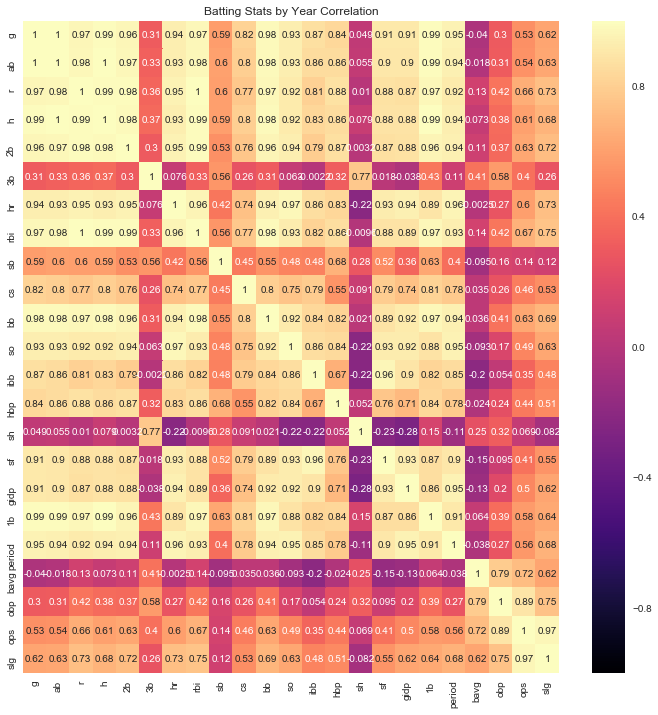

In [337]:
plt.figure(figsize=(12,12))
sns.heatmap(batting_year_ss.corr(),
           vmin=-1,
           vmax=1,
           cmap='magma',
           annot=True)
plt.title('Batting Stats by Year Correlation')

### PCA for batting stats

In [344]:
batting_year_pca = PCA(n_components=23)
batting_year_pca.fit(batting_year_ss.values)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Explained variance

In [345]:
for each in batting_year_pca.components_:
    for each in list(zip(batting_year_ss.columns, each)):
        print(each)
    print()

('g', 0.24749812763793266)
('ab', 0.24791299962391078)
('r', 0.2487221453682515)
('h', 0.24915156257232607)
('2b', 0.24645149599844032)
('3b', 0.07460226012703727)
('hr', 0.24181316864543684)
('rbi', 0.24959868248050085)
('sb', 0.1422505058939525)
('cs', 0.20463426056902595)
('bb', 0.24760177653480941)
('so', 0.23744177789891596)
('ibb', 0.21664155632867452)
('hbp', 0.21462932481992045)
('sh', -0.0032527387701026707)
('sf', 0.2302078425262292)
('gidp', 0.230137050332833)
('1b', 0.24526513487682358)
('period', 0.23957179246296845)
('bavg', 0.0209446718945661)
('obp', 0.09867030834249105)
('ops', 0.1619984004251485)
('slg', 0.18312787121214077)

('g', -0.04308020541273401)
('ab', -0.03030255549884743)
('r', 0.031023627419770595)
('h', 0.013997256088808075)
('2b', 0.010371870022973349)
('3b', 0.3856739045361716)
('hr', -0.08347366274828896)
('rbi', 0.027826928336816627)
('sb', 0.01796877704750198)
('cs', -0.020410936955139552)
('bb', -7.143723469123578e-05)
('so', -0.12990903199112855)
('

In [346]:
batting_year_pca.explained_variance_

array([1.59304863e+01, 3.37339059e+00, 2.02585497e+00, 6.20791582e-01,
       4.16138009e-01, 2.41418395e-01, 1.45161605e-01, 1.29445935e-01,
       9.72748085e-02, 5.79269659e-02, 3.98540722e-02, 2.74477547e-02,
       1.94684318e-02, 1.68563766e-02, 8.07880339e-03, 7.89558443e-03,
       2.78942587e-03, 1.98747573e-03, 4.95824913e-04, 1.83904253e-04,
       1.28971606e-04, 4.48170953e-05, 4.34920204e-33])

In [347]:
batting_year_pca.explained_variance_ratio_

array([6.87752163e-01, 1.45636275e-01, 8.74603645e-02, 2.68008613e-02,
       1.79655417e-02, 1.04225333e-02, 6.26692785e-03, 5.58844973e-03,
       4.19955542e-03, 2.50082737e-03, 1.72058303e-03, 1.18497655e-03,
       8.40492616e-04, 7.27724771e-04, 3.48778713e-04, 3.40868771e-04,
       1.20425306e-04, 8.58034533e-05, 2.14057908e-05, 7.93952837e-06,
       5.56797197e-06, 1.93484704e-06, 1.87764081e-34])

### Transform batters stats into PCA space

In [348]:
batting_year_pca_transformed = batting_year_pca.transform(batting_year_ss)

In [349]:
batting_year_pca_transformed = pd.DataFrame(batting_year_pca_transformed,
                                       columns=batting_year_ss.columns)

batting_year_pca_transformed

g        ab         r         h        2b        3b        hr  \
0   -7.135455 -3.289668 -1.692495 -0.154748  0.140384  1.402595 -0.292724   
1   -7.018914 -1.995082 -2.583224 -0.026068  0.505752  1.356538 -0.553509   
2   -7.315117 -3.210980 -1.976451 -0.139778  0.207454  1.205919 -0.388328   
3   -6.869623 -3.421696 -1.326092 -0.172548 -0.085479  1.181930  0.048133   
4   -6.958082 -3.816382 -1.070317 -0.223751 -0.217617  0.889230  0.165021   
5   -6.561888 -2.485790 -1.884814 -0.091990  0.112091  0.834368 -0.103621   
6   -6.675891 -3.232203 -1.286171 -0.159545 -0.158062  0.766730  0.207265   
7   -6.119673 -2.169433 -1.707677 -0.044251 -0.010461  0.833088  0.191497   
8   -6.183581 -3.041971 -1.233439 -0.135630 -0.265944  0.345139  0.352668   
9   -6.596995 -3.985220 -0.640138 -0.258240 -0.444283  0.289313  0.472836   
10  -5.856581 -2.848776 -0.445002  0.423115  0.418768 -0.073831  0.471670   
11  -4.645645 -0.230536 -0.774831  1.542250  1.444416 -0.134421  0.233214   
12  -5.818006 -3.824194  0.685522  1.042755  0.526867  0.010208  0.537757   
13  -4.861078 -1.128292 -0.980180  1.210289  0.994918 -0.512699  0.111375   
14  -4.897041 -1.197514 -0.470874  1.357106  0.988512 -0.631988  0.267006   
15  -5.041675 -1.810335 -0.173828  1.159268  0.696205 -0.609487  0.420302   
16  -3.717198 -1.640605  1.654114  1.748781  0.821380 -1.041492  1.170294   
17  -2.954830  1.740899 -0.536108  2.003069  1.447268 -0.625209  0.502562   
18  -1.796958  5.233545 -0.930000  1.920962  1.725424 -0.117274 -0.255730   
19  -2.676598  3.127682 -0.729697  1.751386  1.359508  0.129633 -0.380914   
20  -3.033203  2.274948  0.122429  1.582568  1.177059  0.009154 -0.278870   
21  -2.959661  2.285339 -0.074286  1.574301  0.952172  0.192624 -0.336401   
22  -3.574332  0.181759  0.958124  1.019454 -0.042508  0.185954 -0.207231   
23  -3.069039  1.511324  0.703032  1.425225  0.571561  0.215119 -0.282514   
24  -4.649804  0.386867 -0.937690  0.918926  0.651179  0.244307 -0.505784   
25  -2.697628  0.882913  2.186450  1.099898  0.002024  0.076949  0.104045   
26  -3.064010  0.505461  1.686662  0.784166 -0.068561  0.135909 -0.296536   
27  -3.167086  0.061361  2.627344  0.672311 -0.347763 -0.001256 -0.015219   
28  -3.398362 -1.104148  3.643583  0.435510 -0.801060 -0.032074  0.044090   
29  -3.210200 -0.584663  3.456163  0.521927 -0.728765 -0.098606 -0.191468   
..        ...       ...       ...       ...       ...       ...       ...   
112  3.659824 -1.487775  0.847803 -0.388060  0.772490 -0.056839 -0.121453   
113  3.687551 -1.402410  0.812966 -0.685999  0.809658 -0.133593 -0.135612   
114  4.008385 -0.989223  0.496381 -0.506090  0.986073 -0.097220 -0.044934   
115  4.032849 -1.193888  0.807452 -0.575499  0.657646 -0.087730  0.218565   
116  3.900993 -1.390849  0.903704 -0.539058  0.822012  0.003824 -0.006130   
117  5.501959 -0.259079  0.320426 -0.214099  0.877131  0.259318 -0.115571   
118  2.583629  0.374999 -1.805794  0.086562  0.564378  0.098592 -0.458561   
119  4.583167  0.169830 -0.787481  0.350947  0.394428  0.098005 -0.138877   
120  6.230317  0.022816 -0.520883  0.539900  0.330030  0.158758 -0.211681   
121  6.110033 -0.027078 -0.205894  0.366506  0.401159  0.400587  0.131904   
122  6.753397 -0.199006  0.019198  0.583509 -0.066934  0.458212  0.278007   
123  7.365674  0.574184 -0.446362  0.777754  0.244258  0.285119  0.254225   
124  7.331148  0.508980 -0.667688  0.691350 -0.187501  0.123656  0.046129   
125  6.906324 -0.265204 -0.107343  0.874941 -0.200179  0.678340 -0.097761   
126  6.626034 -0.556122 -0.117708  0.628933 -0.422716  0.389445 -0.188357   
127  6.656812 -0.358074 -0.176051  0.838060 -0.743283  0.478394 -0.180337   
128  6.845217  0.004623 -0.512541  0.903757 -0.712723  0.511916 -0.369740   
129  6.462868 -0.294046 -0.380790  0.907332 -0.768397  0.536785 -0.219924   
130  7.193089  0.200197 -0.649416  1.006763 -0.526564  0.502137 -0.313035   
131  6.974149 -0.085822 -0.399603  1.066269 -0.526333  0.320241 -0.268431   
132  6.6

### Visualize transformed PCA features
-There should be no correlation

In [350]:
# sns.pairplot(batting_year_pca_transformed)

## Now  KMeans Clustering

In [351]:
batting_year[batting_year.columns]

g      ab      r      h    2b    3b    hr      rbi      sb      cs  \
year                                                                           
1876   4450   19157   2959   5145   614   176    40   1916.0     0.0     0.0   
1877   2913   12346   1885   3417   402   192    23   1314.0     0.0     0.0   
1878   3144   12953   1829   3403   466   130    23   1283.0     0.0     0.0   
1879   5567   23259   3311   5997   938   314    58   2297.0     0.0     0.0   
1880   5764   22915   3089   5720   953   319    61   2145.0     0.0     0.0   
1881   5769   23204   3331   6114  1038   297    75   2400.0     0.0     0.0   
1882   5703   23276   3498   5956  1038   389   121   2568.0     0.0     0.0   
1883   6855   27926   4468   7413  1495   461   124   3105.0     0.0     0.0   
1884   7652   30520   4821   7734  1171   415   312   3401.0     0.0     0.0   
1885   7484   29116   4220   7194  1115   401   169   2978.0     0.0     0.0   
1886   8391   32138   5004   8165  1290   491   242   3727.0  1304.0     0.0   
1887   8681   33876   5955   9226  1402   699   372   4715.0  2571.0     0.0   
1888   9118   35081   4719   8509  1157   488   323   3602.0  2253.0     0.0   
1889   9203   35767   6018   9635  1468   455   363   4807.0  2038.0     0.0   
1890   9084   35262   5778   9137  1329   573   252   4441.0  2200.0     0.0   
1891   9576   36964   5892   9426  1343   585   285   4763.0  1952.0     0.0   
1892  15683   59649   8959  14875  1927   975   405   7044.0  3088.0     0.0   
1893  13334   52760   9721  14942  2066   996   444   8037.0  2667.0     0.0   
1894  13677   53493  11199  16800  2606  1241   609   9474.0  3049.0     0.0   
1895  13382   51663   9788  15594  2250   928   460   8160.0  2785.0     0.0   
1896  13533   51323   9005  15187  2046   961   388   7599.0  2959.0     0.0   
1897  14041   53030   9109  15727  2223   929   352   7645.0  2633.0     0.0   
1898  15695   57857   8576  15915  1965   839   292   7129.0  1985.0     0.0   
1899  15710   57796   9127  16653  2082   945   336   7560.0  2575.0     0.0   
1900   9807   36104   5574  10257  1359   586   242   4623.0  1633.0     0.0   
1901  18841   70942  10435  19720  2779  1181   428   8611.0  2759.0     0.0   
1902  18629   69349   9268  18984  2671   928   346   7743.0  2554.0     0.0   
1903  19008   69504   9297  18599  2883  1098   323   7668.0  2649.0     0.0   
1904  21310   76093   8763  19163  2705  1095   310   7182.0  2690.0     0.0   
1905  20867   74226   9014  18954  2720  1054   326   7451.0  2812.0     0.0   
...     ...     ...    ...    ...   ...   ...   ...      ...     ...     ...   
1988  39962  129760  16296  33872  6003   803  3058  15277.0  3155.0  1326.0   
1989  40788  130712  16321  34035  5901   827  2960  15292.0  2978.0  1366.0   
1990  41038  130451  16732  34470  6119   814  3179  15826.0  3132.0  1434.0   
1991  41761  131624  17173  34473  6162   853  3287  16202.0  2985.0  1494.0   
1992  40910  131159  16303  34322  6212   802  2919  15438.0  3131.0  1502.0   
1993  43085  141023  19542  38324  6985   891  3826  18398.0  3138.0  1571.0   
1994  29790   99765  14689  27539  5315   646  3138  13899.0  2171.0   971.0   
1995  38154  124776  18172  34229  6468   766  3882  17189.0  2802.0  1181.0   
1996  43332  142469  21347  39434  7456   808  4744  20225.0  3073.0  1243.0   
1997  43899  142585  20340  38930  7572   826  4452  19310.0  3169.0  1499.0   
1998  46986  153208  21880  41785  8215   847  4874  20897.0  3131.0  1424.0   
1999  46932  153319  23329  42626  8298   885  5311  22156.0  3292.0  1441.0   
2000  46606  152696  23433  42326  8399   908  5472  22465.0  2784.0  1241.0   
2001  45893  151410  21784  41055  8299   874  5215  20838.0  2963.0  1325.0   
2002  46199  151964  21141  40629  8201   874  4888  20224.0  2615.0  1201.0   
2003  46357  153106  21674  41464  8354   883  4993  20760.0  2464.0  1079.0   
2004  45459  152432  21952  41704  8385   860  5236  21026.0  2452.0  1030.0   
2005  4597

In [604]:
# Fitting pitching data on KMeans
batting_year_cluster = batting_year[batting_year.columns]
km = KMeans(n_clusters=8,
           random_state=42)
km.fit(batting_year_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [605]:
#looking at labels
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0,
       0, 0, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [606]:
#Saving labels to a pandas seriers
pd.Series(km.labels_).value_counts()

4    60
7    22
1    17
6    10
0    10
5     8
3     8
2     7
dtype: int64

In [607]:
#saving labels to clustering data frame
batting_year['kmeans_clusters'] = km.labels_

In [608]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batting_year,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [609]:
show_cluster_results(6, 'kmeans_clusters')[batting_year.columns]

g     ab     r      h    2b   3b   hr     rbi      sb   cs  \
year                                                                  
1900  9807  36104  5574  10257  1359  586  242  4623.0  1633.0  0.0   
1887  8681  33876  5955   9226  1402  699  372  4715.0  2571.0  0.0   
1883  6855  27926  4468   7413  1495  461  124  3105.0     0.0  0.0   
1889  9203  35767  6018   9635  1468  455  363  4807.0  2038.0  0.0   
1890  9084  35262  5778   9137  1329  573  252  4441.0  2200.0  0.0   
1891  9576  36964  5892   9426  1343  585  285  4763.0  1952.0  0.0   
1884  7652  30520  4821   7734  1171  415  312  3401.0     0.0  0.0   
1886  8391  32138  5004   8165  1290  491  242  3727.0  1304.0  0.0   
1885  7484  29116  4220   7194  1115  401  169  2978.0     0.0  0.0   
1888  9118  35081  4719   8509  1157  488  323  3602.0  2253.0  0.0   

          ...        sf  gidp    1b  period   bavg    obp    ops    slg  \
year      ...                                                             
1900      ...       0.0   0.0  8070       0  0.271  0.328  0.684  0.356   
1887      ...       0.0   0.0  6753       0  0.262  0.316  0.684  0.368   
1883      ...       0.0   0.0  5333       0  0.256  0.283  0.632  0.349   
1889      ...       0.0   0.0  7349       0  0.254  0.323  0.664  0.341   
1890      ...       0.0   0.0  6983       0  0.250  0.321  0.657  0.336   
1891      ...       0.0   0.0  7213       0  0.244  0.312  0.638  0.326   
1884      ...       0.0   0.0  5836       0  0.243  0.282  0.611  0.330   
1886      ...       0.0   0.0  6142       0  0.241  0.287  0.613  0.326   
1885      ...       0.0   0.0  5509       0  0.234  0.271  0.581  0.310   
1888      ...       0.0   0.0  6541       0  0.231  0.274  0.585  0.311   

      kmeans_clusters  hdb_clusters  
year                                 
1900                6             0  
1887                6             0  
1883                6             0  
1889                6             0  
1890                6             0  
1891                6             0  
1884                6             0  
1886                6             0  
1885                6             0  
1888                6             0  

[10 rows x 25 columns]

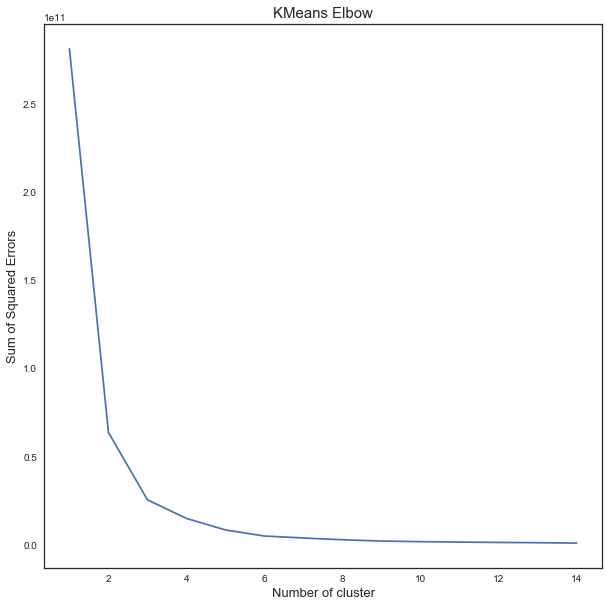

In [613]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(batting_year)
    batting_year['kmean_clusters'] = kmeans.labels_
    #print(batters["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(10,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('KMeans Elbow', fontsize=15)
plt.xlabel("Number of cluster", fontsize=13)
plt.ylabel("Sum of Squared Errors", fontsize=13)
plt.show()

In [614]:
ks = range(2,16)
sil = []

for n_cluster in range(2, 16):
    kmeans = KMeans(n_clusters=n_cluster).fit(batting_year)
    label = kmeans.labels_
    sil_coeff = silhouette_score(batting_year, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    sil.append(sil_coeff)

For n_clusters=2, The Silhouette Coefficient is 0.7099309358745409
For n_clusters=3, The Silhouette Coefficient is 0.7147295196168341
For n_clusters=4, The Silhouette Coefficient is 0.6965000629956613
For n_clusters=5, The Silhouette Coefficient is 0.6826849750379652
For n_clusters=6, The Silhouette Coefficient is 0.6792258817393139
For n_clusters=7, The Silhouette Coefficient is 0.6841816500367037
For n_clusters=8, The Silhouette Coefficient is 0.6795501717040755
For n_clusters=9, The Silhouette Coefficient is 0.5872319118932652
For n_clusters=10, The Silhouette Coefficient is 0.5712271426307938
For n_clusters=11, The Silhouette Coefficient is 0.538011660402377
For n_clusters=12, The Silhouette Coefficient is 0.5299225460283788
For n_clusters=13, The Silhouette Coefficient is 0.5387147690571084
For n_clusters=14, The Silhouette Coefficient is 0.5240817556990782
For n_clusters=15, The Silhouette Coefficient is 0.5244164122196927


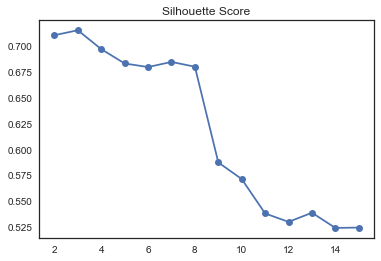

In [615]:
plt.plot(ks, sil, '-o')
plt.title('Silhouette Score');

In [ ]:
batting_year['year'] = batting_year.index

In [622]:
# Call k-means to cluster the stats
kmeans = KMeans(n_clusters=8, random_state=42)
model = kmeans.fit(batting_year)
centroids = pd.DataFrame(model.cluster_centers_, columns = batting_year.columns)

In [623]:
batting_year.columns

Index(['g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
       'ibb', 'hbp', 'sh', 'sf', 'gidp', '1b', 'period', 'bavg', 'obp', 'ops',
       'slg', 'kmeans_clusters', 'hdb_clusters', 'kmean_clusters', 'year'],
      dtype='object')

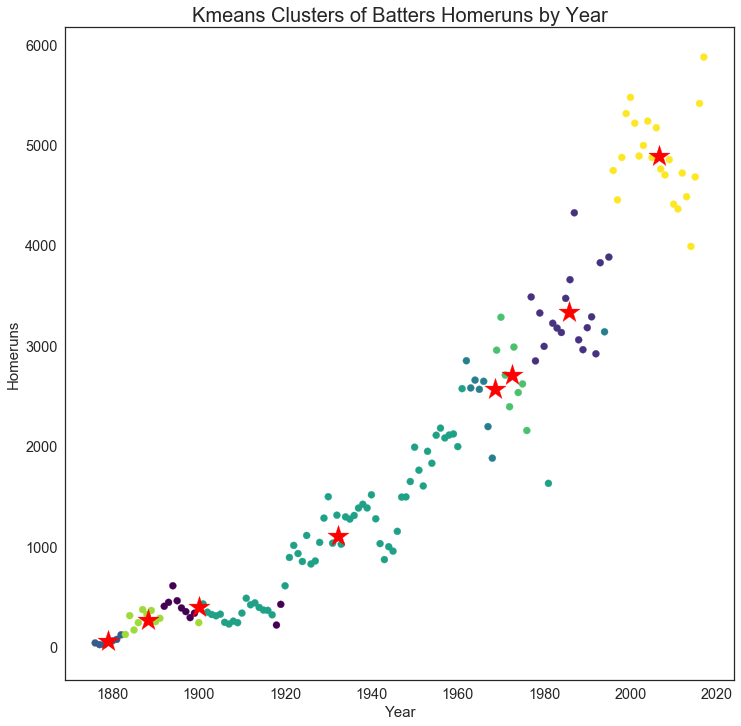

In [624]:
plt.figure(figsize=(12,12))
plt.tick_params(axis='both', which='both', direction='in', labelsize='x-large')
plt.scatter(batting_year['year'], batting_year['hr'],
                c=batting_year['kmeans_clusters'], marker=None, vmin=None, vmax=None,
                alpha=None, cmap='viridis')
plt.scatter(centroids['year'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Batters Homeruns by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Homeruns', fontsize=15);

## HDBSCAN

In [661]:
hdb = HDBSCAN(min_cluster_size=4)
hdb.fit(batting_year)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=4, min_samples=None, p=None,
    prediction_data=False)

In [662]:
# investigate clusters to see how they are made up
pd.Series(hdb.labels_).value_counts().sort_index()

-1     6
 0    17
 1    23
 2     9
 3    10
 4     7
 5    16
 6    13
 7    41
dtype: int64

In [663]:
batting_year['hdb_clusters'] = hdb.labels_

In [664]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batting_year,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [665]:
show_cluster_results(2, 'hdb_clusters')

g      ab      r      h    2b   3b    hr      rbi      sb      cs  \
year                                                                          
1994  29790   99765  14689  27539  5315  646  3138  13899.0  2171.0   971.0   
1962  29984   97016  13265  26096  4005  809  2850  12505.0  1293.0   670.0   
1964  30483   98104  12182  25686  4013  720  2657  11481.0  1131.0   680.0   
1965  30194   96237  11965  24775  3916  743  2565  11081.0  1377.0   740.0   
1966  30290   96775  11895  25056  3818  758  2645  11191.0  1387.0   883.0   
1963  29635   96673  11746  24829  3818  731  2579  11058.0  1191.0   718.0   
1967  29777   95053  11186  24144  3736  735  2194  10312.0  1294.0   883.0   
1972  33791  108583  12476  27537  4249  686  2392  11643.0  1745.0  1035.0   
1968  29960   95461  10224  23612  3583  651  1880   9477.0  1476.0   901.0   

      ...      1b  period   bavg    obp    ops    slg  kmeans_clusters  \
year  ...                                                                
1994  ...   18440       6  0.271  0.339  0.763  0.424                3   
1962  ...   18432       4  0.261  0.331  0.731  0.399                3   
1964  ...   18296       4  0.253  0.315  0.694  0.379                3   
1965  ...   17551       4  0.250  0.316  0.694  0.378                3   
1966  ...   17835       4  0.250  0.311  0.688  0.377                3   
1963  ...   17701       4  0.249  0.313  0.689  0.376                3   
1967  ...   17479       4  0.245  0.310  0.669  0.359                3   
1972  ...   20210       4  0.244  0.311  0.665  0.354                5   
1968  ...   17498       4  0.238  0.301  0.641  0.340                3   

      hdb_clusters  kmean_clusters  year  
year                                      
1994             2               3  1994  
1962             2               3  1962  
1964             2               3  1964  
1965             2               3  1965  
1966             2               3  1966  
1963             2               3  1963  
1967             2               3  1967  
1972             2               6  1972  
1968             2               3  1968  

[9 rows x 27 columns]

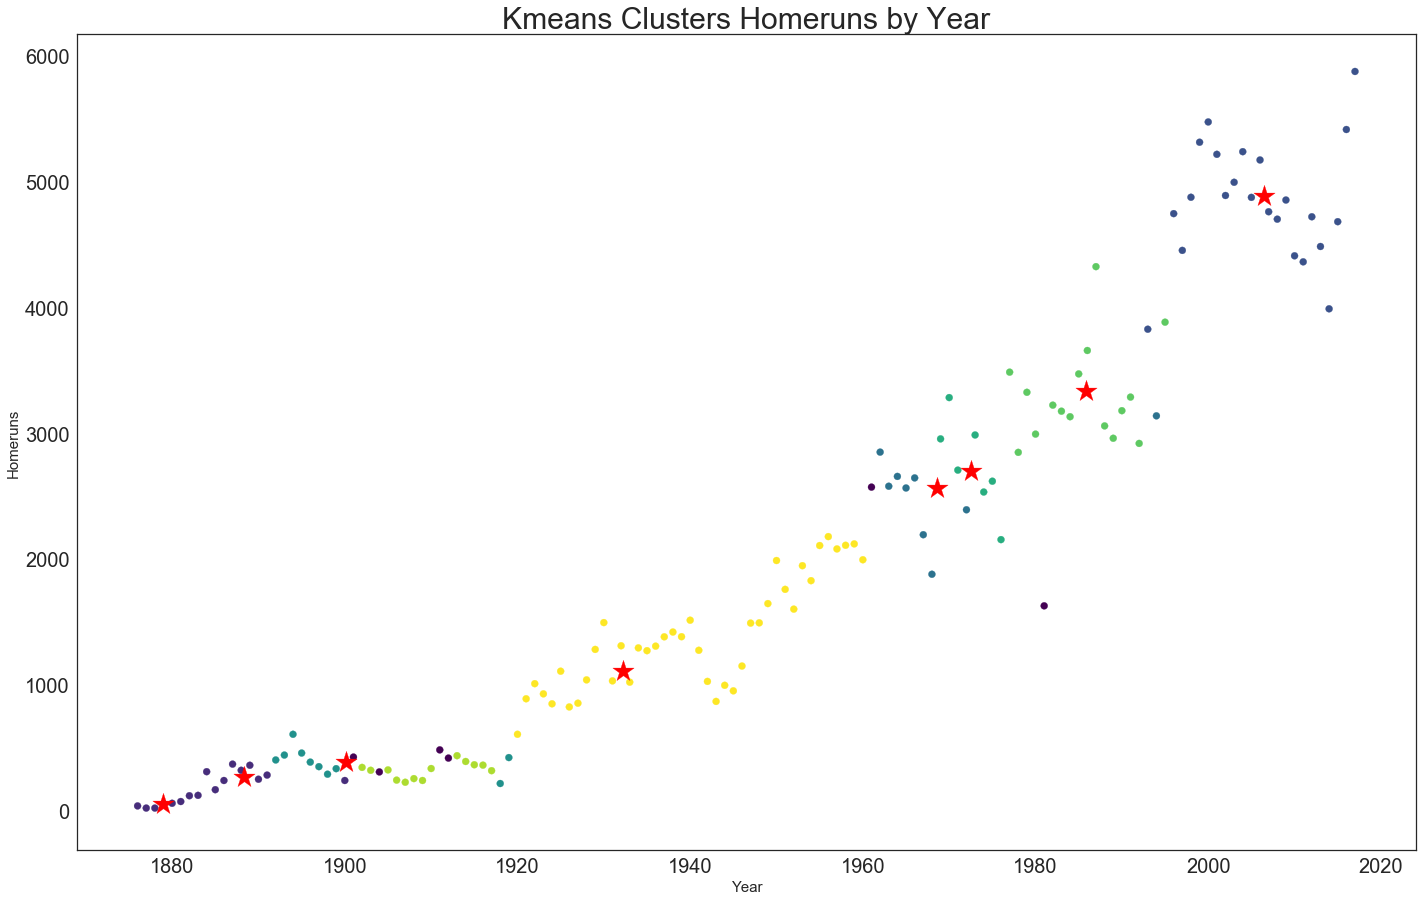

In [666]:

plt.figure(figsize=(24,15))
plt.scatter(batting_year['year'], batting_year['hr'],
           c=batting_year['hdb_clusters'], cmap='viridis')

plt.scatter(centroids['year'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters Homeruns by Year', fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Homeruns', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# Model the Data

In [695]:
# Define my x and y
# we will test one cluster at a time
features = [each for each in batting_year.columns if each not in ['year', 'period']]
X = batting_year[features]
y = batting_year['period']

In [696]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [697]:
X_train.head()

g      ab      r      h    2b   3b    hr      rbi      sb      cs  \
year                                                                          
1986  41526  131982  17496  34760  6152  821  3657  16456.0  3152.0  1530.0   
1918  16839   58245   6663  15308  2093  801   218   5569.0  1868.0     0.0   
1993  43085  141023  19542  38324  6985  891  3826  18398.0  3138.0  1571.0   
1962  29984   97016  13265  26096  4005  809  2850  12505.0  1293.0   670.0   
1971  35340  114355  13804  29737  4535  766  2707  12935.0  1703.0   988.0   

           ...            sf    gidp     1b   bavg    obp    ops    slg  \
year       ...                                                            
1986       ...        1114.0  2903.0  24130  0.256  0.324  0.714  0.390   
1918       ...           0.0     0.0  12196  0.256  0.320  0.648  0.328   
1993       ...        1338.0  3171.0  26622  0.265  0.331  0.733  0.402   
1962       ...         776.0  2212.0  18432  0.261  0.331  0.731  0.399   
1971       ...         921.0  2767.0  21729  0.251  0.318  0.686  0.368   

      kmeans_clusters  hdb_clusters  kmean_clusters  
year                                                 
1986                1             5               4  
1918                0             3               5  
1993                1             1               1  
1962                3             2               3  
1971                5             4               6  

[5 rows x 25 columns]

In [698]:
y_train.head()

year
1986    5
1918    1
1993    5
1962    4
1971    4
Name: period, dtype: int64

In [699]:
pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

params = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__criterion': ['gini', 'entropy'],
    'rf__verbose': [2],
    'rf__n_jobs': [-1],
    'rf__random_state': [42]
}
gs_rf = GridSearchCV(pipe_rf, params, n_jobs=-1, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)
gs_rf.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.5s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10building tree 4 of 10

building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9433962264150944

In [700]:
gs_rf.best_params_

{'rf__criterion': 'gini',
 'rf__n_estimators': 10,
 'rf__n_jobs': -1,
 'rf__random_state': 42,
 'rf__verbose': 2}

In [701]:
gs_rf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.8888888888888888

In [702]:
y_preds_gs_rf = gs_rf.predict(X_test)

confusion_matrix(y_test, y_preds_gs_rf)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[8, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 1, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2, 1]], dtype=int64)

In [703]:
gs_rf.predict_proba(X_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.3],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.9, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.9, 0. , 0. , 0. , 0. ],
       [0.9, 0. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0.

In [704]:
X_test

g      ab      r      h    2b    3b    hr      rbi      sb      cs  \
year                                                                           
2007  46276  153885  21888  42223  8684   885  4759  21046.0  2800.0   943.0   
1895  13382   51663   9788  15594  2250   928   460   8160.0  2785.0     0.0   
1957  22913   74241   9695  19921  3146   622  2081   9214.0   734.0   523.0   
1972  33791  108583  12476  27537  4249   686  2392  11643.0  1745.0  1035.0   
1932  21418   76670  11127  21988  4231  1003  1312  10411.0   954.0   400.0   
1888   9118   35081   4719   8509  1157   488   323   3602.0  2253.0     0.0   
1974  37057  119656  14893  31470  4884   802  2533  13905.0  2369.0  1298.0   
1941  21615   74686  10195  20380  3641   818  1276   9423.0   840.0   309.0   
1942  21442   73458   9162  19305  3220   676  1029   8415.0   916.0   370.0   
1894  13677   53493  11199  16800  2606  1241   609   9474.0  3049.0     0.0   
1927  21617   73588  10685  21627  3777  1063   856   9718.0  1385.0   476.0   
1953  21972   73834  10301  20281  3299   695  1948   9771.0   638.0   490.0   
1969  36163  115347  14529  29811  4467   787  2955  13541.0  1778.0  1045.0   
1991  41761  131624  17173  34473  6162   853  3287  16202.0  2985.0  1494.0   
2006  45782  153281  22252  42374  8616   906  5170  21283.0  2645.0  1042.0   
1940  21442   75224  10587  20876  3791   868  1515   9814.0   908.0   324.0   
1903  19008   69504   9297  18599  2883  1098   323   7668.0  2649.0     0.0   
1945  21462   73382   9357  19807  3188   693   954   8630.0   937.0   354.0   
2000  46606  152696  23433  42326  8399   908  5472  22465.0  2784.0  1241.0   
1949  22290   74303  10494  20246  3334   713  1647   9837.0   709.0   283.0   
1887   8681   33876   5955   9226  1402   699   372   4715.0  2571.0     0.0   
1994  29790   99765  14689  27539  5315   646  3138  13899.0  2171.0   971.0   
1985  41020  131206  17149  34549  6064   912  3471  16165.0  2975.0  1338.0   
1988  39962  129760  16296  33872  6003   803  3058  15277.0  3155.0  1326.0   
1931  21787   76349  10953  22013  4195  1028  1033  10253.0  1047.0   435.0   
1921  21428   75616  10999  22691  3697  1275   891   9872.0  1435.0  1252.0   
1885   7484   29116   4220   7194  1115   401   169   2978.0     0.0     0.0   
1880   5764   22915   3089   5720   953   319    61   2145.0     0.0     0.0   
1902  18629   69349   9268  18984  2671   928   346   7743.0  2554.0     0.0   
1999  46932  153319  23329  42626  8298   885  5311  22156.0  3292.0  1441.0   
1907  20722   71873   8048  18211  2312   902   228   6560.0  2660.0     0.0   
1973  36922  120847  15309  31849  4909   739  2986  14371.0  1970.0  1153.0   
1912  20672   71052  10065  19796  3042  1240   420   8406.0  3171.0     0.0   
1892  15683   59649   8959  14875  1927   975   405   7044.0  3088.0     0.0   
1886   8391   32138   5004   8165  1290   491   242   3727.0  1304.0     0.0   
2016  45838  151836  20476  39696  7788   821  5412  19613.0  2421.0   937.0   

           ...            sf    gidp     1b   bavg    obp    ops    slg  \
year       ...                                                            
2007       ...        1358.0  3712.0  27895  0.268  0.335  0.755  0.420   
1895       ...           0.0     0.0  11956  0.292  0.354  0.745  0.391   
1957       ...         628.0  1739.0  14072  0.261  0.327  0.724  0.397   
1972       ...         803.0  2472.0  20210  0.244  0.311  0.665  0.354   
1932       ...           0.0     0.0  15442  0.277  0.337  0.737  0.400   
1888       ...           0.0     0.0   6541  0.231  0.274  0.585  0.311   
1974       ...        1018.0  2808.0  23251  0.255  0.322  0.688  0.366   
1941       ...           0.0  1610.0  14645  0.265  0.335  0.712  0.377   
1942       ...           0.0  1521.0  14380  0.254  0.325  0.675  0.350   
1894       ...           0.0     0.0  12344  0.304  0.372  0.798  0.426   
1927       ...           0.0     0.0  15931  0.285  0.348  0.739  0.3

## Batting Team

## PCA first

In [709]:
batting_team.columns

Index(['g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
       'ibb', 'hbp', 'sh', 'sf', 'gidp', '1b', 'period', 'bavg', 'obp', 'ops',
       'slg', 'kmeans_clusters', 'hdb_clusters'],
      dtype='object')

### Scale data for use with PCA

We already did this above

### Find Z scores

In [385]:
batting_team_ss

g        ab         r         h        2b        3b        hr  \
0  -0.726901 -0.721588 -0.704883 -0.710779 -0.693243 -0.718435 -0.644804   
1  -0.425449 -0.437371 -0.422815 -0.436567 -0.345289 -0.451778 -0.195594   
2   0.403503  0.339047  0.312334  0.320670  0.351924 -0.172955  0.809054   
3   0.721052  0.680687  0.625546  0.630280  0.681291 -0.078068  1.301310   
4  -0.842880 -0.821084 -0.802563 -0.814701 -0.825533 -0.651771 -0.915348   
5  -0.898851 -0.892662 -0.876821 -0.880548 -0.894559 -0.727194 -0.926457   
6  -0.777507 -0.752759 -0.667163 -0.717364 -0.765638 -0.487300 -0.896602   
7   1.875950  1.928273  1.995061  1.959434  2.213985  1.662506  2.013196   
8   0.585434  0.642171  0.683474  0.672131  0.525086  1.248894  0.021027   
9   0.689455  0.778881  0.757288  0.762401  0.565523  1.116052 -0.178468   
10 -0.115565 -0.143519 -0.210166 -0.175840 -0.238761 -0.387060 -0.075018   
11  1.905400  1.897675  1.802841  1.852851  1.760808  1.660559  1.530891   
12  2.302971  2.330341  2.414930  2.333197  2.283663  2.445448  2.131226   
13  2.119864  2.096854  2.051216  2.092001  2.052998  2.245454  1.873411   
14 -0.857426 -0.841379 -0.839692 -0.841989 -0.844556 -0.714056 -0.924837   
15 -0.713871 -0.678720 -0.619912 -0.664463 -0.724658 -0.442046 -0.878319   
16  1.891143  1.912001  1.914006  1.925413  2.045824  1.599248  1.874799   
17 -0.888290 -0.875782 -0.870208 -0.870690 -0.890972 -0.755417 -0.932011   
18 -0.300051 -0.319501 -0.236839 -0.280265 -0.187345 -0.329154  0.052964   
19  1.941715  1.951329  2.006070  1.959285  1.931687  1.938409  2.085171   
20 -0.814094 -0.788348 -0.758895 -0.784401 -0.804771 -0.579267 -0.879708   
21 -0.463739 -0.475138 -0.470732 -0.468039 -0.405183 -0.551044 -0.318947   
22 -0.917434 -0.909866 -0.898470 -0.901195 -0.915756 -0.801644 -0.937334   
23  0.474991  0.425134  0.353859  0.396040  0.479105  0.114626  0.603310   
24 -0.928199 -0.924294 -0.916535 -0.916392 -0.925104 -0.820135 -0.938028   
25 -0.878905 -0.868533 -0.853952 -0.862970 -0.872275 -0.763203 -0.909562   
26 -0.613205 -0.628714 -0.654750 -0.635539 -0.658132 -0.559317 -0.616800   
27  0.336188  0.333976  0.272730  0.323962  0.426494  0.124845  0.387847   
28 -0.918780 -0.914152 -0.908814 -0.908338 -0.914342 -0.804077 -0.934326   
29 -0.495881 -0.494941 -0.497295 -0.495736 -0.466817 -0.613329 -0.355976   
..       ...       ...       ...       ...       ...       ...       ...   
39 -0.918320 -0.914116 -0.905711 -0.905176 -0.914125 -0.798238 -0.933631   
40 -0.038473 -0.088492 -0.137940 -0.103148 -0.012118 -0.250325  0.021953   
41  0.710168  0.792453  0.934878  0.849861  0.589981  1.321398  0.326286   
42 -0.928676 -0.924345 -0.917237 -0.916913 -0.928582 -0.821595 -0.938260   
43  1.839499  1.873388  2.073678  1.896712  1.806136  1.626984  2.551044   
44  0.516620  0.417970  0.317432  0.368939  0.420732 -0.070769  0.667649   
45  0.368142  0.339838  0.321016  0.279469  0.337250 -0.234267  0.804425   
46  0.261770  0.302643  0.314994  0.329636  0.314640  0.679084 -0.157870   
47  2.249895  2.255171  2.211405  2.237589  2.268119  2.182683  1.902108   
48 -0.929051 -0.924390 -0.914356 -0.914941 -0.924995 -0.810890 -0.937103   
49  2.154595  2.178229  2.149265  2.216440  2.098870  2.973897  1.540380   
50 -0.830889 -0.806591 -0.782355 -0.804062 -0.817815 -0.662963 -0.916042   
51  0.318235  0.240235  0.133857  0.199002  0.225395 -0.093152  0.373730   
52 -0.911438 -0.911837 -0.906080 -0.905176 -0.915321 -0.817215 -0.913034   
53  0.127583  0.126853  0.089377  0.099730  0.180610 -0.297525  0.488289   
54  0.604273  0.521661  0.495539  0.500781  0.536609  0.181291  0.962725   
55 -0.918320 -0.911776 -0.902090 -0.904394 -0.919451 -0.796778 -0.938028   
56 -0.903041 -0.896963 -0.893372 -0.893383 -0.901298 -0.795318 -0.929928   
57  0.227942  0.261609  0.202315  0.262729  0.232135  0.560353 -0.274281   
58  2.062957  2.046503  2.046856  2.108426  2.086913  2.315525  1.616752   
59 -0.927075 -0.922886 -0.917237 -0.915759 -0.926843 -0.819

### Visualize correlation

In [386]:
# g = sns.PairGrid(batting_year_ss)
# g = g.map_lower(sns.regplot)
# g = g.map_upper(sns.kdeplot, cmap='Reds', shade=True, shade_lowest=False)
# g = g.map_diag(plt.hist)

# plt.show()

### Visualize using heatmap

Text(0.5,1,'Batting Stats by Team Correlation')

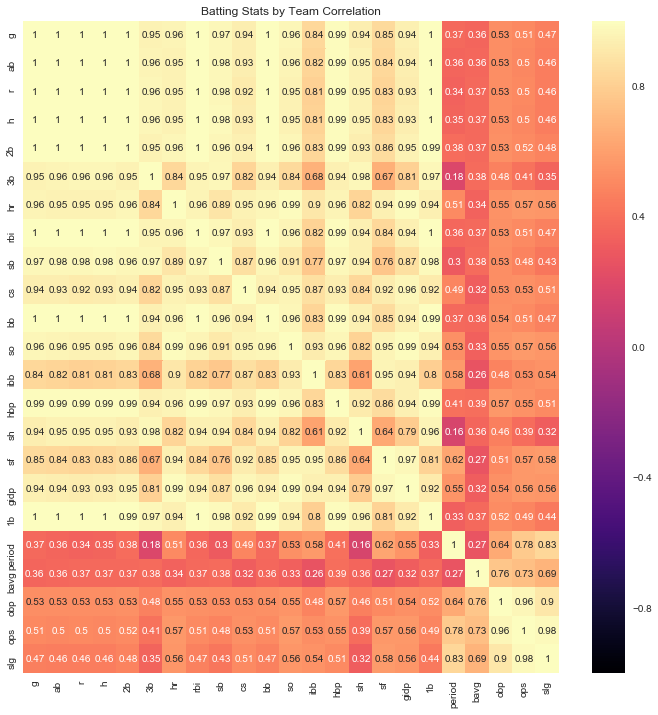

In [387]:
plt.figure(figsize=(12,12))
sns.heatmap(batting_team_ss.corr(),
           vmin=-1,
           vmax=1,
           cmap='magma',
           annot=True)
plt.title('Batting Stats by Team Correlation')

### PCA for batting stats

In [394]:
batting_team_pca = PCA(n_components=23)
batting_team_pca.fit(batting_year_ss.values)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Explained variance

In [395]:
for each in batting_team_pca.components_:
    for each in list(zip(batting_team_ss.columns, each)):
        print(each)
    print()

('g', 0.24749812763793266)
('ab', 0.24791299962391078)
('r', 0.2487221453682515)
('h', 0.24915156257232607)
('2b', 0.24645149599844032)
('3b', 0.07460226012703727)
('hr', 0.24181316864543684)
('rbi', 0.24959868248050085)
('sb', 0.1422505058939525)
('cs', 0.20463426056902595)
('bb', 0.24760177653480941)
('so', 0.23744177789891596)
('ibb', 0.21664155632867452)
('hbp', 0.21462932481992045)
('sh', -0.0032527387701026707)
('sf', 0.2302078425262292)
('gidp', 0.230137050332833)
('1b', 0.24526513487682358)
('period', 0.23957179246296845)
('bavg', 0.0209446718945661)
('obp', 0.09867030834249105)
('ops', 0.1619984004251485)
('slg', 0.18312787121214077)

('g', -0.04308020541273401)
('ab', -0.03030255549884743)
('r', 0.031023627419770595)
('h', 0.013997256088808075)
('2b', 0.010371870022973349)
('3b', 0.3856739045361716)
('hr', -0.08347366274828896)
('rbi', 0.027826928336816627)
('sb', 0.01796877704750198)
('cs', -0.020410936955139552)
('bb', -7.143723469123578e-05)
('so', -0.12990903199112855)
('

In [396]:
batting_team_pca.explained_variance_

array([1.59304863e+01, 3.37339059e+00, 2.02585497e+00, 6.20791582e-01,
       4.16138009e-01, 2.41418395e-01, 1.45161605e-01, 1.29445935e-01,
       9.72748085e-02, 5.79269659e-02, 3.98540722e-02, 2.74477547e-02,
       1.94684318e-02, 1.68563766e-02, 8.07880339e-03, 7.89558443e-03,
       2.78942587e-03, 1.98747573e-03, 4.95824913e-04, 1.83904253e-04,
       1.28971606e-04, 4.48170953e-05, 4.34920204e-33])

In [397]:
batting_team_pca.explained_variance_ratio_

array([6.87752163e-01, 1.45636275e-01, 8.74603645e-02, 2.68008613e-02,
       1.79655417e-02, 1.04225333e-02, 6.26692785e-03, 5.58844973e-03,
       4.19955542e-03, 2.50082737e-03, 1.72058303e-03, 1.18497655e-03,
       8.40492616e-04, 7.27724771e-04, 3.48778713e-04, 3.40868771e-04,
       1.20425306e-04, 8.58034533e-05, 2.14057908e-05, 7.93952837e-06,
       5.56797197e-06, 1.93484704e-06, 1.87764081e-34])

### Transform batters stats into PCA space

In [398]:
batting_team_pca_transformed = batting_team_pca.transform(batting_team_ss)

In [399]:
batting_team_pca_transformed = pd.DataFrame(batting_team_pca_transformed,
                                       columns=batting_team_ss.columns)

batting_team_pca_transformed

g        ab         r         h        2b        3b        hr  \
0  -1.840706  1.110745 -2.114224  0.075154 -0.028413 -0.265819 -0.195749   
1  -0.427536  0.876683 -2.006374  0.098143 -0.061311 -0.380114 -0.251133   
2   2.531722 -0.186546 -0.913830 -0.416645  0.524719 -0.140788 -0.657452   
3   3.656741 -0.446270 -0.589499 -0.273584  0.103054 -0.103851 -0.661531   
4  -3.891870 -0.686977 -0.513966  0.177765 -0.050401  0.334353  0.292625   
5  -3.095017  2.419738 -2.409503  0.464707  0.704266  0.230947 -0.392717   
6  -2.613168  3.108826 -2.053637  0.972083  0.983894  0.336213 -0.478657   
7   7.560305  1.138961  1.735626 -0.600681 -0.376717  0.572364 -0.331081   
8   1.173242  2.044853  1.628149  0.661365 -0.581596 -0.073666  0.261679   
9   0.886322  1.327853  2.207481  0.665250 -0.949128 -0.028864  0.475699   
10 -0.026035 -0.277593 -0.595958 -0.451850  0.121743 -0.311508 -0.196916   
11  7.113485  0.799321  3.061967 -0.788542  0.132026  0.758165  0.058755   
12  8.226162  1.164231  3.269820  0.175488 -0.109995  0.462436 -0.227618   
13  7.783799  1.070514  3.120646  0.094534  0.384332  0.449568 -0.444037   
14 -4.329959 -2.208845  0.413532  0.016833 -0.436851  0.017633  0.587243   
15 -3.047700  0.967847 -0.787697  0.590531  0.357328 -0.260213  0.086374   
16  7.324069  1.132193  2.255408 -0.746762 -0.118530  0.844940 -0.002005   
17 -4.308913 -1.542691  0.026961  0.084049 -0.174831  0.361630  0.372539   
18  0.446242  2.018797 -2.540299  0.152569  0.338675  0.125967 -0.473342   
19  7.466783  1.264943  2.304577 -0.713627 -0.187566  0.585036  0.125549   
20 -3.722288 -0.714695 -0.379465  0.255434 -0.084953 -0.104327  0.392289   
21 -0.614245  1.063607 -1.942102  0.118945  0.094445 -0.300262 -0.283181   
22 -4.330626 -1.165679 -0.215836  0.126567 -0.005706  0.670421  0.225253   
23  2.861721 -0.345488 -0.238914 -0.339336  0.825151  0.009364 -0.554634   
24 -4.576533 -2.202775  0.425449  0.013272 -0.312719  0.191426  0.475614   
25 -3.992913 -1.145164 -0.136324  0.243320 -0.111451 -0.419906  0.403084   
26 -2.155250  0.118205 -1.205587 -0.026146 -0.143816 -0.597867  0.027429   
27  2.255207 -0.021919 -0.364745 -0.206984  0.584437  0.156012 -0.228579   
28 -4.440047 -2.386047  0.468868 -0.005739 -0.488148 -0.511701  0.628517   
29 -1.038922  0.300588 -1.558866 -0.022731 -0.168006 -0.383055 -0.124970   
..       ...       ...       ...       ...       ...       ...       ...   
39 -3.719152  0.357815 -1.153533  0.225453  0.198908 -0.066884  0.011721   
40  0.659555  0.088724 -0.806060 -0.307009  0.639385 -0.215897 -0.427163   
41  1.798027  2.292989  1.641603  1.194886 -0.377612  0.121485  0.373650   
42 -4.962525 -3.522348  1.278328 -0.118352 -0.618322  0.218544  0.715839   
43  7.691923  1.185880  1.606705 -0.187932  0.020433  0.526978 -0.101593   
44  2.662999 -0.596577 -0.430041 -0.406219  0.564537 -0.208342 -0.639855   
45  2.381550 -0.479572 -0.482915 -0.155821  0.187070 -0.275360 -0.202479   
46  0.248583  1.941377  0.829365 -0.151253 -0.514456  0.123798  0.472158   
47  8.005782  0.845200  3.065130  0.350080 -0.112609  0.452696 -0.489854   
48 -3.954562  0.351727 -1.246879  0.289487  0.404547  1.106345 -0.123458   
49  7.894766  1.459375  3.423075  0.211323  0.188647  0.507160 -0.446302   
50 -3.918934 -0.834738 -0.370837  0.156368 -0.095909  0.156666  0.340261   
51  1.865830 -0.497544 -0.419385 -0.405040  0.513317 -0.304010 -0.393044   
52 -3.198823 -0.050630 -1.299451  0.011877 -0.297054 -1.055921  0.206543   
53  1.451825 -0.328016 -0.770473 -0.148969  0.037480 -0.182198 -0.232474   
54  3.392712 -0.211437 -0.557021 -0.526244  0.791385 -0.078188 -0.982750   
55 -4.462021 -1.850885  0.215767  0.048884 -0.230527  0.244555  0.414376   
56 -4.695991 -3.424262  1.184580 -0.107790 -0.750373 -0.700074  0.856376   
57 -0.028730  1.511587  0.958905 -0.378550 -0.415025  0.030760  0.680587   
58  7.736206  1.392089  2.730228  0.001964  0.513947  0.533231 -0.479034   
59 -4.950008 -3.678384  1.320812 -0.132656 -0.693229  0.126

### Visualize transformed PCA features
-There should be no correlation

In [400]:
# sns.pairplot(batting_team_pca_transformed)

## Now  KMeans Clustering

## Break Here

In [401]:
batting_team[batting_team.columns]

g      ab      r       h     2b    3b     hr      rbi       sb  \
teamid                                                                        
ANA      12336   42116   6003   11566   2204   224   1270   5713.0    847.0   
ARI      30034   98219  13638   26308   5405   772   3211  12935.0   1763.0   
ATL      78701  251480  33537   67018  11819  1345   7552  31741.0   4341.0   
BAL      97344  318918  42015   83663  14849  1540   9679  39981.0   4648.0   
BFN       5527   22476   3359    5979    987   361    101   2497.0      0.0   
BLA       2241    8347   1349    2439    352   206     53   1155.0    376.0   
BLN       9365   35963   7024   11212   1538   699    182   5802.0   2463.0   
BOS     165147  565185  79085  155120  28949  5117  12755  73701.0   8594.0   
BRO      89382  311315  43583   85913  13412  4267   4147  38580.0   8250.0   
BSN      95489  338301  45581   90766  13784  3994   3285  38906.0   8055.0   
CAL      48227  156224  19394   40325   6385   905   3732  18215.0   2778.0   
CHA     166876  559145  73882  149390  24780  5113  10671  67908.0  12557.0   
CHN     190217  644551  90450  175214  29590  6726  13265  80531.0  14433.0   
CIN     179467  598462  80605  162247  27468  6315  12151  73857.0  15097.0   
CL2       4673   18470   2354    4512    812   233     60   1629.0      0.0   
CL4      13101   50578   8303   14056   1915   792    261   6878.0   2033.0   
CLE     166039  561973  76891  153291  27402  4987  12157  71112.0  10523.0   
CN1       2861   11679   1528    2969    385   148     29   1071.0      0.0   
COL      37396  121486  18672   34711   6858  1024   4285  17724.0   2438.0   
DET     169008  569736  79383  155112  26352  5684  13066  73248.0  10466.0   
DTN       7217   28938   4541    7608   1178   510    255   3495.0    606.0   
FLO      27786   90764  12341   24616   4854   568   2678  11739.0   1992.0   
HAR       1150    4951    763    1329    157    53      6    458.0      0.0   
HOU      82898  268473  34661   71070  12989  1936   6663  32528.0   6355.0   
IN1        518    2103    274     512     71    15      3    187.0      0.0   
IN3       3412   13110   1968    3384    557   132    126   1512.0    902.0   
KC1      19011   60449   7360   15611   2527   551   1391   6924.0    707.0   
KCA      74749  250479  32465   67195  12505  1957   5732  30829.0   5993.0   
KCN       1071    4105    483     945    170    48     19    360.0     95.0   
LAA      25899   86855  11622   23127   4287   440   2518  11130.0   1628.0   
...        ...     ...    ...     ...    ...   ...    ...      ...      ...   
MLA       1098    4112    567    1115    172    60     22    459.0    162.0   
MON      52753  167086  21349   44233   8470  1186   4151  19960.0   4353.0   
NY1      96705  340980  50388   95468  14009  4416   5466  44022.0  10240.0   
NY3        490    2093    255     484     39    12      2    156.0      0.0   
NYA     163007  554351  81213  151748  25197  5044  15079  75697.0  10537.0   
NYN      85342  267059  33675   69613  12452  1555   6941  31737.0   5125.0   
OAK      76625  251636  33772   64803  11684  1219   7532  32161.0   5412.0   
PHA      70380  244294  33609   67500  11476  3096   3374  29925.0   4792.0   
PHI     187101  629713  84941  170074  29447  6186  12275  76643.0  13773.0   
PHN        468    2084    333     590     72    34      7    233.0      0.0   
PIT     181506  614525  83259  168937  27890  7812  10712  75593.0  14241.0   
PRO       6231   25337   3906    6551   1058   338     98   2626.0      0.0   
SDN      73695  231975  28706   60477  10655  1509   5671  27054.0   5060.0   
SE1       1502    4562    557    1115    161    21    111    521.0    156.0   
SEA      62502  209594  27502   55140  10243  1089   6166  26252.0   4117.0   
SFN      90488  287527  38496   76701  13518  2073   8216  36212.0   5173.0   
SL3       1098    4574    665    1157    123    63      3    458.0      0.0   
SL5       1995    7498    901    1749    290    66     38    65

In [402]:
# Fitting batting team data on KMeans
batting_team_cluster = batting_team[batting_team.columns]
km = KMeans(n_clusters=7,
           random_state=42)
km.fit(batting_team_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [403]:
centroids = pd.DataFrame(km.cluster_centers_, columns = batting_team.columns)

In [404]:
#looking at labels
km.labels_

array([6, 3, 0, 4, 1, 1, 6, 2, 4, 4, 3, 2, 5, 2, 1, 6, 2, 1, 3, 2, 6, 3,
       1, 0, 1, 1, 6, 0, 1, 3, 4, 1, 6, 6, 3, 4, 6, 1, 3, 1, 3, 4, 1, 2,
       0, 0, 0, 5, 1, 5, 1, 0, 1, 0, 4, 1, 1, 0, 2, 1, 3, 0, 0, 1, 3, 1,
       0, 6, 1])

In [405]:
#Saving labels to a pandas seriers
pd.Series(km.labels_).value_counts()

1    21
0    12
3    10
6     9
4     7
2     7
5     3
dtype: int64

In [406]:
#saving labels to clustering data frame
batting_team['kmeans_clusters'] = km.labels_

In [407]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batting_team,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [408]:
show_cluster_results(6, 'kmeans_clusters')[batting_team.columns]

g     ab     r      h    2b   3b    hr     rbi      sb     cs  \
teamid                                                                      
BLN      9365  35963  7024  11212  1538  699   182  5802.0  2463.0    0.0   
ANA     12336  42116  6003  11566  2204  224  1270  5713.0   847.0  392.0   
CL4     13101  50578  8303  14056  1915  792   261  6878.0  2033.0    0.0   
ML1     18728  61600  8699  16802  2661  526  2152  8252.0   638.0  363.0   
LS3      9117  34445  5171   9231  1178  538   244  4124.0  1640.0    0.0   
MIA      9064  29519  3588   7794  1414  202   766  3390.0   548.0  186.0   
KC1     19011  60449  7360  15611  2527  551  1391  6924.0   707.0  384.0   
DTN      7217  28938  4541   7608  1178  510   255  3495.0   606.0    0.0   
WS2     17494  53060  6018  12948  1930  363  1338  5634.0   627.0  385.0   

             ...            sh     sf    gidp     1b  period   bavg    obp  \
teamid       ...                                                             
BLN          ...         573.0    0.0     0.0   8793   0.000  0.295  0.362   
ANA          ...         323.0  380.0   910.0   7868   6.000  0.266  0.330   
CL4          ...         504.0    0.0     0.0  11088   0.000  0.266  0.331   
ML1          ...         663.0  453.0  1397.0  11463   3.391  0.263  0.324   
LS3          ...         538.0    0.0     0.0   7271   0.000  0.257  0.317   
MIA          ...         112.0  206.0   713.0   5412   7.000  0.255  0.317   
KC1          ...         535.0  453.0  1429.0  11142   3.532  0.252  0.318   
DTN          ...           0.0    0.0     0.0   5665   0.000  0.249  0.289   
WS2          ...         360.0  369.0  1277.0   9317   4.000  0.237  0.308   

          ops    slg  kmeans_clusters  
teamid                                 
BLN     0.746  0.385                6  
ANA     0.736  0.407                6  
CL4     0.677  0.346                6  
ML1     0.736  0.412                6  
LS3     0.657  0.339                6  
MIA     0.703  0.386                6  
KC1     0.695  0.377                6  
DTN     0.630  0.341                6  
WS2     0.663  0.355                6  

[9 rows x 24 columns]

In [409]:
# sse = {}
# for k in range(1, 15):
#     kmeans = KMeans(n_clusters=k, max_iter=1000000).fit(batters)
#     batters["clusters"] = kmeans.labels_
#     #print(batters["clusters"])
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure(figsize=(10,10))
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.title('KMeans Elbow', fontsize=15)
# plt.xlabel("Number of cluster", fontsize=13)
# plt.ylabel("Sum of Squared Errors", fontsize=13)
# plt.show()

In [410]:
# ks = range(2,16)
# sil = []

# for n_cluster in range(2, 16):
#     kmeans = KMeans(n_clusters=n_cluster).fit(batters)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(batters, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
#     sil.append(sil_coeff)

In [411]:
# plt.plot(ks, sil, '-o')
# plt.title('Silhouette Score');

In [412]:
# # Call k-means to cluster the stats
# kmeans = KMeans(n_clusters=7, random_state=42)
# model = kmeans.fit(batting_team)
# centroids = pd.DataFrame(model.cluster_centers_, columns = batting_year.columns)

In [413]:
batting_team.columns

Index(['g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
       'ibb', 'hbp', 'sh', 'sf', 'gidp', '1b', 'period', 'bavg', 'obp', 'ops',
       'slg', 'kmeans_clusters'],
      dtype='object')

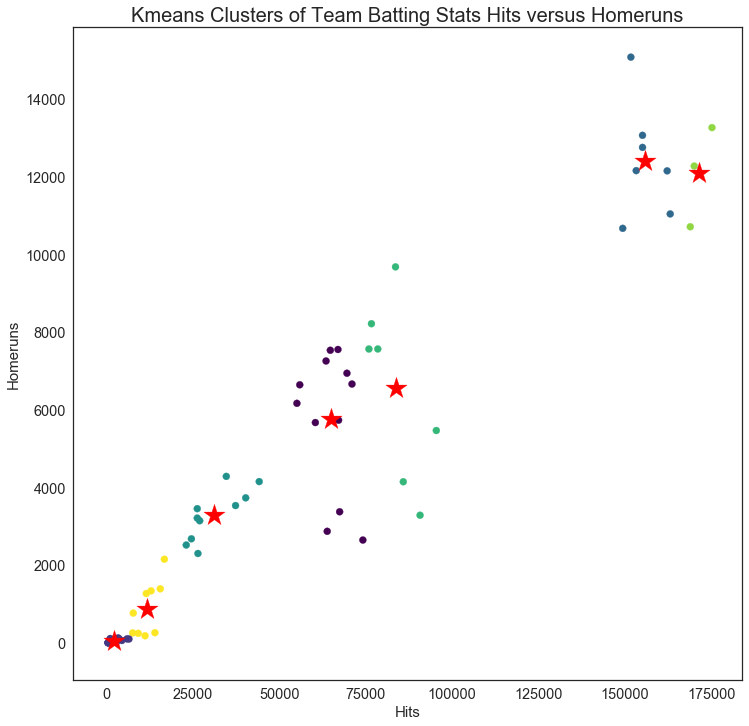

In [414]:
plt.figure(figsize=(12,12))
plt.tick_params(axis='both', which='both', direction='in', labelsize='x-large')
plt.scatter(batting_team['h'], batting_team['hr'],
                c=batting_team['kmeans_clusters'], marker=None, vmin=None, vmax=None,
                alpha=None, cmap='viridis')
plt.scatter(centroids['h'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Team Batting Stats Hits versus Homeruns', fontsize=20)
plt.xlabel('Hits', fontsize=15)
plt.ylabel('Homeruns', fontsize=15);

## HDBSCAN

In [415]:
# ss = StandardScaler()
# batters_years = ss.fit_transform(batters_years)

In [416]:
hdb = HDBSCAN(min_cluster_size=6)
hdb.fit(batting_team)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=6, min_samples=None, p=None,
    prediction_data=False)

In [417]:
# investigate clusters to see how they are made up
pd.Series(hdb.labels_).value_counts().sort_index()

-1     6
 0    10
 1    19
 2     6
 3    28
dtype: int64

In [418]:
# batters_years[batters_years['hdb_clusters'] == 2]

In [419]:
batting_team['hdb_clusters'] = hdb.labels_

In [420]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batting_team,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [421]:
show_cluster_results(2, 'hdb_clusters')

g      ab      r      h    2b   3b    hr      rbi      sb     cs  \
teamid                                                                         
ML1     18728   61600   8699  16802  2661  526  2152   8252.0   638.0  363.0   
WAS     28926   98190  14099  26507  4747  984  2300  12861.0  2785.0  431.0   
ARI     30034   98219  13638  26308  5405  772  3211  12935.0  1763.0  708.0   
MIL     30901   99008  13558  26308  5378  553  3454  12947.0  1948.0  768.0   
LAA     25899   86855  11622  23127  4287  440  2518  11130.0  1628.0  689.0   
TBA     31199  104295  13565  27016  5343  644  3143  12992.0  2278.0  900.0   

            ...          sf    gidp     1b  period   bavg    obp    ops  \
teamid      ...                                                           
ML1         ...       453.0  1397.0  11463   3.391  0.263  0.324  0.736   
WAS         ...       521.0  1469.0  18476   4.355  0.262  0.332  0.724   
ARI         ...       811.0  2102.0  16920   6.590  0.261  0.330  0.752   
MIL         ...       748.0  2281.0  16923   6.606  0.260  0.331  0.752   
LAA         ...       748.0  2048.0  15882   6.235  0.257  0.321  0.717   
TBA         ...       867.0  2216.0  17886   6.581  0.252  0.319  0.719   

          slg  kmeans_clusters  hdb_clusters  
teamid                                        
ML1     0.412                6             2  
WAS     0.392                3             2  
ARI     0.422                3             2  
MIL     0.422                3             2  
LAA     0.396                3             2  
TBA     0.400                3             2  

[6 rows x 25 columns]

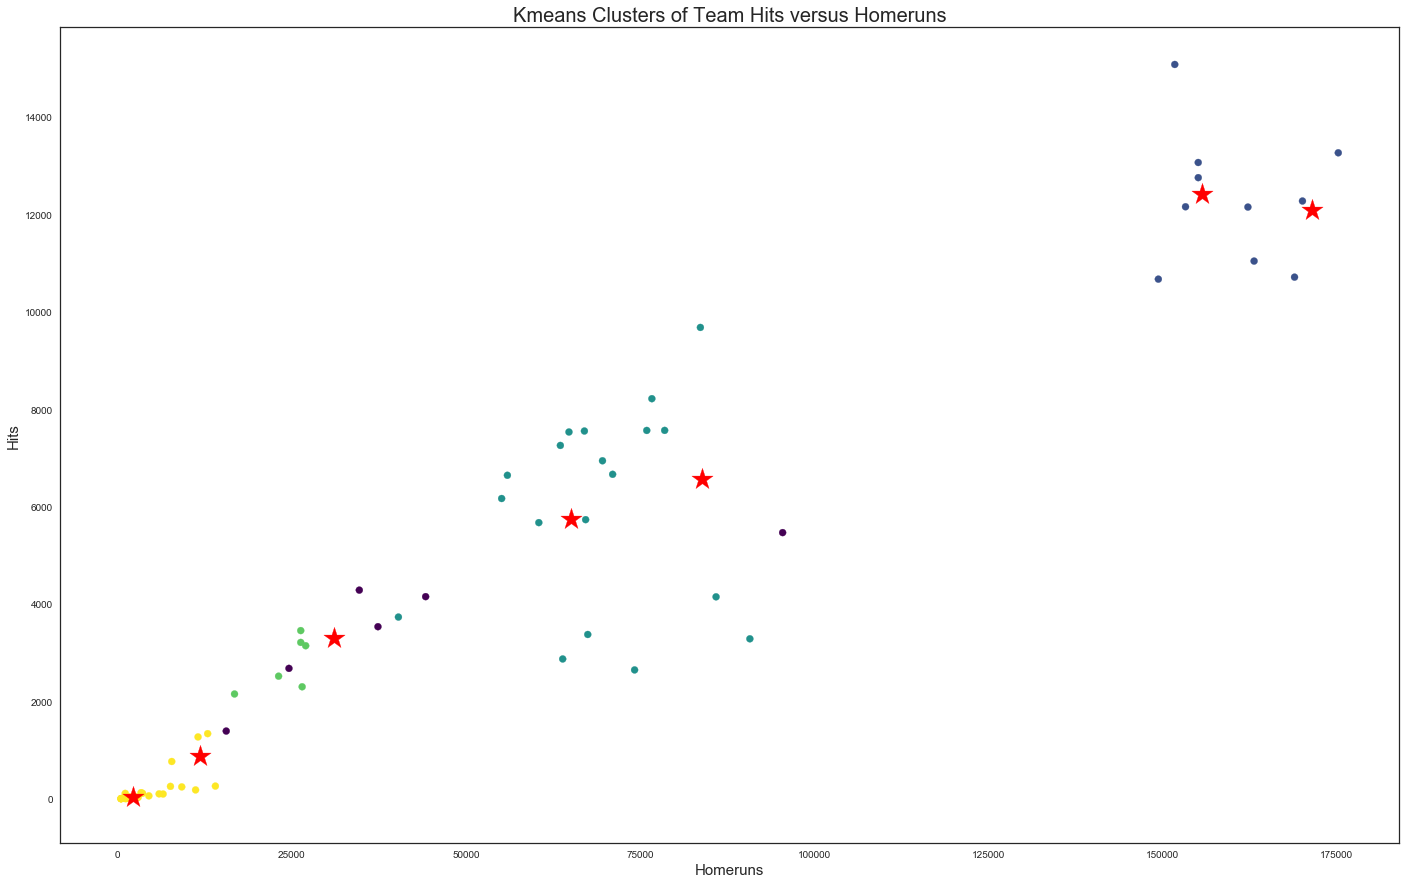

In [422]:

plt.figure(figsize=(24,15))
plt.scatter(batting_team['h'], batting_team['hr'],
           c=batting_team['hdb_clusters'], cmap='viridis')

plt.scatter(centroids['h'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Team Hits versus Homeruns', fontsize=20)
plt.xlabel('Homeruns', fontsize=15)
plt.ylabel('Hits', fontsize=15)

plt.show()

# Model the Data

In [423]:
# Define my x and y
# we will test one cluster at a time
features = [each for each in batting_team.columns if each not in ['kmeans_clusters','hdb_clusters']]
X = batting_team[features]
y = batting_team['kmeans_clusters']

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [425]:
X_train.head()

g      ab      r       h     2b    3b     hr      rbi       sb  \
teamid                                                                        
SL5       1995    7498    901    1749    290    66     38    659.0    154.0   
PHA      70380  244294  33609   67500  11476  3096   3374  29925.0   4792.0   
CLE     166039  561973  76891  153291  27402  4987  12157  71112.0  10523.0   
MIL      30901   99008  13558   26308   5378   553   3454  12947.0   1948.0   
NY3        490    2093    255     484     39    12      2    156.0      0.0   

            cs  ...       hbp      sh      sf    gidp      1b  period   bavg  \
teamid          ...                                                            
SL5        0.0  ...       0.0     0.0     0.0     0.0    1355   0.000  0.216   
PHA     1694.0  ...    1524.0  5975.0    29.0  1834.0   49554   1.889  0.266   
CLE     4795.0  ...    4037.0  9221.0  2858.0  9063.0  108745   3.744  0.265   
MIL      768.0  ...    1260.0   531.0   748.0  2281.0   16923   6.606  0.260   
NY3        0.0  ...       0.0     0.0     0.0     0.0     431   0.000  0.230   

          obp    ops    slg  
teamid                       
SL5     0.255  0.533  0.278  
PHA     0.331  0.700  0.369  
CLE     0.330  0.718  0.388  
MIL     0.331  0.752  0.422  
NY3     0.236  0.499  0.262  

[5 rows x 23 columns]

In [426]:
y_train.head()

teamid
SL5    1
PHA    0
CLE    2
MIL    3
NY3    1
Name: kmeans_clusters, dtype: int32

In [427]:
pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

params = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__criterion': ['gini', 'entropy'],
    'rf__verbose': [2],
    'rf__n_jobs': [-1],
    'rf__random_state': [42]
}
gs_rf = GridSearchCV(pipe_rf, params, n_jobs=-1, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)
gs_rf.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.1s finished


building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9607843137254902

In [428]:
gs_rf.best_params_

{'rf__criterion': 'entropy',
 'rf__n_estimators': 10,
 'rf__n_jobs': -1,
 'rf__random_state': 42,
 'rf__verbose': 2}

In [429]:
gs_rf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.8888888888888888

In [430]:
y_preds_gs_rf = gs_rf.predict(X_test)

confusion_matrix(y_test, y_preds_gs_rf)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[3, 0, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2]], dtype=int64)

In [431]:
# pipe_lr = Pipeline([
#     ('ss', StandardScaler()),
#     ('lr', LogisticRegressionCV())
# ])

# params = {
#     'lr__Cs': [10, 50, 100],
#     'lr__cv': [3,5,7,9],
#     'lr__penalty': ['l2'],
#     'lr__max_iter': [10,100,1000],
#     'lr__verbose': [2],
#     'lr__n_jobs': [-1],
#     'lr__random_state': [42]
# }
# gs_lr = GridSearchCV(pipe_lr, params, n_jobs=-1, cv=5, verbose=2)
# gs_lr.fit(X_train, y_train)
# gs_lr.best_score_

In [432]:
# gs_lr.best_params_

In [433]:
# gs_lr.score(X_test, y_test)

In [434]:
# y_preds_gs_lr = gs_lr.predict(X_test)

# confusion_matrix(y_test, y_preds_gs_lr)

## Batting team year

## PCA first

In [435]:
batting_team_year.columns

Index(['g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
       'ibb', 'hbp', 'sh', 'sf', 'gidp', '1b', 'period', 'bavg', 'obp', 'ops',
       'slg'],
      dtype='object')

### Scale data for use with PCA

We already did this above

### Find Z scores

In [436]:
batting_team_year_ss

g        ab         r         h        2b        3b        hr  \
0     0.964788  1.538076  1.473899  1.423038  1.078306 -0.958853  0.926361   
1     0.543359  0.829367  0.756237  0.847767  1.416476 -0.860772  0.601094   
2     0.421500  0.740532  0.283423  0.321983  0.282613 -1.204055  0.789407   
3     0.655063  1.239984  1.549887  1.392109  1.575615 -0.517490  2.141831   
4     0.634753  0.963607  0.165220  0.693125  0.919168 -0.958853  0.738049   
5     0.578901  1.034675  1.288151  1.367366  1.874000 -0.615571  0.755168   
6     1.086647  0.947814  0.460728  0.792096  0.939060 -0.664611  0.720929   
7     0.517972  1.196553  1.313481  1.614794  0.779921 -0.321329  0.840764   
8     0.903859  0.722765 -0.104959  0.136411  0.163259  0.021953  0.875003   
9     0.665218  0.855031  1.870725  1.225095  1.018629  0.070994  1.782325   
10   -0.223336 -0.351156  0.477615 -0.061531  0.580998 -0.272288  1.011957   
11    1.106957  0.655645  1.144619  0.773539  0.998737 -0.566530  1.696729   
12    0.766767  0.377294  1.051745  0.594153  0.919168 -0.272288  0.909242   
13    1.381139  1.024805  0.494501  0.928181  1.535830  0.120034  0.789407   
14   -0.527984 -0.434069 -0.940825 -0.407930  0.580998 -0.370369  0.155993   
15    1.030795  0.564835  0.173663  0.346725  1.137983 -0.909813  1.439940   
16    0.538282  0.762247  0.739350  0.866324  1.774538 -0.321329  0.909242   
17    0.634753  0.195675  0.114562 -0.209988  0.819706 -0.272288  1.046196   
18    0.721070  0.298329  0.300310 -0.092459  1.515938  0.169074  0.857884   
19    0.436733  0.306226  0.139891  0.006512  1.118091 -0.125168  0.960599   
20    0.182860  0.142374  0.072346 -0.271845  0.939060 -0.468450  1.148912   
21    0.061001 -0.098469  0.207436 -0.414116  0.899275 -0.321329  0.840764   
22   -0.380737 -0.363000  0.038574 -0.234731  1.018629 -0.762692  0.806526   
23    0.248867  0.521405 -0.096516  0.458068  1.038522 -0.762692  0.344305   
24   -0.040548  0.272666 -0.628431 -0.104831  0.421859  0.070994  0.087516   
25    0.589056  0.635904  0.232765  0.656010  1.038522  0.120034  0.720929   
26    0.538282  0.586551  0.401627  0.600339  1.038522  0.365236  1.166031   
27    0.782000  0.592473  0.975757  0.210640  1.515938 -0.370369  1.850803   
28    0.619521  0.549042  0.654919  0.637453 -0.234588 -0.713651  1.748087   
29    0.213325  0.096969 -0.518670 -0.469787 -0.771681 -0.860772  0.857884   
...        ...       ...       ...       ...       ...       ...       ...   
2664 -0.243646 -0.037271 -0.679089 -0.055345  0.521321  0.855639 -0.768449   
2665 -0.243646 -0.463680 -1.650045 -1.032686 -1.129743  0.070994 -1.059477   
2666  0.446888 -0.175459 -0.898610 -0.803815 -0.612542  1.198921 -1.247789   
2667  0.040691 -0.080701 -0.881723 -0.327516 -0.473296 -0.125168 -0.391825   
2668 -0.269033 -0.268243 -0.104959 -0.191431 -0.930819  0.316195 -0.528779   
2669 -0.076090  0.201598 -0.138731  0.154969  0.163259  0.021953 -0.888284   
2670 -0.649843 -0.599895 -0.966154 -1.026500 -0.572757 -0.223248 -0.973881   
2671 -1.025574 -0.777565 -0.299150 -0.550201 -0.234588  0.267155 -0.682853   
2672  0.066079 -0.072805 -0.392024 -0.401745 -0.831358  1.149881 -0.426063   
2673 -0.020238 -0.678859 -0.932382 -0.859487 -1.249097  0.365236 -0.545898   
2674  0.330106 -0.287984 -0.417353 -0.488344 -0.692111  0.610437 -0.015200   
2675  0.101621 -0.412353 -0.873280 -0.723401 -0.532973 -0.419409  0.019038   
2676  0.233635 -0.532775 -1.168789 -0.970829 -1.368451 -0.615571  0.207351   
2677 -0.106555 -0.978925 -0.822622 -1.403828 -1.288882 -0.762692  0.909242   
2678  0.594134 -0.291932 -0.138731 -0.624430 -0.672219 -0.223248  0.618214   
2679  0.624599  0.057487 -0.535557 -0.463602 -0.334049 -0.027087  0.173112   
2680  1.320210  0.558913 -0.653760  0.167340 -0.373834 -0.517490  0.429901   
2681  0.624599  0.233183 -0.864837 -0.810001 -0.731896 -0.517490  0.498379   
2682  0.929246  0.219365 -0.873280 -0.673915 -0.692111 -0.762692  0.224470   
2683  1.436991  0.304252 -0.763520 

### Visualize correlation

In [437]:
# g = sns.PairGrid(batting_team_year_ss)
# g = g.map_lower(sns.regplot)
# g = g.map_upper(sns.kdeplot, cmap='Reds', shade=True, shade_lowest=False)
# g = g.map_diag(plt.hist)

# plt.show()

### Visualize using heatmap

Text(0.5,1,'Batting Stats by Team Year Correlation')

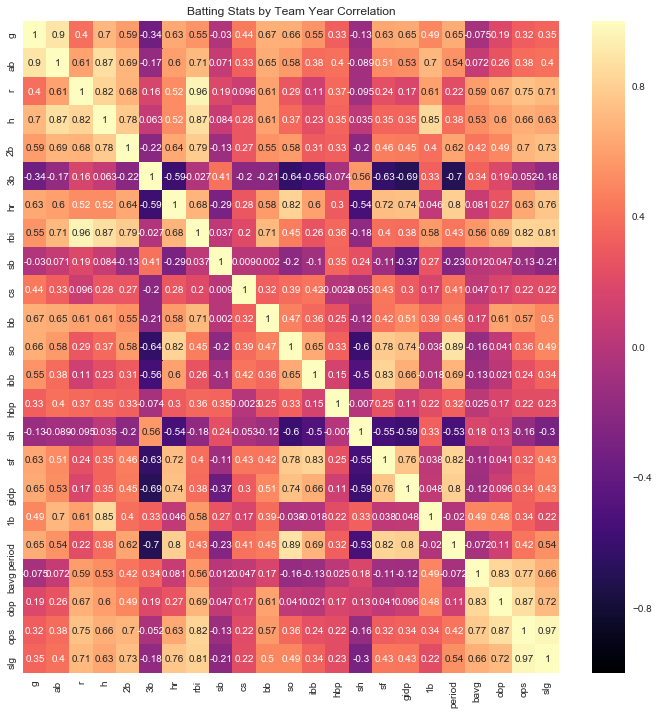

In [438]:
plt.figure(figsize=(12,12))
sns.heatmap(batting_team_year_ss.corr(),
           vmin=-1,
           vmax=1,
           cmap='magma',
           annot=True)
plt.title('Batting Stats by Team Year Correlation')

### PCA for batting stats

In [451]:
batting_team_year_pca = PCA(n_components=23)
batting_team_year_pca.fit(batting_team_year_ss.values)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Explained variance

In [452]:
for each in batting_team_year_pca.components_:
    for each in list(zip(batting_team_year_ss.columns, each)):
        print(each)
    print()

('g', -0.24407451465094154)
('ab', -0.24994266985683045)
('r', -0.2257664202511803)
('h', -0.25386477852410666)
('2b', -0.2613181152725338)
('3b', 0.12307240515009074)
('hr', -0.2715553583905836)
('rbi', -0.27088514941699365)
('sb', 0.03600328218624943)
('cs', -0.1291483838205854)
('bb', -0.23478775400420626)
('so', -0.23845657664290523)
('ibb', -0.1854860519698338)
('hbp', -0.12119848974284379)
('sh', 0.11705178251177817)
('sf', -0.22572536256682252)
('gidp', -0.22221121438663172)
('1b', -0.13517626279689549)
('period', -0.243592454099573)
('bavg', -0.10513451230153856)
('obp', -0.17017691606581492)
('ops', -0.23995136856657423)
('slg', -0.2523807128228052)

('g', -0.06854290502405513)
('ab', 0.04042104386690504)
('r', 0.2518456581749504)
('h', 0.2089901325832243)
('2b', 0.07548745251256184)
('3b', 0.345245375486733)
('hr', -0.13508966022479094)
('rbi', 0.1850200361940974)
('sb', 0.15909638112210983)
('cs', -0.06689191187125278)
('bb', 0.05921027989425029)
('so', -0.23303945880013116)

In [453]:
batting_team_year_pca.explained_variance_

array([1.01864698e+01, 4.86782300e+00, 2.18600913e+00, 1.23137438e+00,
       1.00448247e+00, 6.94187181e-01, 6.51061928e-01, 5.24364021e-01,
       3.43573639e-01, 2.96983611e-01, 2.51753887e-01, 2.23696261e-01,
       1.49531511e-01, 1.31365689e-01, 9.31996239e-02, 6.97164938e-02,
       5.09559977e-02, 1.76582453e-02, 1.38507649e-02, 1.14872334e-02,
       8.94356565e-03, 5.22555586e-05, 5.35266132e-31])

In [454]:
batting_team_year_pca.explained_variance_ratio_

array([4.42725592e-01, 2.11565917e-01, 9.50085952e-02, 5.35181434e-02,
       4.36569397e-02, 3.01708479e-02, 2.82965329e-02, 2.27899730e-02,
       1.49324394e-02, 1.29075379e-02, 1.09417582e-02, 9.72231418e-03,
       6.49895675e-03, 5.70943158e-03, 4.05065342e-03, 3.03002676e-03,
       2.21465579e-03, 7.67464809e-04, 6.01983634e-04, 4.99259541e-04,
       3.88706341e-04, 2.27113746e-06, 2.32638019e-32])

### Transform batting team year stats into PCA space

In [455]:
batting_team_year_pca_transformed = batting_team_year_pca.transform(batting_team_ss)

In [456]:
batting_team_year_pca_transformed = pd.DataFrame(batting_team_year_pca_transformed,
                                       columns=batting_team_year_ss.columns)

batting_team_year_pca_transformed

g        ab         r         h        2b        3b        hr  \
0   1.045491 -0.132622  2.553744 -0.006862  0.126808 -0.515513 -0.258910   
1  -0.210652 -0.294062  2.119776  0.199824  0.302027 -0.467735 -0.235066   
2  -2.604718 -0.656648  0.147382 -0.089881  0.927453  0.103667 -0.089404   
3  -3.578798 -0.646907 -0.495848  0.075744  0.595212 -0.023139  0.042459   
4   3.453880 -0.682772  1.093138 -0.170148 -1.056830  0.488797 -0.190856   
5   2.066078  1.119295  3.365100 -0.326415  0.177832 -0.115750 -0.127351   
6   1.715443  1.959657  3.116887 -0.004249  0.499275 -0.131995  0.012616   
7  -6.533982  1.989421 -2.873800 -0.274829  0.936275 -0.562766  0.133273   
8  -0.659652  2.697714 -1.064126  0.250514 -0.263702 -0.365895  0.358286   
9  -0.235226  2.424183 -1.800167  0.281150 -0.764437 -0.325109  0.318327   
10 -0.148258 -0.705971  0.424353 -0.258933  0.315634 -0.147762  0.010894   
11 -5.634717  1.949075 -4.061106 -0.216213  1.792334 -0.913763  0.118795   
12 -6.647964  2.736576 -4.274204  0.431972  1.028892  0.064748  0.138473   
13 -6.239215  2.393018 -4.060387  0.447955  1.588525  0.022190  0.106504   
14  4.167536 -1.659435  0.006136 -0.069058 -1.544244  0.632495 -0.002420   
15  2.530170  0.631529  1.578556 -0.047085 -0.347946  0.233066  0.301195   
16 -6.133690  2.078804 -3.294847 -0.345441  1.350182 -0.778431 -0.027777   
17  4.013946 -1.241442  0.490951 -0.154623 -1.287259  0.588584 -0.151602   
18 -1.193771  0.531498  2.685819  0.095273  0.836661 -0.569953 -0.482399   
19 -6.241923  2.219802 -3.274172 -0.355416  1.230856 -0.592073  0.194329   
20  3.339684 -0.665257  0.957251 -0.055847 -1.014881  0.469713  0.059482   
21 -0.028702 -0.114884  2.113316  0.143598  0.466197 -0.555137 -0.191942   
22  3.952136 -1.014395  0.794010 -0.201808 -1.134386  0.565371 -0.290028   
23 -2.657478 -0.607048 -0.528896  0.105820  1.361031  0.112750 -0.190917   
24  4.390986 -1.690142  0.048547 -0.115374 -1.461415  0.631121 -0.021653   
25  3.660758 -1.004800  0.697359  0.000810 -1.024874  0.424791  0.291442   
26  1.622260 -0.527761  1.563114 -0.128598 -0.358774 -0.094729  0.103277   
27 -2.152394 -0.335973 -0.207370  0.070629  0.997451  0.018147 -0.410865   
28  4.285801 -1.857959 -0.035099 -0.021171 -1.507186  0.544983  0.319495   
29  0.486531 -0.603316  1.679206  0.082952  0.034791 -0.386987 -0.189164   
..       ...       ...       ...       ...       ...       ...       ...   
39  3.055951 -0.184847  1.890659 -0.243041 -0.518074  0.135066  0.053545   
40 -0.819009 -0.489901  0.597903 -0.080096  0.921948 -0.009891 -0.135401   
41 -1.219063  3.109299 -1.189400  0.717667 -0.084690 -0.247747  0.290779   
42  5.034202 -2.487807 -0.940485 -0.043329 -1.917860  0.828911 -0.025952   
43 -6.665664  2.032896 -2.753576  0.142255  1.294657 -0.362812  0.363966   
44 -2.563519 -0.866022 -0.427159 -0.000238  0.976408  0.171007 -0.058076   
45 -2.344391 -0.753189 -0.260548  0.216806  0.698430 -0.172047  0.113827   
46 -0.053935  2.134420 -0.232822 -0.457154 -0.062123 -0.789362  0.232987   
47 -6.506125  2.359105 -4.213978  0.634995  1.002292  0.012597  0.145100   
48  3.271835 -0.094946  1.982530 -0.283656 -0.619143  0.390868 -0.541082   
49 -6.213492  2.844129 -4.207454  0.524987  1.414934  0.094157 -0.117588   
50  3.514404 -0.756381  0.931076 -0.182458 -1.105606  0.499314 -0.073286   
51 -1.816698 -0.831703 -0.206760 -0.045924  0.882573  0.115358 -0.068693   
52  2.554450 -0.787187  1.864848 -0.053700 -0.499980 -0.243479  0.304353   
53 -1.566528 -0.757577  0.253759  0.181653  0.456288 -0.214258 -0.143097   
54 -3.268749 -0.588883 -0.304011 -0.075430  1.305808  0.270037 -0.111163   
55  4.215641 -1.459775  0.291432 -0.138474 -1.354176  0.600043 -0.060354   
56  4.753570 -2.474312 -0.862177  0.033834 -1.863099  0.685707  0.434899   
57  0.254520  1.760114 -0.428584 -0.621245 -0.002449 -0.739308  0.255378   
58 -6.306139  2.579097 -3.675830  0.259258  1.645127  0.108566 -0.055110   
59  5.045266 -2.604333 -1.011910 -0.002159 -1.976062  0.825

### Visualize transformed PCA features
-There should be no correlation

In [457]:
# sns.pairplot(batting_team_year_pca_transformed)

## Now  KMeans Clustering

In [458]:
batting_team_year[batting_team_year.columns]

g    ab    r     h   2b  3b   hr    rbi     sb    cs  ...    \
teamid year                                                           ...     
ANA    1997  1599  5506  817  1505  274  24  158  757.0  124.0  72.0  ...     
       1998  1516  5147  732  1412  291  26  139  696.0   84.0  42.0  ...     
       1999  1492  5102  676  1327  234  19  150  635.0   68.0  42.0  ...     
       2000  1538  5355  826  1500  299  33  229  801.0   89.0  48.0  ...     
       2001  1534  5215  662  1387  266  24  147  642.0  114.0  47.0  ...     
       2002  1523  5251  795  1496  314  31  148  768.0  110.0  43.0  ...     
       2003  1623  5207  697  1403  267  30  146  668.0  123.0  56.0  ...     
       2004  1511  5333  798  1536  259  37  153  746.0  135.0  42.0  ...     
ARI    1998  1587  5093  630  1297  228  44  155  605.0   71.0  38.0  ...     
       1999  1540  5160  864  1473  271  45  208  822.0  133.0  38.0  ...     
       2000  1365  4549  699  1265  249  38  163  653.0   85.0  38.0  ...     
       2001  1627  5059  778  1400  270  32  203  743.0   70.0  38.0  ...     
       2002  1560  4918  767  1371  266  38  157  729.0   92.0  46.0  ...     
       2003  1681  5246  701  1425  297  46  150  678.0   76.0  38.0  ...     
       2004  1305  4507  531  1209  249  36  113  475.0   48.0  31.0  ...     
       2005  1612  5013  663  1331  277  25  188  643.0   66.0  24.0  ...     
       2006  1515  5113  730  1415  309  37  157  696.0   73.0  28.0  ...     
       2007  1534  4826  656  1241  261  38  165  643.0  106.0  22.0  ...     
       2008  1551  4878  678  1260  296  47  154  630.0   57.0  23.0  ...     
       2009  1495  4882  659  1276  276  41  160  618.0   94.0  38.0  ...     
       2010  1445  4799  651  1231  267  34  171  629.0   84.0  39.0  ...     
       2011  1421  4677  667  1208  265  37  153  612.0  126.0  53.0  ...     
       2012  1334  4543  647  1237  271  28  151  625.0   89.0  44.0  ...     
       2013  1458  4991  631  1349  272  28  124  594.0   52.0  38.0  ...     
       2014  1401  4865  568  1258  241  45  109  526.0   80.0  31.0  ...     
       2015  1525  5049  670  1381  272  46  146  626.0  130.0  42.0  ...     
       2016  1515  5024  690  1372  272  51  172  653.0  129.0  30.0  ...     
       2017  1563  5027  758  1309  296  36  212  735.0  102.0  29.0  ...     
ATL    1966  1531  5005  720  1378  208  29  206  697.0   54.0  45.0  ...     
       1967  1451  4776  581  1199  181  26  154  557.0   53.0  43.0  ...     
...           ...   ...  ...   ...  ...  ..  ...    ...    ...   ...  ...     
WS1    1946  1361  4708  562  1266  246  61   59  515.0   47.0  47.0  ...     
       1947  1361  4492  447  1108  163  45   42  421.0   45.0  49.0  ...     
       1948  1497  4638  536  1145  189  68   31  504.0   75.0  46.0  ...     
       1949  1417  4686  538  1222  196  41   81  511.0   46.0  32.0  ...     
       1950  1356  4591  630  1244  173  50   73  608.0   41.0  24.0  ...     
       1951  1394  4829  626  1300  228  44   52  597.0   45.0  37.0  ...     
       1952  1281  4423  528  1109  191  39   47  468.0   46.0  37.0  ...     
       1953  1207  4333  607  1186  208  49   64  574.0   61.0  35.0  ...     
       1954  1422  4690  596  1210  178  67   79  560.0   37.0  21.0  ...     
       1955  1405  4383  532  1136  157  51   72  510.0   23.0  30.0  ...     
       1956  1474  4581  593  1196  185  56  103  555.0   37.0  29.0  ...     
       1957  1429  4518  539  1158  193  35  105  515.0   12.0  35.0  ...     
       1958  1455  4457  504  1118  151  31  116  490.0   22.0  37.0  ...     
       1959  1388  4231  545  1048  155  28  157  536.0   46.0  32.0  ...     
       1960  1526  4579  626  1174  186  39  140  574.0   52.0  42.0  ...     
WS2    1961  1532  4756  579  1200  203  43  114  544.0   76.0  46.0  ...     
       1962  1669  5010  565  1302  201  33  129  544.0   98.0  52.0  ...     
       1963  1532  4845  540  1144  183  33  133  507.0   62.0  28

In [459]:
# Fitting batting team data on KMeans
# batting_team_year_cluster = batting_team_year[batting_team_year.columns]
km = KMeans(n_clusters=7,
           random_state=42)
km.fit(batting_team_year)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [460]:
centroids = pd.DataFrame(km.cluster_centers_, columns = batting_team_year.columns)

In [461]:
#looking at labels
km.labels_

array([5, 5, 5, ..., 1, 4, 4])

In [462]:
#Saving labels to a pandas seriers
pd.Series(km.labels_).value_counts()

3    691
5    605
2    477
0    437
4    325
1    105
6     54
dtype: int64

In [463]:
#saving labels to clustering data frame
batting_team_year['kmeans_clusters'] = km.labels_

In [464]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batting_team_year,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [465]:
show_cluster_results(6, 'kmeans_clusters')[batting_team_year.columns]

g    ab    r    h   2b  3b  hr    rbi     sb    cs  \
teamid year                                                         
CHN    1876  587  2712  618  915  128  32   8  439.0    0.0   0.0   
BSN    1877  545  2349  415  697   91  37   4  290.0    0.0   0.0   
CHN    1878  516  2196  351  646   87  19   3  279.0    0.0   0.0   
       1877  437  1853  310  540   72  28   0  219.0    0.0   0.0   
LS1    1877  539  2312  336  654   74  35   9  248.0    0.0   0.0   
PHN    1876  468  2084  333  590   72  34   7  233.0    0.0   0.0   
CHN    1880  756  3060  531  863  163  37   4  375.0    0.0   0.0   
CN1    1878  537  2232  329  617   67  22   5  220.0    0.0   0.0   
       1877  337  1402  205  380   52  25   5  162.0    0.0   0.0   
BFN    1882  733  3035  488  844  146  46  18  375.0    0.0   0.0   
PIT    1981  885  2938  358  792  157  27  47  330.0  117.0  49.0   
BFN    1881  712  2879  428  773  152  50  12  342.0    0.0   0.0   
BSN    1882  750  3062  466  808  113  50  15  364.0    0.0   0.0   
       1876  590  2565  452  694   94  23   9  267.0    0.0   0.0   
DTN    1881  669  2663  409  708  117  50  17  321.0    0.0   0.0   

                  ...           sh    sf  gidp   1b  period   bavg    obp  \
teamid year       ...                                                       
CHN    1876       ...          0.0   0.0   0.0  747       0  0.326  0.343   
BSN    1877       ...          0.0   0.0   0.0  565       0  0.294  0.312   
CHN    1878       ...          0.0   0.0   0.0  537       0  0.291  0.316   
       1877       ...          0.0   0.0   0.0  440       0  0.287  0.301   
LS1    1877       ...          0.0   0.0   0.0  536       0  0.283  0.299   
PHN    1876       ...          0.0   0.0   0.0  477       0  0.279  0.287   
CHN    1880       ...          0.0   0.0   0.0  659       0  0.277  0.299   
CN1    1878       ...          0.0   0.0   0.0  523       0  0.276  0.294   
       1877       ...          0.0   0.0   0.0  298       0  0.271  0.295   
BFN    1882       ...          0.0   0.0   0.0  634       0  0.267  0.291   
PIT    1981       ...         24.0  29.0  50.0  561       5  0.266  0.322   
BFN    1881       ...          0.0   0.0   0.0  559       0  0.264  0.287   
BSN    1882       ...          0.0   0.0   0.0  630       0  0.262  0.293   
       1876       ...          0.0   0.0   0.0  568       0  0.262  0.277   
DTN    1881       ...          0.0   0.0   0.0  524       0  0.262  0.292   

               ops    slg  kmeans_clusters  
teamid year                                 
CHN    1876  0.743  0.400                6  
BSN    1877  0.682  0.370                6  
CHN    1878  0.667  0.351                6  
       1877  0.652  0.352                6  
LS1    1877  0.656  0.356                6  
PHN    1876  0.639  0.351                6  
CHN    1880  0.654  0.355                6  
CN1    1878  0.625  0.331                6  
       1877  0.649  0.355                6  
BFN    1882  0.650  0.359                6  
PIT    1981  0.709  0.387                6  
BFN    1881  0.647  0.360                6  
BSN    1882  0.638  0.345                6  
       1876  0.603  0.326                6  
DTN    1881  0.654  0.362                6  

[15 rows x 24 columns]

In [466]:
# sse = {}
# for k in range(1, 15):
#     kmeans = KMeans(n_clusters=k, max_iter=1000000).fit(batters)
#     batters["clusters"] = kmeans.labels_
#     #print(batters["clusters"])
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure(figsize=(10,10))
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.title('KMeans Elbow', fontsize=15)
# plt.xlabel("Number of cluster", fontsize=13)
# plt.ylabel("Sum of Squared Errors", fontsize=13)
# plt.show()

In [467]:
# ks = range(2,16)
# sil = []

# for n_cluster in range(2, 16):
#     kmeans = KMeans(n_clusters=n_cluster).fit(batters)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(batters, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
#     sil.append(sil_coeff)

In [468]:
# plt.plot(ks, sil, '-o')
# plt.title('Silhouette Score');

In [469]:
# # Call k-means to cluster the stats
# kmeans = KMeans(n_clusters=7, random_state=42)
# model = kmeans.fit(batting_team)
# centroids = pd.DataFrame(model.cluster_centers_, columns = batting_year.columns)

In [470]:
batting_team_year.columns

Index(['g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
       'ibb', 'hbp', 'sh', 'sf', 'gidp', '1b', 'period', 'bavg', 'obp', 'ops',
       'slg', 'kmeans_clusters'],
      dtype='object')

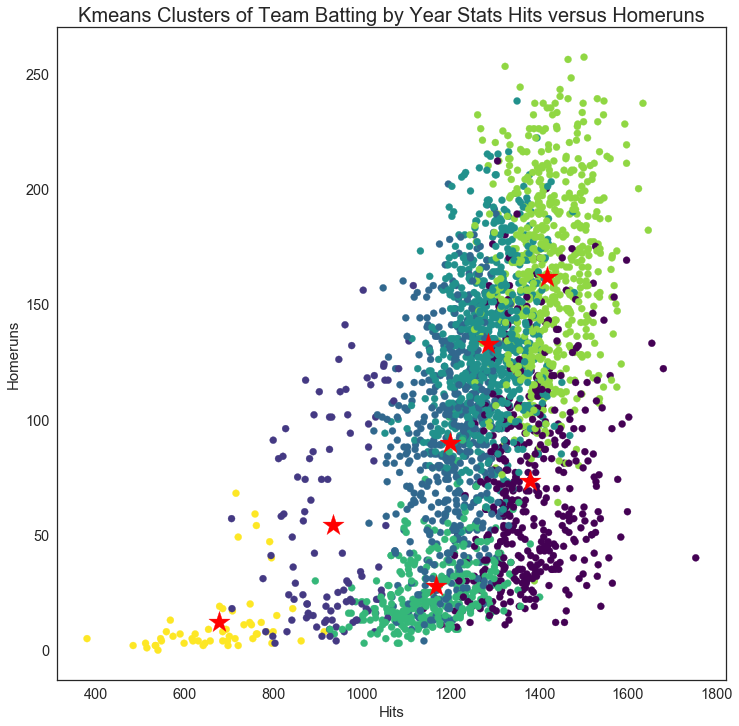

In [471]:
plt.figure(figsize=(12,12))
plt.tick_params(axis='both', which='both', direction='in', labelsize='x-large')
plt.scatter(batting_team_year['h'], batting_team_year['hr'],
                c=batting_team_year['kmeans_clusters'], marker=None, vmin=None, vmax=None,
                alpha=None, cmap='viridis')
plt.scatter(centroids['h'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Team Batting by Year Stats Hits versus Homeruns', fontsize=20)
plt.xlabel('Hits', fontsize=15)
plt.ylabel('Homeruns', fontsize=15);

## HDBSCAN

In [472]:
hdb = HDBSCAN(min_cluster_size=6)
hdb.fit(batting_team_year)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=6, min_samples=None, p=None,
    prediction_data=False)

In [473]:
# investigate clusters to see how they are made up
pd.Series(hdb.labels_).value_counts().sort_index()

-1     301
 0      16
 1      43
 2      27
 3     150
 4      12
 5    2145
dtype: int64

In [474]:
batting_team_year['hdb_clusters'] = hdb.labels_

In [475]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batting_team_year,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [476]:
show_cluster_results(2, 'hdb_clusters')

g    ab    r    h   2b  3b  hr    rbi   sb   cs      ...       \
teamid year                                                         ...        
CHN    1880  756  3060  531  863  163  37   4  375.0  0.0  0.0      ...        
BSN    1879  755  3197  560  876  137  51  20  392.0  0.0  0.0      ...        
BFN    1882  733  3035  488  844  146  46  18  375.0  0.0  0.0      ...        
       1881  712  2879  428  773  152  50  12  342.0  0.0  0.0      ...        
BSN    1882  750  3062  466  808  113  50  15  364.0  0.0  0.0      ...        
DTN    1881  669  2663  409  708  117  50  17  321.0  0.0  0.0      ...        
WOR    1881  708  2940  402  762  113  31   7  268.0  0.0  0.0      ...        
CN1    1879  714  3016  474  800  127  53   8  357.0  0.0  0.0      ...        
CHN    1879  729  3050  432  797  166  32   3  288.0  0.0  0.0      ...        
CL2    1881  718  2925  384  764  118  38   7  270.0  0.0  0.0      ...        
PRO    1882  683  2818  434  734  119  53  11  301.0  0.0  0.0      ...        
       1881  735  2941  432  751  140  36  11  308.0  0.0  0.0      ...        
NY1    1883  823  3300  513  867  136  68  24  358.0  0.0  0.0      ...        
BFN    1879  706  2870  386  721  104  54   2  271.0  0.0  0.0      ...        
PRO    1880  769  3137  414  785  114  34   8  277.0  0.0  0.0      ...        

              sf  gidp   1b  period   bavg    obp    ops    slg  \
teamid year                                                       
CHN    1880  0.0   0.0  659       0  0.277  0.299  0.654  0.355   
BSN    1879  0.0   0.0  668       0  0.273  0.292  0.651  0.360   
BFN    1882  0.0   0.0  634       0  0.267  0.291  0.650  0.359   
       1881  0.0   0.0  559       0  0.264  0.287  0.647  0.360   
BSN    1882  0.0   0.0  630       0  0.262  0.293  0.638  0.345   
DTN    1881  0.0   0.0  524       0  0.262  0.292  0.654  0.362   
WOR    1881  0.0   0.0  611       0  0.259  0.286  0.607  0.321   
CN1    1879  0.0   0.0  612       0  0.258  0.273  0.609  0.336   
CHN    1879  0.0   0.0  596       0  0.257  0.273  0.605  0.332   
CL2    1881  0.0   0.0  601       0  0.256  0.284  0.605  0.321   
PRO    1882  0.0   0.0  551       0  0.253  0.276  0.616  0.341   
       1881  0.0   0.0  564       0  0.252  0.286  0.618  0.333   
NY1    1883  0.0   0.0  639       0  0.248  0.271  0.614  0.343   
BFN    1879  0.0   0.0  561       0  0.248  0.268  0.590  0.322   
PRO    1880  0.0   0.0  629       0  0.246  0.266  0.580  0.314   

             kmeans_clusters  hdb_clusters  
teamid year                                 
CHN    1880                6             2  
BSN    1879                1             2  
BFN    1882                6             2  
       1881                6             2  
BSN    1882                6             2  
DTN    1881                6             2  
WOR    1881                6             2  
CN1    1879                6             2  
CHN    1879                6             2  
CL2    1881                6             2  
PRO    1882                6             2  
       1881                6             2  
NY1    1883                1             2  
BFN    1879                6             2  
PRO    1880                6             2  

[15 rows x 25 columns]

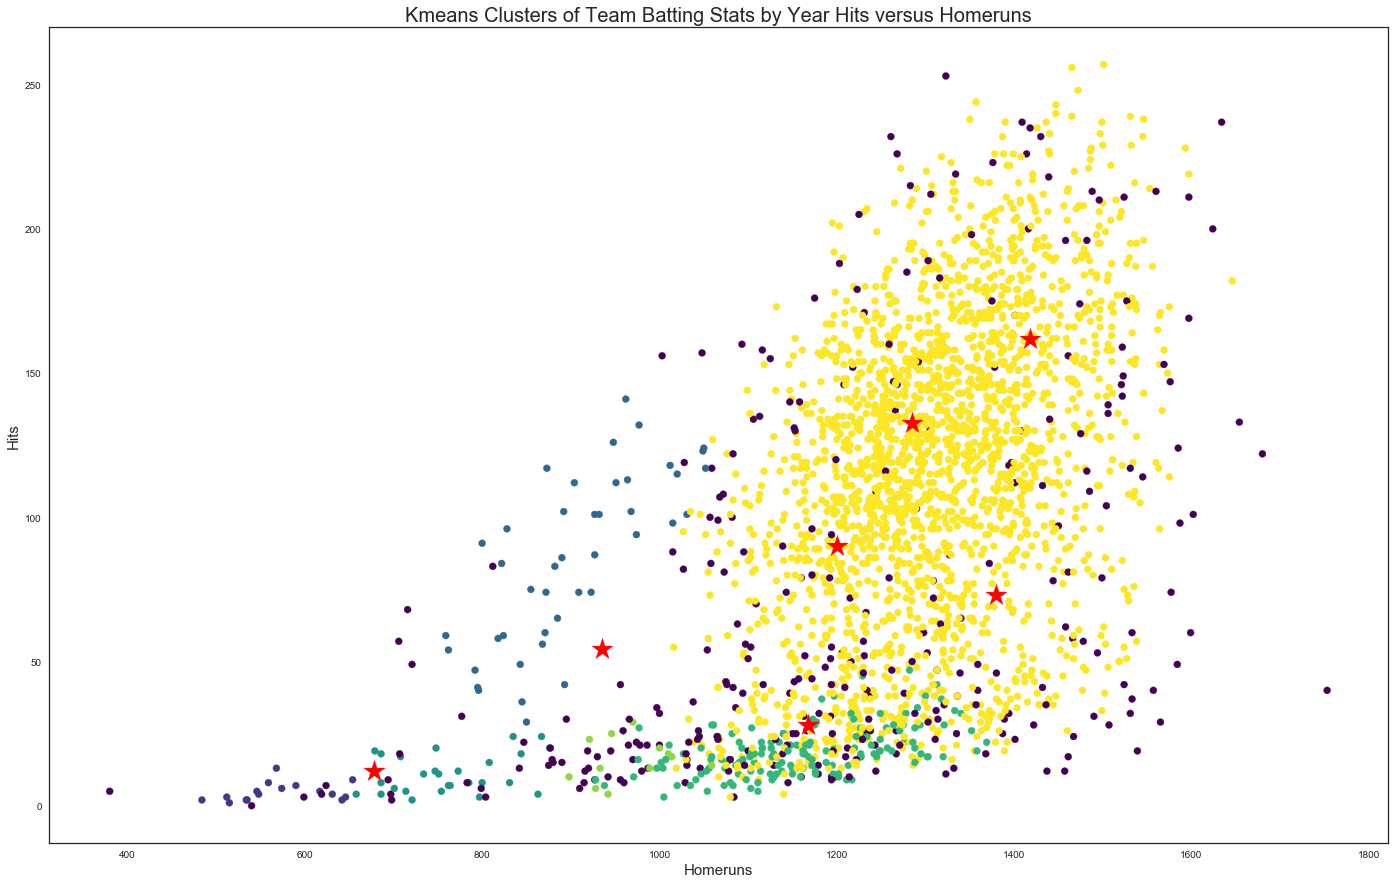

In [477]:

plt.figure(figsize=(24,15))
plt.scatter(batting_team_year['h'], batting_team_year['hr'],
           c=batting_team_year['hdb_clusters'], cmap='viridis')

plt.scatter(centroids['h'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Team Batting Stats by Year Hits versus Homeruns', fontsize=20)
plt.xlabel('Homeruns', fontsize=15)
plt.ylabel('Hits', fontsize=15)

plt.show()

# Model the Data

In [478]:
# Define my x and y
# we will test one cluster at a time
features = [each for each in batting_team_year.columns if each not in ['kmeans_clusters','hdb_clusters']]
X = batting_team_year[features]
y = batting_team_year['kmeans_clusters']

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [480]:
X_train.head()

g    ab    r     h   2b  3b   hr    rbi     sb    cs  ...    \
teamid year                                                           ...     
BOS    2006  1480  5133  759  1407  302  16  184  740.0   43.0  18.0  ...     
PIT    2012  1466  4685  592  1195  220  34  167  582.0   69.0  47.0  ...     
BRO    1902  1171  4409  530  1162  137  46   18  443.0  142.0   0.0  ...     
CIN    1974  1615  5010  742  1358  265  35  134  674.0  146.0  48.0  ...     
NYN    1984  1438  4619  587  1241  213  24  101  541.0  144.0  50.0  ...     

              hbp     sh    sf   gidp   1b  period   bavg    obp    ops    slg  
teamid year                                                                     
BOS    2006  61.0   21.0  55.0  124.0  905       7  0.267  0.346  0.775  0.429  
PIT    2012  48.0   28.0  41.0   88.0  774       7  0.249  0.312  0.719  0.408  
BRO    1902  56.0  111.0   0.0    0.0  961       1  0.252  0.305  0.619  0.315  
CIN    1974  30.0   22.0  44.0  110.0  924       4  0.259  0.340  0.735  0.395  
NYN    1984  18.0   24.0  39.0  114.0  903       5  0.260  0.328  0.693  0.365  

[5 rows x 23 columns]

In [481]:
y_train.head()

teamid  year
BOS     2006    5
PIT     2012    3
BRO     1902    4
CIN     1974    3
NYN     1984    3
Name: kmeans_clusters, dtype: int32

In [482]:
pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

params = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__criterion': ['gini', 'entropy'],
    'rf__verbose': [2],
    'rf__n_jobs': [-1],
    'rf__random_state': [42]
}
gs_rf = GridSearchCV(pipe_rf, params, n_jobs=-1, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)
gs_rf.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   49.2s finished


building tree 1 of 1000building tree 2 of 1000building tree 3 of 1000building tree 4 of 1000



building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000building tree 9 of 1000

building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000building tree 32 of 1000

building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000building tree 36 of 1000

building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 61 of 1000building tree 62 of 1000


building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000building tree 72 of 1000

building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000building tree 82 of 1000

building tree 83 of 1000
building tree 84 of 1000
building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000building tree 88 of 1000

building tree 89 of 1000
building tree 90 of 1000
building tree 91 of 1000
building tree 92 of 1000
building tree 93 of 1000
building tree 94 of 1000
building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000building tree 99 of 1000
building tree 100 of 1000

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.4s



building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000building tree 181 of 1000

building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000building tree 197 of 1000

building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.1s


building tree 383 of 1000
building tree 384 of 1000building tree 385 of 1000

building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000building tree 398 of 1000

building tree 399 of 1000
building tree 400 of 1000building tree 401 of 1000

building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000building tree 406 of 1000

building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000building tree 418 of 1000building tree 419 of 1000


building tree 420 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    2.2s


building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000building tree 650 of 1000

building tree 651 of 1000building tree 652 of 1000
building tree 653 of 1000

building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000building tree 657 of 1000

building tree 658 of 1000
building tree 659 of 1000building tree 660 of 1000building tree 661 of 1000


building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000building tree 665 of 1000building tree 666 of 1000


building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000building tree 672 of 1000

building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000building tree 679 of 1000

building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tre

building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000building tree 977 of 1000

building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000building tree 991 of 1000
building tree 992 of 1000

building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000building tree 998 of 1000
building tree 999 of 1000

building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.4s finished


0.946039603960396

In [483]:
gs_rf.best_params_

{'rf__criterion': 'gini',
 'rf__n_estimators': 1000,
 'rf__n_jobs': -1,
 'rf__random_state': 42,
 'rf__verbose': 2}

In [484]:
gs_rf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished


0.9510385756676558

In [485]:
y_preds_gs_rf = gs_rf.predict(X_test)

confusion_matrix(y_test, y_preds_gs_rf)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished


array([[ 91,   0,   2,   1,   3,   0,   0],
       [  0,  28,   0,   0,   0,   0,   1],
       [  2,   0, 105,   4,   5,   0,   0],
       [  1,   0,   1, 171,   0,   2,   0],
       [  5,   0,   4,   0,  81,   0,   0],
       [  0,   0,   0,   1,   0, 152,   0],
       [  0,   1,   0,   0,   0,   0,  13]], dtype=int64)

In [486]:
# pipe_lr = Pipeline([
#     ('ss', StandardScaler()),
#     ('lr', LogisticRegressionCV())
# ])

# params = {
#     'lr__Cs': [10, 50, 100],
#     'lr__cv': [3,5,7,9],
#     'lr__penalty': ['l2'],
#     'lr__max_iter': [10,100,1000],
#     'lr__verbose': [2],
#     'lr__n_jobs': [-1],
#     'lr__random_state': [42]
# }
# gs_lr = GridSearchCV(pipe_lr, params, n_jobs=-1, cv=5, verbose=2)
# gs_lr.fit(X_train, y_train)
# gs_lr.best_score_

In [487]:
# gs_lr.best_params_

In [488]:
# gs_lr.score(X_test, y_test)

In [489]:
# y_preds_gs_lr = gs_lr.predict(X_test)

# confusion_matrix(y_test, y_preds_gs_lr)

## Batters

## PCA first

In [490]:
batters.columns

Index(['g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
       'ibb', 'hbp', 'sh', 'sf', 'gidp', '1b', 'years', 'period', 'bavg',
       'obp', 'ops', 'slg'],
      dtype='object')

### Scale data for use with PCA

We already did this above

### Find Z scores

In [491]:
batters_ss

g        ab         r         h        2b        3b        hr  \
0     4.553473  4.794851  5.734168  5.212296  4.734971  2.969985  9.100476   
1    -0.454507 -0.553026 -0.554027 -0.568281 -0.486663 -0.445184 -0.420707   
2     0.345227  0.414124  0.203080  0.323386  0.037277  0.928308 -0.420707   
3    -0.218108 -0.090636  0.124966 -0.054167 -0.211373  1.039673 -0.305686   
4    -0.707673 -0.663097 -0.653172 -0.674318 -0.619868 -0.445184 -0.535728   
5    -0.692583 -0.687966 -0.605102 -0.642185 -0.548825 -0.593669 -0.356806   
6     0.087032 -0.022936 -0.037271 -0.062200  0.099439  0.185880  0.167178   
7    -0.789826 -0.781918 -0.680212 -0.759468 -0.699791 -0.593669 -0.484607   
8    -0.647315 -0.546118 -0.529992 -0.534543 -0.495543 -0.482305 -0.459047   
9    -0.897127 -0.834881 -0.725277 -0.783567 -0.753073 -0.556548 -0.497388   
10   -0.407563 -0.572369 -0.563040 -0.584347 -0.513304 -0.556548 -0.459047   
11   -0.154397 -0.214063 -0.079333 -0.182695 -0.264655  0.000273 -0.139544   
12    3.051247  2.984900  3.561992  3.106032  4.255433  1.522251  3.132164   
13    0.053500  0.212404  0.194067  0.320173  0.472413 -0.222455  1.036226   
14   -0.652345 -0.670465 -0.629137 -0.642185 -0.477782 -0.482305 -0.484607   
15   -0.746234 -0.663557 -0.644159 -0.632546 -0.628748 -0.296698 -0.535728   
16    0.003203  0.027264 -0.049289 -0.062200  0.001755 -0.073970 -0.011743   
17   -0.773060 -0.746456 -0.668194 -0.709663 -0.744192 -0.519426 -0.548508   
18    0.846528  0.842894  0.296216  0.710579  0.596737  0.000273  0.167178   
19   -0.773060 -0.795734 -0.722273 -0.767501 -0.744192 -0.556548 -0.522948   
20   -0.836770 -0.799419 -0.731286 -0.751435 -0.708671 -0.556548 -0.548508   
21   -0.632226 -0.638688 -0.713260 -0.659858 -0.673150 -0.556548 -0.522948   
22    1.015864  0.896778  0.912117  0.845534  0.827626  0.965430 -0.075644   
23   -0.050448 -0.008198  0.025821 -0.014001  0.010636 -0.259577  0.064937   
24   -0.903834 -0.834881 -0.767339 -0.802846 -0.761953 -0.630791 -0.522948   
25   -0.135955 -0.260578 -0.382777 -0.219647 -0.193612 -0.519426 -0.177885   
26   -0.825034 -0.749219 -0.683216 -0.709663 -0.744192 -0.445184 -0.548508   
27   -0.833417 -0.849158 -0.740299 -0.798026 -0.770833 -0.630791 -0.484607   
28   -0.090687 -0.168929 -0.214531 -0.153776  0.037277 -0.445184  0.371660   
29   -0.788149 -0.792050 -0.695233 -0.764288 -0.761953 -0.630791 -0.497388   
...        ...       ...       ...       ...       ...       ...       ...   
6491 -0.890421 -0.848237 -0.776352 -0.799633 -0.753073 -0.630791 -0.548508   
6492 -0.897127 -0.838565 -0.776352 -0.801240 -0.761953 -0.630791 -0.548508   
6493 -0.830064 -0.825670 -0.698238 -0.769107 -0.779714 -0.630791 -0.548508   
6494 -0.863596 -0.845934 -0.746308 -0.798026 -0.744192 -0.667912 -0.471827   
6495 -0.885391 -0.839026 -0.758326 -0.785174 -0.761953 -0.556548 -0.548508   
6496  0.680546  0.598803  0.593651  0.622216  0.783224  0.854066  0.167178   
6497 -0.597017 -0.540130 -0.496944 -0.552215 -0.646509 -0.593669 -0.011743   
6498  0.918622  0.585908  0.416392  0.450308  0.818746 -0.370941  0.461121   
6499 -0.699290 -0.751061 -0.665190 -0.701630 -0.744192 -0.482305 -0.522948   
6500  0.159126  0.134111 -0.004223 -0.001149 -0.326817  0.000273 -0.497388   
6501  2.595214  2.550603  2.143918  2.339680  2.692495  0.148759  2.672080   
6502  1.086281  0.994414  0.915121  0.906585  0.605618  0.148759  2.480378   
6503 -0.922276 -0.840407 -0.764335 -0.802846 -0.788594 -0.630791 -0.548508   
6504 -0.524924 -0.491773 -0.487930 -0.486344 -0.548825 -0.482305 -0.522948   
6505 -0.806591 -0.761654 -0.674203 -0.730549 -0.673150 -0.593669 -0.446267   
6506  0.947124  0.987966  0.903104  0.948357  0.978592  1.967708 -0.241785   
6507  0.730843  0.553670  0.221106  0.361945  0.321447  0.111637  0.601702   
6508 -0.771383 -0.707309 -0.704247 -0.722516 -0.717551 -0.408062 -0.510168   
6509  1.456808  1.539241  1.290671  1.666511  1.626856  3.229835  0.192738   
6510 -0.328763 -0.516642 -0.659181 

### Visualize correlation

In [492]:
# g = sns.PairGrid(batters_ss)
# g = g.map_lower(sns.regplot)
# g = g.map_upper(sns.kdeplot, cmap='Reds', shade=True, shade_lowest=False)
# g = g.map_diag(plt.hist)

# plt.show()

### Visualize using heatmap

Text(0.5,1,'Batters Stats Correlation')

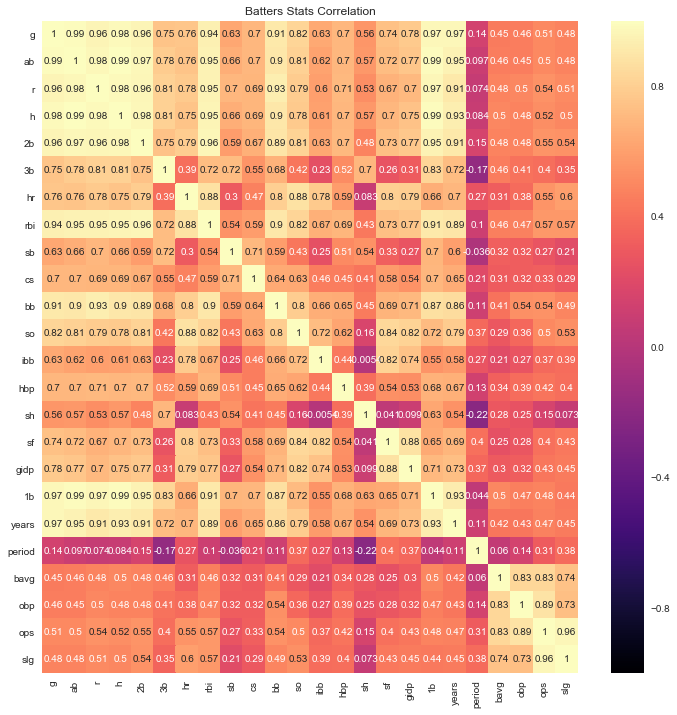

In [493]:
plt.figure(figsize=(12,12))
sns.heatmap(batters_ss.corr(),
           vmin=-1,
           vmax=1,
           cmap='magma',
           annot=True)
plt.title('Batters Stats Correlation')

### PCA for batting stats

In [500]:
batters_pca = PCA(n_components=24)
batters_pca.fit(batters_ss.values)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Explained variance

In [501]:
for each in batters_pca.components_:
    for each in list(zip(batters_ss.columns, each)):
        print(each)
    print()

('g', 0.25098840103445735)
('ab', 0.25154228143150237)
('r', 0.2503940594257524)
('h', 0.251613375665903)
('2b', 0.2500209622210419)
('3b', 0.19003701213982976)
('hr', 0.2122743966561682)
('rbi', 0.24727650579050597)
('sb', 0.16532663821606242)
('cs', 0.18493727486312528)
('bb', 0.23897857391870037)
('so', 0.22007026817521466)
('ibb', 0.17554508766616667)
('hbp', 0.18823255418325072)
('sh', 0.12330027593435769)
('sf', 0.19830742556136363)
('gidp', 0.20430891229618392)
('1b', 0.24478472344846583)
('years', 0.2392549442276042)
('period', 0.05024827287777573)
('bavg', 0.14121354961143315)
('obp', 0.1468226970812975)
('ops', 0.16469855826058916)
('slg', 0.15807641903837163)

('g', 0.0715484923384055)
('ab', 0.09351812890227623)
('r', 0.09718112775879105)
('h', 0.10007836091963505)
('2b', 0.03358115244412653)
('3b', 0.3291957863000787)
('hr', -0.22595534033259967)
('rbi', 0.0013905385135400926)
('sb', 0.28823108418985155)
('cs', 0.08862101923493305)
('bb', 0.021534633345453823)
('so', -0.18

In [502]:
batters_pca.explained_variance_

array([1.50466650e+01, 2.66395227e+00, 2.33767125e+00, 9.01487551e-01,
       5.92024252e-01, 5.04298489e-01, 4.08581370e-01, 3.05196228e-01,
       2.64500002e-01, 2.30748797e-01, 1.57732152e-01, 1.31756185e-01,
       1.12046266e-01, 9.61268294e-02, 8.25902567e-02, 5.99303023e-02,
       5.12867961e-02, 2.79884946e-02, 1.37220950e-02, 9.07745915e-03,
       4.25230113e-03, 2.02982332e-03, 1.67946674e-05, 2.30469205e-31])

In [503]:
batters_pca.explained_variance_ratio_

array([6.26848233e-01, 1.10980990e-01, 9.73880318e-02, 3.75562211e-02,
       2.46638944e-02, 2.10092148e-02, 1.70216131e-02, 1.27145594e-02,
       1.10191434e-02, 9.61305882e-03, 6.57116516e-03, 5.48899917e-03,
       4.66787847e-03, 4.00467034e-03, 3.44073298e-03, 2.49671300e-03,
       2.13662214e-03, 1.16600844e-03, 5.71666281e-04, 3.78169463e-04,
       1.77152043e-04, 8.45630019e-05, 6.99670496e-07, 9.60141095e-33])

### Transform batting team year stats into PCA space

In [504]:
batters_pca_transformed = batters_pca.transform(batters_ss)

In [505]:
batters_pca_transformed = pd.DataFrame(batters_pca_transformed,
                                       columns=batters_ss.columns)

batters_pca_transformed

g        ab         r         h        2b        3b        hr  \
0     20.678906 -4.605797 -4.723615 -4.266202  4.121226 -0.708843  1.575004   
1     -2.187905 -0.203272 -0.599317  0.187197  0.018729 -0.229150  0.126401   
2      0.503444  2.710730  0.686323 -0.447704 -0.379403  0.556855 -0.352519   
3     -0.057749  1.157608  1.829695 -1.012571  0.573152  0.953515  0.224006   
4     -3.300952  1.240388 -1.746955 -0.630886  0.028804  0.346272  0.084120   
5     -1.745720 -1.585463  1.835712  0.653079 -0.172297 -0.165795  0.324350   
6      0.429897 -1.040639  0.406619  0.498234 -0.690169 -0.120465  0.592726   
7     -2.970677 -0.735249 -0.720019  1.121413 -0.681219 -0.020285  0.615599   
8     -1.986102 -0.650939  0.486954  0.800133 -0.276634 -0.131340 -0.007415   
9     -2.054173 -1.359526  2.903549 -0.230759  0.563522  0.148406 -0.034695   
10    -2.344328 -0.207039 -1.303708  0.455041 -0.348411 -0.132337  0.158159   
11     0.026179 -0.611651  2.229899 -0.170743  0.584650 -0.051447 -0.213212   
12    14.317444 -1.580629 -2.238760  1.831518  3.501870  0.741185  1.243799   
13     2.443521 -3.137977  2.093479 -0.079380 -1.051092  1.080924 -0.242772   
14    -2.068421 -1.276686  0.425132  0.954644 -0.575545 -0.317634  0.304916   
15    -2.504905  0.510446  0.777246 -0.685557  0.504671  0.142321 -0.232651   
16    -0.160514 -0.903712 -0.162361  0.903916 -0.497841 -0.369420  0.653666   
17    -2.518381  0.357918  1.021161 -0.615900  0.822859  0.246487 -0.795829   
18     2.217418 -0.372720 -1.537979 -0.069809  0.006743 -1.169726 -0.940499   
19    -2.969554 -0.692357 -0.381448  1.058682 -0.597033 -0.030182  0.193194   
20    -2.862392  0.090053  0.635322 -0.757358  0.698260  0.081284 -0.170090   
21    -3.450607  1.219326 -2.069560 -0.645416  0.154397  0.087571  0.195375   
22     2.789230  1.458790  0.599521  0.028199 -0.312508 -0.884406 -0.150516   
23    -0.123348 -0.051334  0.941712 -0.593971 -0.396151 -0.122083 -0.005488   
24    -3.559475 -0.403401 -1.643775  1.039354 -0.855298 -0.039241  0.629013   
25    -0.560211 -1.167330  0.933008  0.214499  0.075241 -0.598205 -0.277676   
26    -2.834680 -0.018507  0.202475 -0.132302  0.340302  0.063410 -0.212730   
27    -2.050541 -1.992713  2.489838  0.977495 -0.333300 -0.088613  0.446550   
28     0.078176 -2.183281  1.075348  0.484902 -0.597801 -0.307895  0.838305   
29    -3.170639 -0.164258 -0.956162  0.461741 -0.347753  0.020273  0.210060   
...         ...       ...       ...       ...       ...       ...       ...   
6491  -2.902120 -0.245227  0.907357 -0.439498  0.683672  0.162629 -0.327078   
6492  -3.575536  0.700177 -1.036226 -0.654331  0.480785  0.345229 -0.148820   
6493  -2.330161 -0.671868  2.359548 -0.207470  0.858181 -0.005010 -0.975426   
6494  -2.076558 -1.933572  2.549996  0.677076 -0.194902  0.046653  0.475152   
6495  -2.532646 -0.651854  1.742821 -0.170833  0.576223 -0.039646 -0.351750   
6496   2.382374  0.689287  1.267750 -0.265740 -0.367369 -0.254194 -0.065031   
6497  -1.585063 -1.153502  0.857647 -0.387517  0.160722  0.268356  0.443362   
6498   2.860632 -1.495566 -0.407622  0.097038 -0.677161 -0.393000 -0.522323   
6499  -2.316567 -0.693153  0.911118  0.485921  0.193051 -0.257543 -0.272381   
6500  -0.495661  2.640796 -0.128284 -0.095316  0.176020  0.258174 -0.401914   
6501   9.704350 -2.487957 -2.735167 -0.729804 -0.182987 -0.940277 -0.397425   
6502   3.915092 -1.640316  0.314790 -1.659167 -0.579963  0.010764  1.206741   
6503  -4.092840  1.233927 -2.248513 -0.949696  0.574835  0.292937  0.107107   
6504  -2.407691  0.477393 -0.421386 -0.211693 -0.000954 -0.453491 -0.345611   
6505  -2.392743 -1.309163  0.664845  1.039909 -0.499161  0.060627  0.477537   
6506   3.312223  2.639821  1.163819 -1.231084 -1.211463  2.008090 -0.292594   
6507   1.734994 -0.250714 -1.281562 -0.220288 -0.030381 -0.614747  0.174503   
6508  -3.557361  1.104810 -1.856663 -0.621270  0.180949  0.334574  0.322903   
6509   4.968043  4.318424  1.559095 -0.221499 -0.876074 -0.35125

### Visualize transformed PCA features
-There should be no correlation

In [506]:
# sns.pairplot(batters_pca_transformed)

## Now  KMeans Clustering

In [507]:
batters[batters.columns]

g     ab     r     h   2b   3b   hr     rbi     sb     cs  \
playerid                                                                  
aaronha01  3298  12364  2174  3771  624   98  755  2297.0  240.0   73.0   
aaronto01   311    752    81   173   36    6   10    78.0    9.0    7.0   
abbated01   788   2852   333   728   95   43   10   294.0  136.0    0.0   
abbeych01   452   1756   307   493   67   46   19   280.0   93.0    0.0   
abbotfr01   160    513    48   107   21    6    1    49.0   14.0    0.0   
abbotje01   169    459    64   127   29    2   15    70.0    5.0    4.0   
abbotku01   634   1903   253   488  102   23   56   218.0   19.0   11.0   
abercre01   111    255    39    54   12    2    5    24.0    6.0    5.0   
abernbr01   196    767    89   194   35    5    7    73.0   18.0    7.0   
aberscl01    47    140    24    39    6    3    4    20.0    0.0    0.0   
abnersh01   339    710    78   163   33    3    7    59.0    5.0    7.0   
abramca01   490   1488   239   413   61   18   32   132.0   11.0   18.0   
abreubo01  2402   8434  1451  2460  570   59  288  1357.0  400.0  128.0   
abreujo02   614   2414   330   726  144   12  124   410.0    6.0    3.0   
abreuto01   193    497    56   127   37    5    5    44.0    2.0    3.0   
abstebi01   137    512    51   133   20   10    1    70.0   16.0    0.0   
ackledu01   584   2012   249   488   91   16   42   201.0   31.0   12.0   
acostme01   121    332    43    85    7    4    0    32.0   12.0    4.0   
adairje01  1087   3783   364   969  158   18   56   350.0   29.0   27.0   
adamecr01   121    225    25    49    7    3    2    17.0    2.0    3.0   
adamsba01    83    217    22    59   11    3    0    23.0    0.0    0.0   
adamsbe01   205    566    28   116   15    3    2    36.0    9.0    0.0   
adamsbo03  1188   3900   569  1053  184   44   37   296.0   65.0   30.0   
adamsbu01   552   1935   274   518   92   11   48   240.0   12.0    0.0   
adamsda02    43    140    10    27    5    1    2    13.0    0.0    0.0   
adamsgl01   501   1387   138   390   69    4   29   196.0    4.0   10.0   
adamshe01    90    326    38    85    7    6    0    18.0    4.0    2.0   
adamsla01    85    109    19    30    4    1    5    20.0   10.0    0.0   
adamsma01   528   1586   194   431   95    6   72   255.0    4.0    4.0   
adamsri02   112    233    34    51    5    1    4    16.0    2.0    2.0   
...         ...    ...   ...   ...  ...  ...  ...     ...    ...    ...   
zachato01    51    111     7    29    6    1    0    11.0    0.0    1.0   
zacheel01    47    132     7    28    5    1    0    10.0    3.0    0.0   
zakfr01      87    160    33    48    3    1    0    11.0    6.0    0.0   
zambred01    67    116    17    30    7    0    6    18.0    2.0    1.0   
zardojo01    54    131    13    38    5    3    0    13.0    3.0    1.0   
zarilal01   988   3253   463   914  179   41   56   431.0   29.0   31.0   
zauchno01   226    780   100   183   18    2   42   130.0    3.0    0.0   
zaungr01   1130   3225   404   807  183    8   79   410.0   21.0   16.0   
zdebjo01    165    322    44    90    7    5    2    34.0    9.0    5.0   
zeidero01   677   2244   264   526   54   18    4   181.0  169.0    0.0   
zeileto01  2130   7491   979  1983  394   22  252  1102.0   53.0   51.0   
zernigu01  1230   4112   570  1091  159   22  237   772.0   15.0    7.0   
zettlge01    32    128    11    27    2    1    0    11.0    0.0    0.0   
zientbe01   269    885   103   224   29    5    2    47.0    5.0    0.0   
zimmebr01   101    299    41    72   15    2    8    39.0   18.0    1.0   
zimmech01  1147   4098   566  1117  201   71   24   580.0  132.0    0.0   
zimmedo01  1018   3155   339   752  127   21   90   347.0   43.0   23.0   
zimmeed01   122    417    31    77   10    7    3    36.0    9.0    0.0   
zimmehe01  1451   5295   695  1564  274  105   58   795.0  175.0   33.0   
zimmeje01   386    831    46   168   16    2    3    60.0    1.0    2.0   
zimmery01  1532   5882   877  1641  361

In [508]:
# Fitting batting team data on KMeans
# batting_team_year_cluster = batting_team_year[batting_team_year.columns]
km = KMeans(n_clusters=7,
           random_state=42)
km.fit(batters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [509]:
centroids = pd.DataFrame(km.cluster_centers_, columns = batters.columns)

In [510]:
#looking at labels
km.labels_

array([6, 1, 3, ..., 4, 1, 1])

In [511]:
#Saving labels to a pandas seriers
pd.Series(km.labels_).value_counts()

1    2890
4    1269
3     863
0     607
5     489
2     283
6     120
dtype: int64

In [512]:
#saving labels to clustering data frame
batters['kmeans_clusters'] = km.labels_

In [513]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batters,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [514]:
show_cluster_results(6, 'kmeans_clusters')[batters.columns]

g     ab     r     h   2b   3b   hr     rbi     sb     cs  \
playerid                                                                  
cobbty01   3035  11434  2246  4189  724  295  117  1937.0  892.0  178.0   
gehrilo01  2133   7935  1878  2700  529  162  492  1980.0  102.0  101.0   
speaktr01  2782  10176  1882  3511  792  222  117  1528.0  432.0  129.0   
sislege01  2035   8218  1283  2800  424  164  102  1173.0  375.0  126.0   
ruthba01   2428   8224  2144  2829  495  135  704  2182.0  123.0  117.0   
lajoina01  2479   9585  1504  3241  657  163   83  1598.0  379.0   21.0   
keelewi01  2063   8424  1688  2879  235  143   31   788.0  484.0    0.0   
burkeje01  2067   8426  1720  2850  320  182   75   952.0  389.0    0.0   
gwynnto01  2440   9288  1383  3141  543   85  135  1138.0  319.0  125.0   
ansonca01  2277   9104  1722  3012  529  124   97  1880.0  247.0    0.0   
collied01  2758   9869  1815  3293  435  186   47  1291.0  744.0  173.0   
simmoal01  2156   8627  1498  2893  534  149  306  1804.0   88.0   64.0   
wanerpa01  2528   9417  1621  3145  605  191  113  1304.0  103.0    0.0   
boggswa01  2440   9180  1513  3010  578   61  118  1014.0   24.0   35.0   
carewro01  2469   9315  1424  3053  445  112   92  1015.0  353.0  187.0   

                ...           sf   gidp    1b  years  period   bavg    obp  \
playerid        ...                                                          
cobbty01        ...          0.0    0.0  3053     24   1.375  0.361  0.427   
gehrilo01       ...          0.0    0.0  1517     14   2.000  0.339  0.446   
speaktr01       ...          0.0    0.0  2380     21   1.429  0.338  0.418   
sislege01       ...          0.0    0.0  2110     15   1.667  0.338  0.377   
ruthba01        ...          0.0    0.0  1495     19   1.789  0.337  0.461   
lajoina01       ...          0.0    0.0  2338     21   0.762  0.337  0.378   
keelewi01       ...          0.0    0.0  2470     16   0.562  0.336  0.383   
burkeje01       ...          0.0    0.0  2273     16   0.312  0.335  0.412   
gwynnto01       ...         85.0  259.0  2378     20   5.400  0.335  0.385   
ansonca01       ...          0.0    0.0  2262     22   0.000  0.333  0.393   
collied01       ...          0.0    0.0  2625     20   1.400  0.332  0.424   
simmoal01       ...          0.0   16.0  1904     17   2.059  0.328  0.374   
wanerpa01       ...          0.0  125.0  2236     19   2.158  0.327  0.401   
boggswa01       ...         96.0  236.0  2253     18   5.333  0.326  0.411   
carewro01       ...         64.0  216.0  2404     19   4.474  0.326  0.391   

             ops    slg  kmeans_clusters  
playerid                                  
cobbty01   0.931  0.504                6  
gehrilo01  1.077  0.631                6  
speaktr01  0.910  0.492                6  
sislege01  0.841  0.464                6  
ruthba01   1.127  0.665                6  
lajoina01  0.845  0.467                6  
keelewi01  0.789  0.406                6  
burkeje01  0.855  0.443                6  
gwynnto01  0.840  0.455                6  
ansonca01  0.840  0.447                6  
collied01  0.851  0.427                6  
simmoal01  0.897  0.523                6  
wanerpa01  0.858  0.456                6  
boggswa01  0.850  0.439                6  
carewro01  0.818  0.427                6  

[15 rows x 25 columns]

In [515]:
# sse = {}
# for k in range(1, 15):
#     kmeans = KMeans(n_clusters=k, max_iter=1000000).fit(batters)
#     batters["clusters"] = kmeans.labels_
#     #print(batters["clusters"])
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure(figsize=(10,10))
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.title('KMeans Elbow', fontsize=15)
# plt.xlabel("Number of cluster", fontsize=13)
# plt.ylabel("Sum of Squared Errors", fontsize=13)
# plt.show()

In [516]:
# ks = range(2,16)
# sil = []

# for n_cluster in range(2, 16):
#     kmeans = KMeans(n_clusters=n_cluster).fit(batters)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(batters, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
#     sil.append(sil_coeff)

In [517]:
# plt.plot(ks, sil, '-o')
# plt.title('Silhouette Score');

In [518]:
# # Call k-means to cluster the stats
# kmeans = KMeans(n_clusters=7, random_state=42)
# model = kmeans.fit(batting_team)
# centroids = pd.DataFrame(model.cluster_centers_, columns = batting_year.columns)

In [519]:
batters.columns

Index(['g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
       'ibb', 'hbp', 'sh', 'sf', 'gidp', '1b', 'years', 'period', 'bavg',
       'obp', 'ops', 'slg', 'kmeans_clusters'],
      dtype='object')

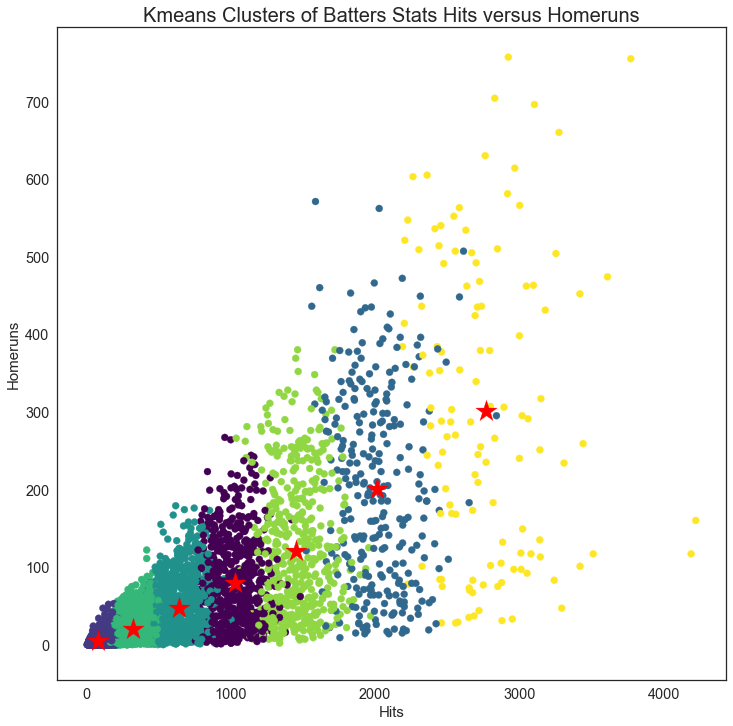

In [520]:
plt.figure(figsize=(12,12))
plt.tick_params(axis='both', which='both', direction='in', labelsize='x-large')
plt.scatter(batters['h'], batters['hr'],
                c=batters['kmeans_clusters'], marker=None, vmin=None, vmax=None,
                alpha=None, cmap='viridis')
plt.scatter(centroids['h'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Batters Stats Hits versus Homeruns', fontsize=20)
plt.xlabel('Hits', fontsize=15)
plt.ylabel('Homeruns', fontsize=15);

## HDBSCAN

In [521]:
hdb = HDBSCAN(min_cluster_size=6)
hdb.fit(batters)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=6, min_samples=None, p=None,
    prediction_data=False)

In [522]:
# investigate clusters to see how they are made up
pd.Series(hdb.labels_).value_counts().sort_index()

-1     4225
 0        6
 1       25
 2       16
 3       13
 4        6
 5       14
 6        7
 7        6
 8       16
 9       20
 10      11
 11       6
 12      18
 13       7
 14       6
 15       8
 16       9
 17      16
 18       9
 19       9
 20       6
 21       6
 22       7
 23      12
 24    2037
dtype: int64

In [523]:
batters['hdb_clusters'] = hdb.labels_

In [524]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batters,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [525]:
show_cluster_results(2, 'hdb_clusters')

g    ab    r     h   2b  3b   hr    rbi    sb    cs  \
playerid                                                            
seguida01  1348  4525  642  1313  269  15  129  637.0  16.0  15.0   
scutama01  1311  4765  670  1330  265  20   74  497.0  53.0  21.0   
jonesja04  1260  4478  617  1255  253  18  164  623.0  82.0  44.0   
mcdougi01  1336  4676  697  1291  187  51  112  576.0  45.0  44.0   
francti01  1480  4708  609  1285  208  33  119  591.0  45.0  19.0   
johnsda02  1346  4611  540  1211  235  17  132  587.0  30.0  25.0   
knighra01  1291  4568  461  1246  253  26   81  570.0  13.0  24.0   
lopezhe01  1450  4644  623  1251  193  37  136  591.0  16.0  23.0   
northji01  1358  4619  597  1236  216  42  150  599.0  38.0  38.0   
jacobbr01  1296  4502  535  1218  204  24  120  544.0  16.0  25.0   
wiggity01  1315  4422  549  1161  243  14  169  591.0  42.0  22.0   
rosebjo01  1504  4692  499  1176  184  44  101  536.0  66.0  55.0   
bellda01   1376  4735  576  1211  258  18  123  581.0  19.0  20.0   
spencji01  1480  4690  523  1184  172  25  142  579.0  11.0  19.0   
drewst01   1222  4308  556  1085  251  63  122  507.0  41.0  19.0   

               ...        gidp   1b  years  period   bavg    obp    ops  \
playerid       ...                                                        
seguida01      ...       125.0  900     14   5.714  0.286  0.352  0.780   
scutama01      ...       114.0  971     11   6.818  0.282  0.342  0.735   
jonesja04      ...       113.0  820      9   6.222  0.281  0.329  0.782   
mcdougi01      ...        93.0  941     10   3.000  0.276  0.356  0.767   
francti01      ...        94.0  925     13   3.615  0.266  0.335  0.729   
johnsda02      ...       120.0  827     10   4.100  0.265  0.345  0.758   
knighra01      ...       163.0  886     10   5.000  0.265  0.313  0.692   
lopezhe01      ...       136.0  885     13   3.462  0.265  0.325  0.738   
northji01      ...       125.0  828     11   4.000  0.265  0.330  0.751   
jacobbr01      ...       137.0  870     10   5.000  0.264  0.326  0.715   
wiggity01      ...       127.0  735     13   6.615  0.264  0.326  0.769   
rosebjo01      ...        75.0  847     12   3.750  0.250  0.327  0.701   
bellda01       ...       120.0  812     13   6.154  0.249  0.310  0.690   
spencji01      ...       116.0  845     14   4.429  0.244  0.299  0.681   
drewst01       ...        46.0  649     13   7.000  0.240  0.310  0.718   

             slg  kmeans_clusters  hdb_clusters  
playerid                                         
seguida01  0.428                5             2  
scutama01  0.393                5             2  
jonesja04  0.453                0             2  
mcdougi01  0.411                5             2  
francti01  0.394                5             2  
johnsda02  0.413                5             2  
knighra01  0.379                0             2  
lopezhe01  0.414                5             2  
northji01  0.421                5             2  
jacobbr01  0.389                0             2  
wiggity01  0.443                0             2  
rosebjo01  0.373                5             2  
bellda01   0.380                5             2  
spencji01  0.382                5             2  
drewst01   0.409                0             2  

[15 rows x 26 columns]

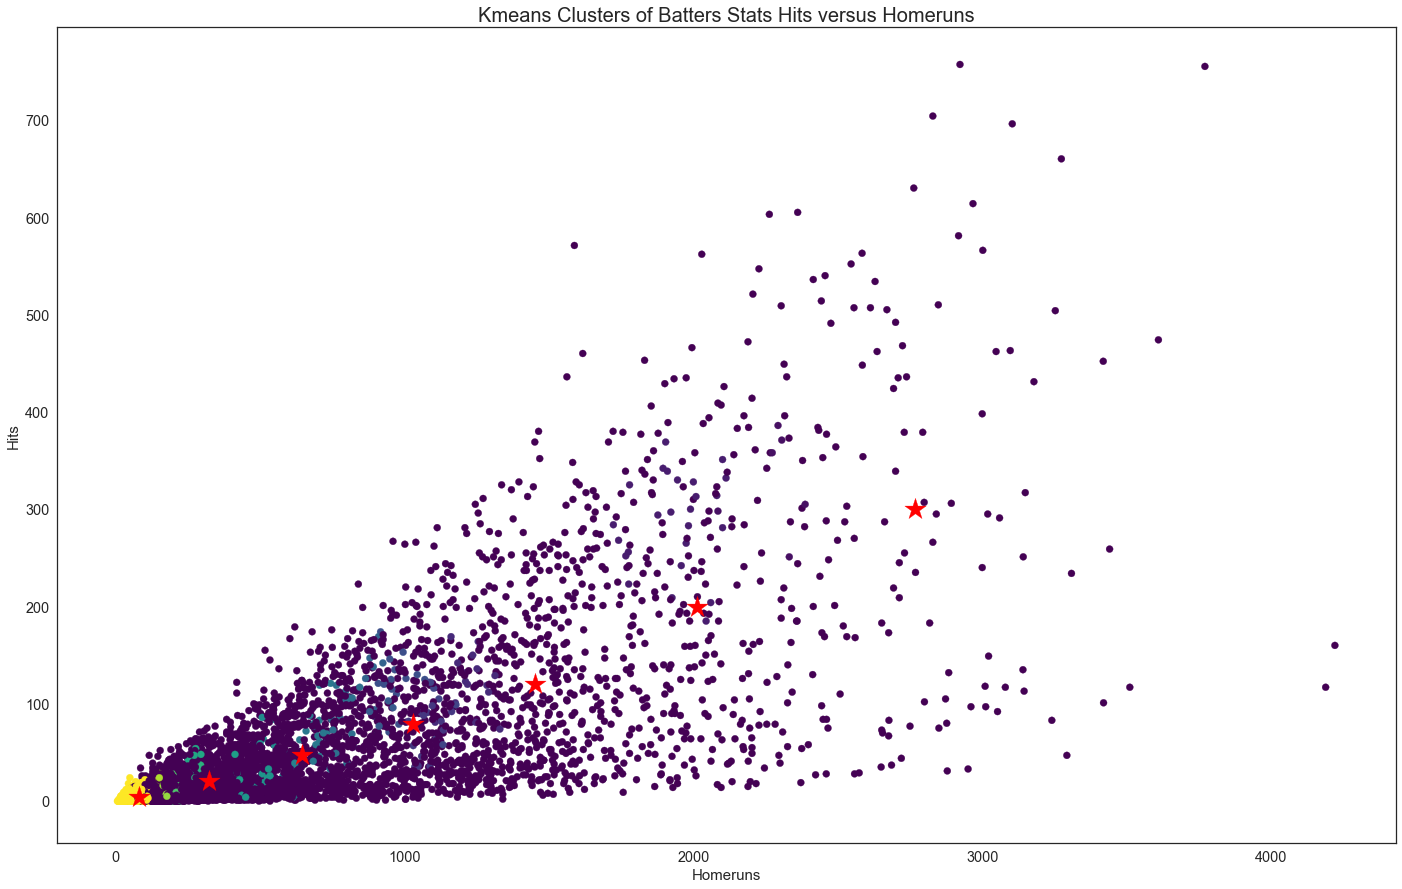

In [526]:

plt.figure(figsize=(24,15))
plt.tick_params(axis='both', which='both', direction='in', labelsize='x-large')
plt.scatter(batters['h'], batters['hr'],
           c=batters['hdb_clusters'], cmap='viridis')

plt.scatter(centroids['h'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Batters Stats Hits versus Homeruns', fontsize=20)
plt.xlabel('Homeruns', fontsize=15)
plt.ylabel('Hits', fontsize=15)

plt.show()

# Model the Data

In [527]:
# Define my x and y
# we will test one cluster at a time
features = [each for each in batters.columns if each not in ['kmeans_clusters','hdb_clusters']]
X = batters[features]
y = batters['kmeans_clusters']

In [528]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [529]:
X_train.head()

g    ab     r     h   2b   3b   hr     rbi     sb    cs  ...    \
playerid                                                               ...     
desauge01   641  1878   196   444   70   11    3   180.0   12.0   6.0  ...     
stevech01   207   719    87   182   29    8    4    53.0    6.0   8.0  ...     
brownsa01   141   439    29    88   12    1    0    34.0    4.0   0.0  ...     
manushe01  1966  7578  1276  2508  487  158  110  1172.0  113.0  58.0  ...     
kendafr01   824  2476   163   584   85   11   31   237.0    5.0   5.0  ...     

              sh    sf  gidp    1b  years  period   bavg    obp    ops    slg  
playerid                                                                       
desauge01   56.0   0.0  20.0   360      9   2.333  0.229  0.303  0.583  0.280  
stevech01   22.0   0.0  14.0   141      2   3.000  0.254  0.339  0.673  0.334  
brownsa01   15.0   0.0   0.0    75      2   1.000  0.200  0.256  0.488  0.231  
manushe01  186.0   0.0   7.0  1753     16   2.000  0.328  0.376  0.851  0.476  
kendafr01   27.0  23.0  81.0   457      8   4.250  0.220  0.274  0.567  0.293  

[5 rows x 24 columns]

In [530]:
y_train.head()

playerid
desauge01    4
stevech01    1
brownsa01    1
manushe01    2
kendafr01    3
Name: kmeans_clusters, dtype: int32

In [531]:
pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

params = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__criterion': ['gini', 'entropy'],
    'rf__verbose': [2],
    'rf__n_jobs': [-1],
    'rf__random_state': [42]
}
gs_rf = GridSearchCV(pipe_rf, params, n_jobs=-1, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)
gs_rf.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100building tree 39 of 100

building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s


building tree 70 of 100

building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100building tree 97 of 100

building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


0.9897750511247444

In [532]:
gs_rf.best_params_

{'rf__criterion': 'entropy',
 'rf__n_estimators': 100,
 'rf__n_jobs': -1,
 'rf__random_state': 42,
 'rf__verbose': 2}

In [533]:
gs_rf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9914163090128756

In [534]:
y_preds_gs_rf = gs_rf.predict(X_test)

confusion_matrix(y_test, y_preds_gs_rf)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[142,   0,   0,   1,   0,   0,   0],
       [  0, 750,   0,   0,   0,   0,   0],
       [  0,   0,  68,   0,   0,   0,   0],
       [  0,   0,   0, 203,   1,   0,   0],
       [  0,   4,   0,   4, 319,   0,   0],
       [  1,   0,   0,   0,   0, 105,   0],
       [  0,   0,   3,   0,   0,   0,  30]], dtype=int64)

## Teams by Years

## Batting team year

## PCA first

In [535]:
batting.columns

Index(['playerid', 'year', 'teamid', 'lgid', 'g', 'ab', 'r', 'h', '2b', '3b',
       'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'gidp',
       'period', 'bavg', 'obp', '1b', 'slg', 'ops'],
      dtype='object')

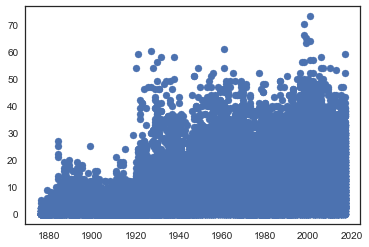

In [536]:
plt.scatter(batting['year'], batting['hr'])

## Now  KMeans Clustering

In [537]:
batting.columns

Index(['playerid', 'year', 'teamid', 'lgid', 'g', 'ab', 'r', 'h', '2b', '3b',
       'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'gidp',
       'period', 'bavg', 'obp', '1b', 'slg', 'ops'],
      dtype='object')

In [538]:
features = [each for each in batting.columns if each not in ['lgid', 'playerid', 'teamid']]
batting_new = batting[features]

In [539]:
batting_new

year    g   ab    r    h  2b  3b  hr    rbi    sb  ...     hbp    sh  \
8110    1901  138  576   90  190  46   7   8   99.0  35.0  ...     3.0   4.0   
8113    1901  135  542  110  159  16   9   4   65.0  26.0  ...     5.0   7.0   
8118    1901  135  539   78  156  26   8   6   79.0   7.0  ...     1.0   4.0   
8122    1901   32  107    8   20   4   2   0    8.0   0.0  ...     0.0   3.0   
8127    1901  133  516   95  151  28  13   1   55.0  15.0  ...     8.0   1.0   
8132    1901   86  295   40   79   9   9   1   32.0  10.0  ...     1.0   4.0   
8133    1901   83  306   41   95   6   6   2   41.0   9.0  ...     8.0  11.0   
8138    1901   70  231   28   52   5   5   2   29.0   2.0  ...     3.0  12.0   
8140    1901   64  233   24   48   8   0   0   26.0   6.0  ...     2.0   6.0   
8141    1901   42  148   20   39   5   0   0   21.0  11.0  ...     2.0   8.0   
8145    1901   45  118   15   39   7   3   1   19.0  10.0  ...     0.0   4.0   
8148    1901   42  126    8   20   3   1   0    7.0   0.0  ...     2.0   3.0   
8152    1901  128  540  105  153  16   9   2   46.0  34.0  ...    10.0  12.0   
8159    1901  110  422   58  118  15   5   3   54.0   7.0  ...    12.0   8.0   
8161    1901  137  480   66  116  10   7   2   55.0  10.0  ...     4.0  11.0   
8162    1901  138  564  108  187  42  16   6   94.0  19.0  ...     5.0  12.0   
8164    1901   38  102   10   28   3   1   1    9.0   4.0  ...     1.0   3.0   
8165    1901   37  121   13   17   3   1   0    6.0   2.0  ...     2.0   3.0   
8166    1901  131  503   74  129  20   6   5   64.0  21.0  ...     8.0  13.0   
8169    1901  137  506   75  139  17  13   6   68.0  16.0  ...     6.0  11.0   
8171    1901   76  268   26   62   6   3   0   24.0   7.0  ...     3.0   6.0   
8173    1901   28  102   10   29   2   2   0   14.0   1.0  ...     2.0   3.0   
8178    1901  100  424   82  139  28  12   2   73.0  23.0  ...     1.0   6.0   
8185    1901  117  496   92  152  28  10   8   76.0  21.0  ...     2.0   4.0   
8194    1901   74  281   40   81  14   6   1   42.0  14.0  ...     0.0   8.0   
8202    1901   98  338   50   73  21   2   1   38.0   3.0  ...     5.0   6.0   
8204    1901   37  107   10   34   5   4   0   16.0   4.0  ...     2.0   1.0   
8206    1901  121  476  107  162  23  13   5   67.0  33.0  ...     2.0   8.0   
8211    1901  138  594  104  159  18   7   3   52.0  33.0  ...     3.0   7.0   
8215    1901   79  285   40   86  15   9   2   45.0  12.0  ...     1.0  12.0   
...      ...  ...  ...  ...  ...  ..  ..  ..    ...   ...  ...     ...   ...   
104150  2017   81  276   38   78  13   0  19   50.0   0.0  ...    13.0   1.0   
104151  2017  144  488   59  113  23   2   6   51.0   3.0  ...     0.0   0.0   
104157  2017  104  176   26   40  11   2   3   15.0   0.0  ...     4.0   2.0   
104161  2017   70  160   27   46  12   2   2   16.0   5.0  ...     2.0   1.0   
104164  2017  140  514   85  148  34   5  21   72.0  17.0  ...     3.0   0.0   
104165  2017  118  399   55  108  23   3  19   53.0  17.0  ...     1.0   1.0   
104169  2017   48  104   13   25   5   3   0    9.0   0.0  ...     3.0   0.0   
104173  2017  138  469   83  116  26   4  31   63.0   4.0  ...     7.0   0.0   
104180  2017   47  166   19   40  11   1   8   32.0   0.0  ...     0.0   0.0   
104182  2017  104  194   32   50   4   2   1   11.0   9.0  ...     0.0   2.0   
104186  2017   56  123    7   20   3   1   0    7.0   0.0  ...     1.0   3.0   
104201  2017  130  457   72  147  32   0  21   71.0   7.0  ...    19.0   1.0   
104203  2017   98  412   75  117  24   6  11   45.0  46.0  ...     4.0   0.0   
104211  2017  127  309   43   73  20   4   8   34.0   6.0  ...     9.0   1.0   
104212  2017  110  182   28   47  11   0  13   40.0   0.0  ...     0.0   5.0   
104234  2017  122  403   49   97  18   1  11   40.0  23.0  ...     0.0   2.0   
104240  2017   45  122   13   31   7   0   8   20.0   0.0  ...     0.0   1.0   
104241  2017   62  114   18   28   9   0   4   18.0   0.0  ...     3.0   0.0   
104244  

In [540]:
# Fitting batting team data on KMeans
# batting_team_year_cluster = batting_team_year[batting_team_year.columns]
km = KMeans(n_clusters=7,
           random_state=42)
km.fit(batting_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [541]:
centroids = pd.DataFrame(km.cluster_centers_, columns = batting_new.columns)

In [542]:
#looking at labels
km.labels_

array([0, 0, 0, ..., 4, 6, 2])

In [543]:
#Saving labels to a pandas seriers
pd.Series(km.labels_).value_counts()

3    8005
1    6523
5    5540
2    5356
4    4141
6    3987
0    3469
dtype: int64

In [544]:
#saving labels to clustering data frame
batting_new['kmeans_clusters'] = km.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [545]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batting_new,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [546]:
show_cluster_results(6, 'kmeans_clusters')[batting_new.columns]

year    g   ab    r    h  2b  3b  hr    rbi    sb       ...         \
57484  1980  117  449   87  175  33   9  24  118.0  15.0       ...          
79179  1999  127  438  108  166  26   4  37  115.0  11.0       ...          
18532  1920  142  457  158  172  36   9  54  137.0  14.0       ...          
82095  2002  143  403  117  149  31   2  46  110.0   9.0       ...          
71034  1993  120  470   71  174  35   4  22   98.0   2.0       ...          
48319  1970  136  478   84  175  23   3  25  101.0   1.0       ...          
92272  2009  138  523   94  191  30   1  28   96.0   4.0       ...          
39072  1957  144  474  121  173  28   6  34   94.0  16.0       ...          
90738  2008  128  439   82  160  24   1  22   75.0   4.0       ...          
77878  1998  130  454  113  165  46   3  23   67.0  14.0       ...          
28276  1939  124  467  130  168  31  10  35  105.0   4.0       ...          
93354  2010  133  518   95  186  40   3  32  100.0   8.0       ...          
91098  2008  148  524  100  187  44   0  37  116.0   7.0       ...          
73592  1995  145  511  121  182  52   0  29  113.0   4.0       ...          
79285  2000  126  454   82  161  28   2  30  114.0   3.0       ...          

        sh   sf  gidp  period   bavg    obp   1b    slg    ops  \
57484  0.0  7.0  11.0       5  0.390  0.454  109  0.664  1.118   
79179  0.0  6.0  12.0       6  0.379  0.458   99  0.710  1.168   
18532  5.0  0.0   0.0       2  0.376  0.533   73  0.849  1.382   
82095  0.0  2.0   4.0       6  0.370  0.582   70  0.799  1.381   
71034  0.0  6.0   9.0       5  0.370  0.403  113  0.602  1.005   
48319  0.0  3.0  19.0       4  0.366  0.454  124  0.584  1.037   
92272  0.0  5.0  13.0       7  0.365  0.444  132  0.587  1.031   
39072  0.0  3.0   5.0       3  0.365  0.512  105  0.665  1.177   
90738  0.0  4.0  13.0       7  0.364  0.470  113  0.574  1.044   
77878  0.0  2.0  11.0       6  0.363  0.445   93  0.630  1.075   
28276  5.0  0.0  17.0       2  0.360  0.464   92  0.694  1.158   
93354  1.0  4.0  11.0       7  0.359  0.411  111  0.633  1.044   
91098  0.0  8.0  16.0       7  0.357  0.462  106  0.653  1.114   
73592  0.0  4.0  11.0       6  0.356  0.479  101  0.628  1.107   
79285  0.0  9.0  21.0       6  0.355  0.416  101  0.623  1.039   

       kmeans_clusters  
57484                6  
79179                6  
18532                6  
82095                6  
71034                6  
48319                6  
92272                6  
39072                6  
90738                6  
77878                6  
28276                6  
93354                6  
91098                6  
73592                6  
79285                6  

[15 rows x 25 columns]

In [547]:
# sse = {}
# for k in range(1, 15):
#     kmeans = KMeans(n_clusters=k, max_iter=1000000).fit(batters)
#     batters["clusters"] = kmeans.labels_
#     #print(batters["clusters"])
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure(figsize=(10,10))
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.title('KMeans Elbow', fontsize=15)
# plt.xlabel("Number of cluster", fontsize=13)
# plt.ylabel("Sum of Squared Errors", fontsize=13)
# plt.show()

In [548]:
# ks = range(2,16)
# sil = []

# for n_cluster in range(2, 16):
#     kmeans = KMeans(n_clusters=n_cluster).fit(batters)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(batters, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
#     sil.append(sil_coeff)

In [549]:
# plt.plot(ks, sil, '-o')
# plt.title('Silhouette Score');

In [550]:
# # Call k-means to cluster the stats
# kmeans = KMeans(n_clusters=7, random_state=42)
# model = kmeans.fit(batting_team)
# centroids = pd.DataFrame(model.cluster_centers_, columns = batting_year.columns)

In [551]:
batting_new.columns

Index(['year', 'g', 'ab', 'r', 'h', '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb',
       'so', 'ibb', 'hbp', 'sh', 'sf', 'gidp', 'period', 'bavg', 'obp', '1b',
       'slg', 'ops', 'kmeans_clusters'],
      dtype='object')

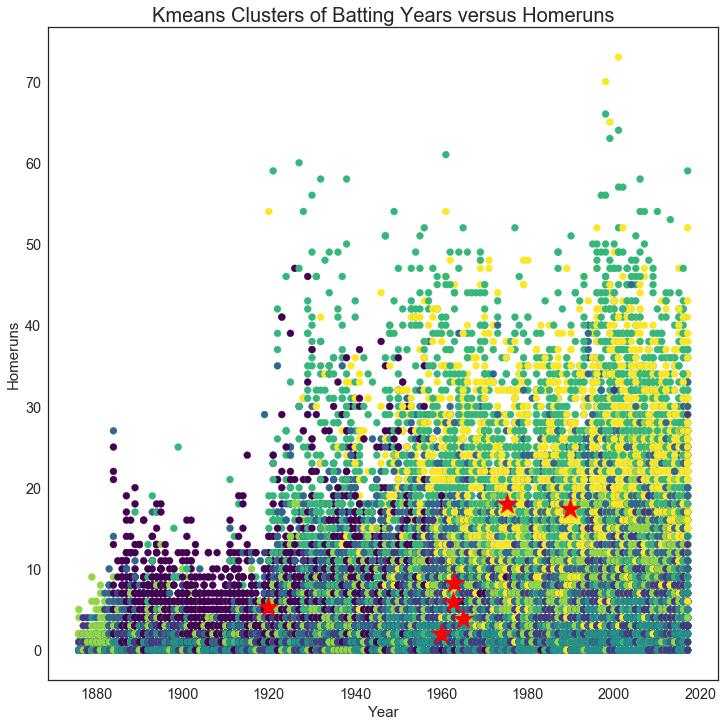

In [552]:
plt.figure(figsize=(12,12))
plt.tick_params(axis='both', which='both', direction='in', labelsize='x-large')
plt.scatter(batting_new['year'], batting_new['hr'],
                c=batting_new['kmeans_clusters'], marker=None, vmin=None, vmax=None,
                alpha=None, cmap='viridis')
plt.scatter(centroids['year'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Batting Years versus Homeruns', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Homeruns', fontsize=15);

## HDBSCAN

In [553]:
hdb = HDBSCAN(min_cluster_size=6)
hdb.fit(batting_new)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=6, min_samples=None, p=None,
    prediction_data=False)

In [554]:
# investigate clusters to see how they are made up
pd.Series(hdb.labels_).value_counts().sort_index()

-1     4901
 0       10
 1    32110
dtype: int64

In [555]:
batting_new['hdb_clusters'] = hdb.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [556]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=batting_new,
                        by='bavg',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [557]:
show_cluster_results(1, 'hdb_clusters')

year   g   ab   r    h  2b  3b  hr   rbi    sb      ...        sf  \
38956  1957  41  134  26   54  12   0   7  27.0   1.0      ...       0.0   
28517  1939  92  233  38   93  15   3   5  53.0   1.0      ...       0.0   
91118  2008  53  187  36   74  14   0  17  53.0   2.0      ...       4.0   
23495  1930  45  101  26   40   6   2   4  25.0   1.0      ...       0.0   
78262  1999  63  109  27   43   7   1   1  15.0   2.0      ...       0.0   
18123  1919  35  131  15   51   7   7   0  21.0   7.0      ...       0.0   
56701  1979  36  113  21   44   4   1  11  32.0   0.0      ...       0.0   
22004  1927  42  142  13   55  10   1   3  34.0   0.0      ...       0.0   
955    1877  59  266  51  103  14  11   2  49.0   0.0      ...       0.0   
6646   1895  59  210  51   81   8   6   2  43.0  14.0      ...       0.0   
90832  2008  43  156  30   60   8   2   4  21.0   4.0      ...       1.0   
7857   1899  41  120  17   46   6   4   0  25.0   7.0      ...       0.0   
28226  1939  63  105  10   40   5   0   1  17.0   0.0      ...       0.0   
876    1877  60  251  43   95  10   5   0  27.0   0.0      ...       0.0   
19130  1921  87  175  22   66   8   1   1  18.0   4.0      ...       0.0   

       gidp  period   bavg    obp  1b    slg    ops  kmeans_clusters  \
38956   1.0       3  0.403  0.477  35  0.649  1.126                3   
28517  11.0       2  0.399  0.444  70  0.554  0.998                1   
91118   5.0       7  0.396  0.489  43  0.743  1.232                1   
23495   0.0       2  0.396  0.504  28  0.614  1.118                3   
78262   3.0       6  0.394  0.463  34  0.505  0.968                3   
18123   0.0       1  0.389  0.420  37  0.550  0.970                3   
56701   1.0       5  0.389  0.452  28  0.735  1.187                3   
22004   0.0       2  0.387  0.442  41  0.535  0.978                3   
955     0.0       0  0.387  0.405  76  0.545  0.950                5   
6646    0.0       0  0.386  0.453  65  0.510  0.963                1   
90832   0.0       7  0.385  0.426  46  0.538  0.964                3   
7857    0.0       0  0.383  0.417  36  0.500  0.917                3   
28226   2.0       2  0.381  0.398  34  0.457  0.855                3   
876     0.0       0  0.378  0.386  80  0.458  0.844                1   
19130   0.0       2  0.377  0.414  56  0.451  0.865                1   

       hdb_clusters  
38956             1  
28517             1  
91118             1  
23495             1  
78262             1  
18123             1  
56701             1  
22004             1  
955               1  
6646              1  
90832             1  
7857              1  
28226             1  
876               1  
19130             1  

[15 rows x 26 columns]

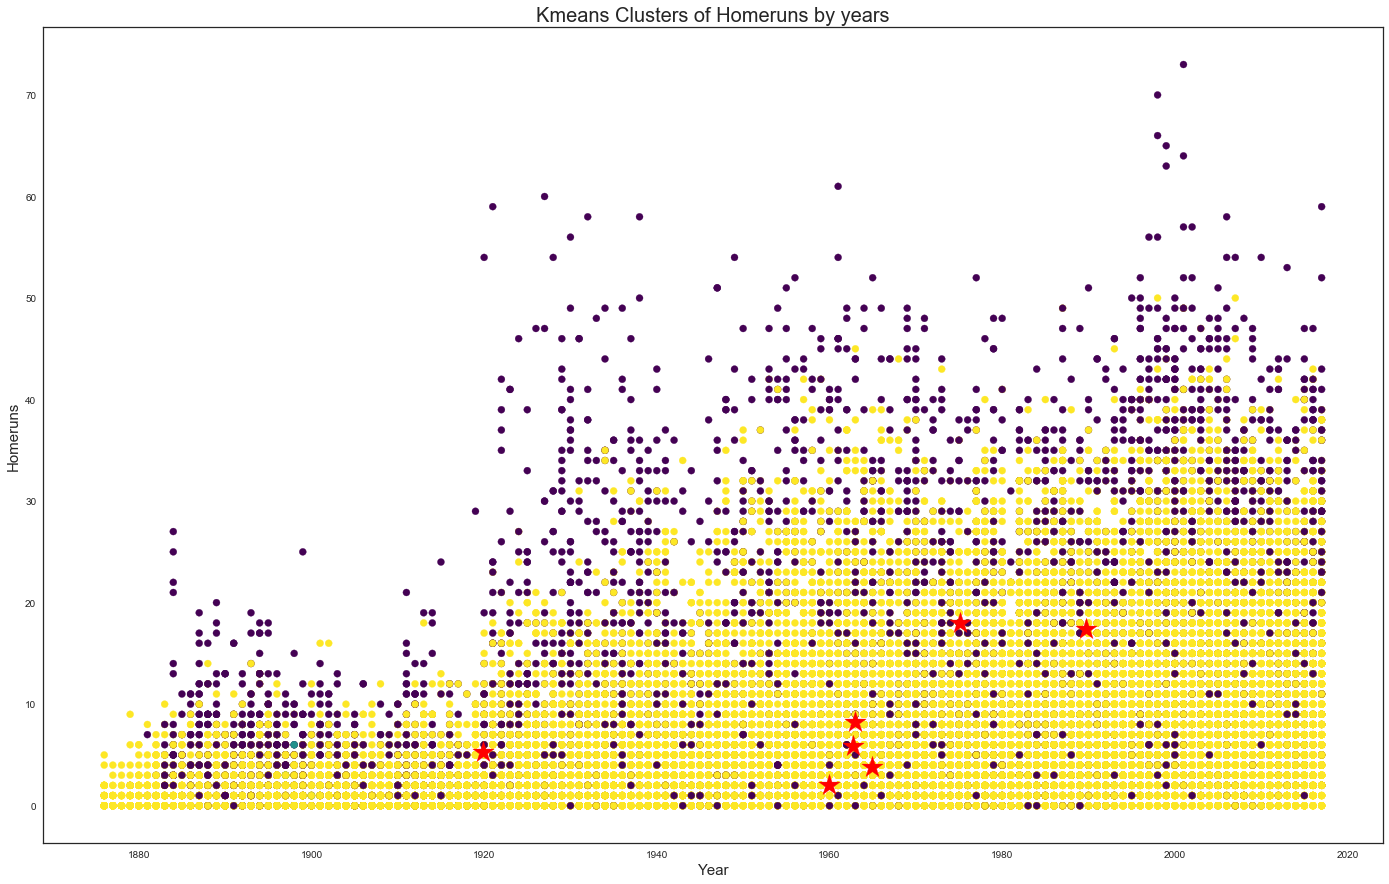

In [558]:

plt.figure(figsize=(24,15))
plt.scatter(batting_new['year'], batting_new['hr'],
           c=batting_new['hdb_clusters'], cmap='viridis')

plt.scatter(centroids['year'], centroids['hr'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Homeruns by years', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Homeruns', fontsize=15)

plt.show()

# Model the Data

In [559]:
# Define my x and y
# we will test one cluster at a time
features = [each for each in batting_new.columns if each not in ['kmeans_clusters','hdb_clusters']]
X = batting_new[features]
y = batting_new['kmeans_clusters']

In [560]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [561]:
X_train.head()

year    g   ab   r    h  2b  3b  hr   rbi    sb  ...    hbp    sh  \
53392   1975  151  507  47  124  20   6  13  60.0   1.0  ...    0.0   8.0   
54137   1976  105  269  40   76  15   3   0  27.0  11.0  ...    0.0   7.0   
13375   1912   82  231  24   45   5   3   1  40.0  11.0  ...    0.0  12.0   
43574   1964   59  103  11   27   3   1   1  14.0   0.0  ...    1.0   0.0   
104114  2017  148  523  78  125  21   2  30  78.0  16.0  ...    7.0   2.0   

         sf  gidp  period   bavg    obp  1b    slg    ops  
53392   1.0   8.0       4  0.245  0.286  85  0.385  0.671  
54137   3.0   4.0       4  0.283  0.359  58  0.361  0.720  
13375   0.0   0.0       1  0.195  0.259  36  0.255  0.514  
43574   0.0   2.0       4  0.262  0.315  22  0.340  0.655  
104114  1.0   9.0       7  0.239  0.351  72  0.459  0.810  

[5 rows x 24 columns]

In [562]:
y_train.head()

53392     6
54137     5
13375     1
43574     3
104114    6
Name: kmeans_clusters, dtype: int32

In [563]:
pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

params = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__criterion': ['gini', 'entropy'],
    'rf__verbose': [2],
    'rf__n_jobs': [-1],
    'rf__random_state': [42]
}
gs_rf = GridSearchCV(pipe_rf, params, n_jobs=-1, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)
gs_rf.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.7min finished


building tree 1 of 1000building tree 2 of 1000building tree 3 of 1000building tree 4 of 1000



building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.0s



building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.0s


building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000building tree 192 of 1000

building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   11.8s


building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   22.1s


building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000building tree 676 of 1000

building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tre

building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   36.6s finished


0.9711867459031154

In [564]:
gs_rf.best_params_

{'rf__criterion': 'entropy',
 'rf__n_estimators': 1000,
 'rf__n_jobs': -1,
 'rf__random_state': 42,
 'rf__verbose': 2}

In [565]:
gs_rf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished


0.976447709593777

In [566]:
y_preds_gs_rf = gs_rf.predict(X_test)

confusion_matrix(y_test, y_preds_gs_rf)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished


array([[ 809,    0,    7,    0,   14,    0,   12],
       [   0, 1593,    0,   21,    0,   12,    0],
       [   9,    0, 1275,    0,    0,    7,   16],
       [   0,    9,    0, 1998,    0,    0,    0],
       [  21,    0,    0,    0, 1013,    0,   22],
       [   0,   21,    9,    0,    0, 1380,    0],
       [   8,    0,   20,    0,   10,    0,  970]], dtype=int64)

In [567]:
# pipe_lr = Pipeline([
#     ('ss', StandardScaler()),
#     ('lr', LogisticRegressionCV())
# ])

# params = {
#     'lr__Cs': [1, 10],
#     'lr__cv': [3,5,7],
#     'lr__penalty': ['l2'],
#     'lr__max_iter': [10,100,1000],
#     'lr__verbose': [2],
#     'lr__n_jobs': [2],
#     'lr__random_state': [42]
# }
# gs_lr = GridSearchCV(pipe_lr, params, n_jobs=-1, cv=5, verbose=2)
# gs_lr.fit(X_train, y_train)
# gs_lr.best_score_

In [568]:
# gs_lr.best_params_

In [569]:
# gs_lr.score(X_test, y_test)

In [570]:
# y_preds_gs_lr = gs_lr.predict(X_test)

# confusion_matrix(y_test, y_preds_gs_lr)

## Pitching year

## PCA first

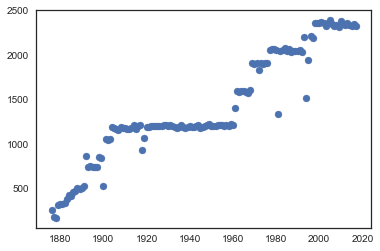

In [571]:
plt.scatter(pitching_year.index, pitching_year['w'])

## Now  KMeans Clustering

In [572]:
pitching_year.columns

Index(['w', 'l', 'g', 'gs', 'cg', 'sho', 'sv', 'ipouts', 'h', 'er', 'hr', 'bb',
       'so', 'baopp', 'ibb', 'wp', 'hbp', 'bk', 'bfp', 'gf', 'r', 'sh', 'sf',
       'gidp', 'est_pc', 'period', 'era', 'whip'],
      dtype='object')

In [573]:
# Fitting pitching year data on KMeans
km = KMeans(n_clusters=7,
           random_state=42)
km.fit(pitching_year)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [574]:
centroids = pd.DataFrame(km.cluster_centers_, columns = pitching_year.columns)

In [575]:
#looking at labels
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 6, 6,
       0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [576]:
#Saving labels to a pandas seriers
pd.Series(km.labels_).value_counts()

0    36
1    24
3    23
6    21
2    17
4    12
5     9
dtype: int64

In [577]:
#saving labels to clustering data frame
pitching_year['kmeans_clusters'] = km.labels_

In [578]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=pitching_year,
                        by='era',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [579]:
show_cluster_results(6, 'kmeans_clusters')[pitching_year.columns]

w     l     g    gs    cg  sho   sv  ipouts      h     er  \
year                                                                 
1936  1204  1159  4468  2381  1057  118  230   63285  23573  10352   
1950  1201  1179  4938  2395   973  134  285   63307  21531  10112   
1937  1188  1183  4445  2399  1081  133  208   63103  22740   9886   
1953  1214  1196  5343  2417   852  155  340   64233  21715   9705   
1938  1174  1150  4345  2366  1068  124  202   62353  22201   9723   
1949  1215  1191  5055  2428   970  170  240   64453  21464   9669   
1948  1209  1196  5261  2431   890  141  308   64043  21540   9628   
1940  1196  1183  4612  2401  1075  136  232   63722  22022   9536   
1954  1210  1197  5334  2421   830  163  344   64519  21217   9210   
1955  1212  1185  5616  2401   743  157  353   63850  20721   9248   
1951  1199  1165  4963  2367   922  163  269   63735  21016   9279   
1947  1203  1190  5025  2402   940  174  287   63922  21099   9039   
1956  1202  1165  5595  2367   742  125  361   63512  20603   9142   
1959  1217  1173  5563  2397   737  157  373   63814  20570   8981   
1941  1183  1171  4491  2374  1042  155  212   63250  21365   9038   

           ...           gf      r   sh   sf  gidp    est_pc  period    era  \
year       ...                                                                
1936       ...         1276  12035  0.0  0.0   0.0  238137.0       2  4.850   
1950       ...         1373  11396  0.0  0.0   0.0  262359.0       3  4.770   
1937       ...         1252  11490  0.0  0.0   0.0  243777.0       2  4.588   
1953       ...         1533  10944  0.0  0.0   0.0  255273.0       3  4.484   
1938       ...         1238  11289  0.0  0.0   0.0  237690.0       2  4.471   
1949       ...         1402  10959  0.0  0.0   0.0  260445.0       3  4.457   
1948       ...         1474  10857  0.0  0.0   0.0  255405.0       3  4.452   
1940       ...         1271  10959  0.0  0.0   0.0  240105.0       2  4.323   
1954       ...         1539  10413  0.0  0.0   0.0  257664.0       3  4.224   
1955       ...         1606  10460  0.0  0.0   0.0  260559.0       3  4.188   
1951       ...         1413  10504  0.0  0.0   0.0  248061.0       3  4.179   
1947       ...         1439  10298  0.0  0.0   0.0  249495.0       3  4.164   
1956       ...         1638  10385  0.0  0.0   0.0  264087.0       3  4.144   
1959       ...         1630  10183  0.0  0.0   0.0  265485.0       3  4.082   
1941       ...         1272  10503  0.0  0.0   0.0  240726.0       2  4.080   

       whip  kmeans_clusters  
year                          
1936  0.175                6  
1950  0.174                6  
1937  0.170                6  
1953  0.165                6  
1938  0.168                6  
1949  0.169                6  
1948  0.168                6  
1940  0.163                6  
1954  0.163                6  
1955  0.159                6  
1951  0.161                6  
1947  0.162                6  
1956  0.160                6  
1959  0.158                6  
1941  0.162                6  

[15 rows x 29 columns]

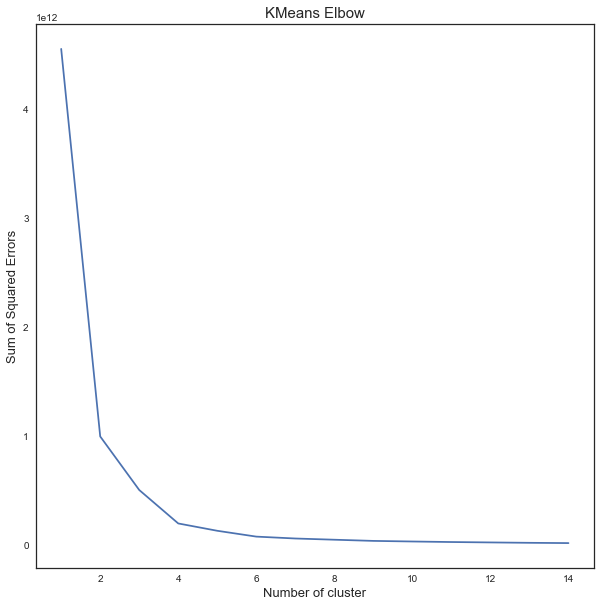

In [580]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pitching_year)
    pitching_year['kmeans_clusters'] = kmeans.labels_
    #print(batters["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(10,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('KMeans Elbow', fontsize=15)
plt.xlabel("Number of cluster", fontsize=13)
plt.ylabel("Sum of Squared Errors", fontsize=13)
plt.show()

In [581]:
ks = range(2,16)
sil = []

for n_cluster in range(2, 16):
    kmeans = KMeans(n_clusters=n_cluster).fit(pitching_year)
    label = kmeans.labels_
    sil_coeff = silhouette_score(pitching_year, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    sil.append(sil_coeff)

For n_clusters=2, The Silhouette Coefficient is 0.6952298510784938
For n_clusters=3, The Silhouette Coefficient is 0.6445219998038607
For n_clusters=4, The Silhouette Coefficient is 0.6997619248672631
For n_clusters=5, The Silhouette Coefficient is 0.7027238280272862
For n_clusters=6, The Silhouette Coefficient is 0.6844921457658035
For n_clusters=7, The Silhouette Coefficient is 0.6286078209681273
For n_clusters=8, The Silhouette Coefficient is 0.6294914842802837
For n_clusters=9, The Silhouette Coefficient is 0.5877682201286392
For n_clusters=10, The Silhouette Coefficient is 0.5497909062096484
For n_clusters=11, The Silhouette Coefficient is 0.5655896296302353
For n_clusters=12, The Silhouette Coefficient is 0.5525645555752297
For n_clusters=13, The Silhouette Coefficient is 0.5313546892454643
For n_clusters=14, The Silhouette Coefficient is 0.5368895287870885
For n_clusters=15, The Silhouette Coefficient is 0.541512237803847


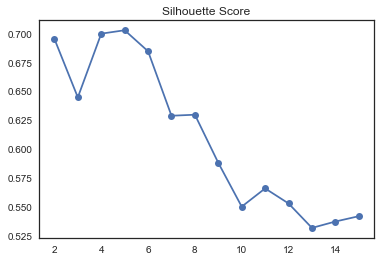

In [582]:
plt.plot(ks, sil, '-o')
plt.title('Silhouette Score');

In [583]:
pitching_year['year'] = pitching_year.index

In [584]:
# Call k-means to cluster the stats
kmeans = KMeans(n_clusters=7, random_state=42)
model = kmeans.fit(pitching_year)
centroids = pd.DataFrame(model.cluster_centers_, columns = pitching_year.columns)

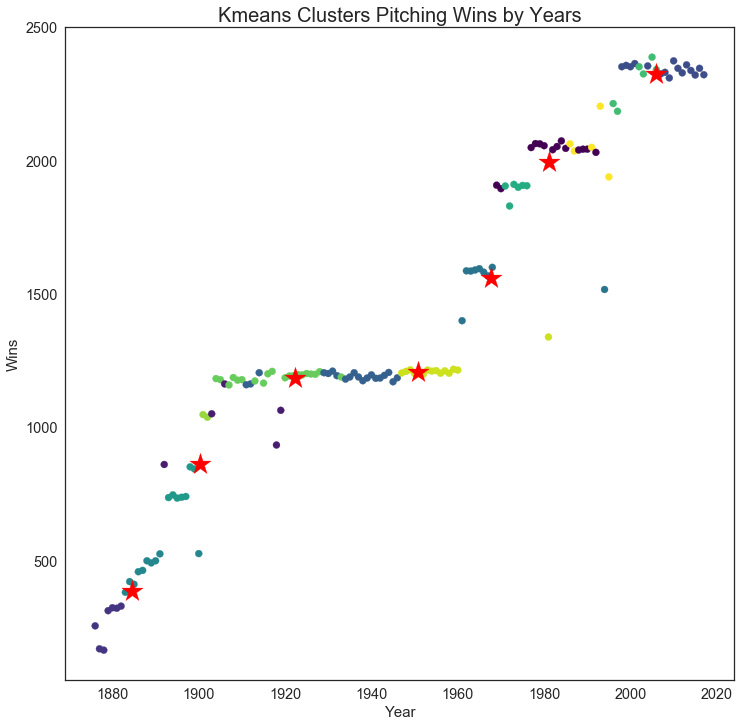

In [585]:
plt.figure(figsize=(12,12))
plt.tick_params(axis='both', which='both', direction='in', labelsize='x-large')
plt.scatter(pitching_year.index, pitching_year['w'],
                c=pitching_year['kmeans_clusters'], marker=None, vmin=None, vmax=None,
                alpha=None, cmap='viridis')
plt.scatter(centroids['year'], centroids['w'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters Pitching Wins by Years', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Wins', fontsize=15);

## HDBSCAN

In [586]:
hdb = HDBSCAN(min_cluster_size=6)
hdb.fit(pitching_year)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=6, min_samples=None, p=None,
    prediction_data=False)

In [587]:
# investigate clusters to see how they are made up
pd.Series(hdb.labels_).value_counts().sort_index()

-1     7
 0    23
 1     9
 2    23
 3    17
 4    56
 5     7
dtype: int64

In [588]:
pitching_year['hdb_clusters'] = hdb.labels_

In [589]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=pitching_year,
                        by='era',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [590]:
show_cluster_results(1, 'hdb_clusters')

w     l      g    gs    cg  sho   sv  ipouts      h     er  \
year                                                                  
1994  1516  1472  10020  2939   243   65  774   80237  27554  13027   
1962  1586  1558   7869  3148   830  165  608   84088  27428  12154   
1966  1581  1545   8151  3131   720  185  659   84508  26332  10953   
1964  1589  1550   7929  3145   786  214  663   84193  26460  10974   
1965  1594  1571   8265  3165   728  188  674   85141  26131  10938   
1963  1585  1555   7616  3134   857  232  581   84231  25901  10588   
1967  1567  1549   7991  3104   769  222  639   83928  25280  10144   
1972  1829  1789   8656  3612  1001  293  719   97088  29270  11553   
1968  1599  1577   7730  3201   896  278  591   85816  25059   9395   

          ...           sh     sf    gidp    est_pc  period    era   whip  \
year      ...                                                               
1994      ...       1124.0  905.0  2271.0  375900.0       6  4.673  0.165   
1962      ...          0.0    0.0     0.0  363480.0       4  4.115  0.156   
1966      ...          0.0    0.0     0.0  353454.0       4  3.829  0.148   
1964      ...          0.0    0.0     0.0  358020.0       4  3.725  0.147   
1965      ...          0.0    0.0     0.0  366549.0       4  3.701  0.146   
1963      ...          0.0    0.0     0.0  352758.0       4  3.697  0.146   
1967      ...          0.0    0.0     0.0  356859.0       4  3.482  0.142   
1972      ...       1692.0  832.0     0.0  406110.0       4  3.471  0.147   
1968      ...          0.0    0.0     0.0  353211.0       4  3.238  0.139   

      kmeans_clusters  year  hdb_clusters  
year                                       
1994                5  1994             1  
1962                5  1962             1  
1966                5  1966             1  
1964                5  1964             1  
1965                5  1965             1  
1963                5  1963             1  
1967                5  1967             1  
1972                8  1972             1  
1968                5  1968             1  

[9 rows x 31 columns]

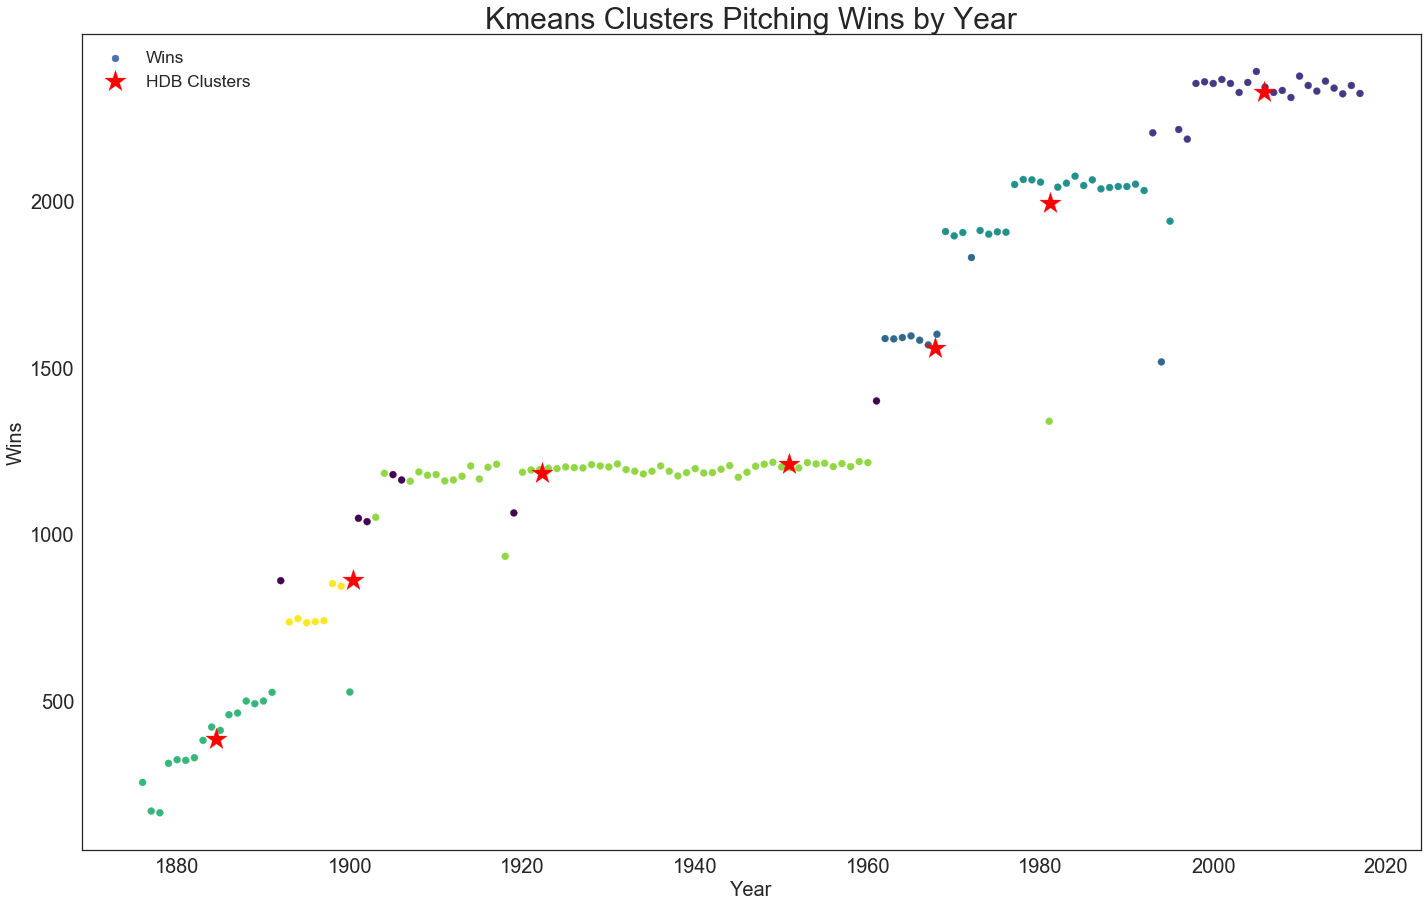

In [591]:

plt.figure(figsize=(24,15))
plt.scatter(pitching_year.index, pitching_year['w'],
           c=pitching_year['hdb_clusters'], cmap='viridis', label='Wins')

plt.scatter(centroids['year'], centroids['w'],
           c='red', marker='*', s=500, label='HDB Clusters')
plt.title('Kmeans Clusters Pitching Wins by Year', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Wins', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize='xx-large');

# Model the Data

In [592]:
# Define my x and y
# we will test one cluster at a time
features = [each for each in pitching_year.columns if each not in ['kmeans_clusters','hdb_clusters', 'w', 'year']]
X = pitching_year[features]
y = pitching_year['kmeans_clusters']

In [593]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [594]:
X_train.head()

l      g    gs    cg  sho    sv  ipouts      h     er    hr  ...    \
year                                                                  ...     
1986  2009  11295  4043   573  138   999  109206  35417  15884  3654  ...     
1918   926   2688  1889  1205  183   104   50627  15567   5073   214  ...     
1993  2157  14223  4308   368   99  1186  116337  39113  17824  3815  ...     
1962  1558   7869  3148   830  165   608   84088  27428  12154  2877  ...     
1971  1894   9325  3806  1072  263   681  101845  31742  13010  2782  ...     

           bfp    gf      r      sh      sf    gidp    est_pc  period    era  \
year                                                                           
1986  155085.0  3508  17693  1460.0  1130.0  3000.0  489330.0       5  4.173   
1918   69260.0   606   6629     0.0     0.0     0.0  158226.0       1  2.859   
1993  166682.0  4031  19702  1734.0  1361.0  3281.0  520344.0       5  4.406   
1962  120069.0  2279  13785     0.0     0.0     0.0  363480.0       4  4.115   
1971  143079.0  2702  14637  1746.0   960.0     0.0  427965.0       4  3.717   

       whip  
year         
1986  0.157  
1918  0.140  
1993  0.159  
1962  0.156  
1971  0.152  

[5 rows x 27 columns]

In [595]:
y_train.head()

year
1986    13
1918     1
1993    13
1962     5
1971     8
Name: kmeans_clusters, dtype: int32

In [596]:
pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

params = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__criterion': ['gini', 'entropy'],
    'rf__verbose': [2],
    'rf__n_jobs': [-1],
    'rf__random_state': [42]
}
gs_rf = GridSearchCV(pipe_rf, params, n_jobs=-1, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)
gs_rf.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.8s finished


building tree 1 of 1000building tree 2 of 1000building tree 3 of 1000building tree 4 of 1000



building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000building tree 9 of 1000

building tree 10 of 1000building tree 11 of 1000building tree 12 of 1000


building tree 13 of 1000building tree 14 of 1000

building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000building tree 20 of 1000building tree 21 of 1000


building tree 22 of 1000
building tree 23 of 1000building tree 24 of 1000

building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000building tree 35 of 1000

building tree 36 of 1000
building tree 37 of 1000building tree 38 of 1000

building tree 39 of 1000building tree 40 of 1000

building 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000building tree 130 of 1000

building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000building tree 134 of 1000

building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.2s


building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000building tree 212 of 1000building tree 213 of 1000


building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000building tree 218 of 1000

building tree 219 of 1000building tree 220 of 1000

building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000building tree 225 of 1000

building tree 226 of 1000building tree 227 of 1000

building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000

building tree 234 of 1000building tree 235 of 1000

building tree 236 of 1000building tree 237 of 1000

building tree 238 of 1000building tree 239 of 1000

building tree 240 of 1000building tree 241 of 1000building tree 242 of 1000


building tree 243 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.6s


building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000building tree 397 of 1000building tree 398 of 1000


building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000building tree 406 of 1000

building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    1.4s


building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000building tree 678 of 1000

building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000building tree 685 of 1000

building tree 686 of 1000building tree 687 of 1000building tree 688 of 1000


building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000building tree 693 of 1000building tree 694 of 1000


building tree 695 of 1000
building tree 696 of 1000building tree 697 of 1000building tree 698 of 1000


building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000
building tree 702 of 1000
building tree 703 of 1000
building tree 704 of 1000building tree 705 of 1000

building tree 706 of 1000
building tree 707 of 1000
building tree 708 of 1000building tree 709 of 1000

building tree 710 of 1000
building tree 711 of 1000
building tree 712 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.2s finished


0.9150943396226415

In [597]:
gs_rf.best_params_

{'rf__criterion': 'entropy',
 'rf__n_estimators': 1000,
 'rf__n_jobs': -1,
 'rf__random_state': 42,
 'rf__verbose': 2}

In [598]:
gs_rf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


0.9166666666666666

In [599]:
y_preds_gs_rf = gs_rf.predict(X_test)

confusion_matrix(y_test, y_preds_gs_rf)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


array([[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [600]:
# pipe_lr = Pipeline([
#     ('ss', StandardScaler()),
#     ('lr', LogisticRegressionCV())
# ])

# params = {
#     'lr__Cs': [1, 10],
#     'lr__cv': [3,5,7],
#     'lr__penalty': ['l2'],
#     'lr__max_iter': [10,100,1000],
#     'lr__verbose': [2],
#     'lr__n_jobs': [2],
#     'lr__random_state': [42]
# }
# gs_lr = GridSearchCV(pipe_lr, params, n_jobs=-1, cv=5, verbose=2)
# gs_lr.fit(X_train, y_train)
# gs_lr.best_score_

In [601]:
# gs_lr.best_params_

In [602]:
# gs_lr.score(X_test, y_test)

In [603]:
# y_preds_gs_lr = gs_lr.predict(X_test)

# confusion_matrix(y_test, y_preds_gs_lr)

## Pitching Year

## PCA first

### Pitching by years

In [710]:
pitching_year.columns

Index(['w', 'l', 'g', 'gs', 'cg', 'sho', 'sv', 'ipouts', 'h', 'er', 'hr', 'bb',
       'so', 'baopp', 'ibb', 'wp', 'hbp', 'bk', 'bfp', 'gf', 'r', 'sh', 'sf',
       'gidp', 'est_pc', 'period', 'era', 'whip', 'kmeans_clusters', 'year',
       'hdb_clusters'],
      dtype='object')

### Scale data for use with PCA

We already did this above

### Find Z scores

In [711]:
pitching_year_ss

w         l         g        gs        cg       sho        sv  \
0   -1.899895 -1.906185 -1.203515 -1.938177 -0.923017 -1.287931 -1.051001   
1   -2.041399 -2.016832 -1.232228 -2.067117 -1.234104 -1.700567 -1.069038   
2   -2.049626 -2.030244 -1.238080 -2.075600 -1.213962 -1.612145 -1.073547   
3   -1.806107 -1.805596 -1.182849 -1.836382 -0.623120 -1.317405 -1.071293   
4   -1.788007 -1.788832 -1.171510 -1.811781 -0.638786 -1.228983 -1.048746   
5   -1.791298 -1.797214 -1.180837 -1.827051 -0.614168 -1.214246 -1.075802   
6   -1.778135 -1.772067 -1.177180 -1.807540 -0.538075 -1.376353 -1.073547   
7   -1.692574 -1.693273 -1.151759 -1.717621 -0.385888 -1.420564 -1.055510   
8   -1.626758 -1.646332 -1.144626 -1.653999 -0.159846 -0.978454 -1.066783   
9   -1.643212 -1.637949 -1.149564 -1.670117 -0.157608 -0.978454 -1.069038   
10  -1.565878 -1.597714 -1.131093 -1.592074 -0.007660 -1.332142 -1.069038   
11  -1.557651 -1.584302 -1.128898 -1.578502  0.052767 -1.479512 -1.064529   
12  -1.498416 -1.480361 -1.112073 -1.498762  0.267619 -0.668977 -1.071293   
13  -1.511580 -1.537361 -1.108232 -1.534390  0.021435 -1.361616 -1.051001   
14  -1.498416 -1.534008 -1.109878 -1.534390  0.079624 -1.170035 -1.060019   
15  -1.455636 -1.483714 -1.089395 -1.486886  0.075148 -1.228983 -1.023944   
16  -0.904426 -0.903654 -0.952049 -0.896476  1.523158 -0.668977 -1.023944   
17  -1.108456 -1.136684 -0.994661 -1.136542  0.784605 -1.376353 -1.023944   
18  -1.092002 -1.143390 -0.985700 -1.124666  0.764463 -1.538460 -1.005907   
19  -1.111747 -1.123272 -0.986431 -1.122121  0.728654 -1.317405 -1.005907   
20  -1.106811 -1.128302 -0.991369 -1.118728  0.791320 -1.170035 -1.019435   
21  -1.101875 -1.129978 -0.988992 -1.102611  0.905459 -1.258457 -1.019435   
22  -0.919235 -0.932154 -0.950403 -0.907504  1.433636 -0.786873 -1.041982   
23  -0.932398 -0.955625 -0.956987 -0.938890  1.344115 -0.668977 -1.014926   
24  -1.453991 -1.435096 -1.070375 -1.446168  0.059481 -0.978454 -1.051001   
25  -0.596736 -0.625360 -0.872677 -0.604664  2.102809 -0.212130 -0.994633   
26  -0.613190 -0.692419 -0.890234 -0.638596  2.098333  0.274191 -1.005907   
27  -0.591800 -0.632066 -0.872311 -0.607209  2.060287  0.333139 -0.976596   
28  -0.374607 -0.390654 -0.822384 -0.349328  2.751840  1.615258 -0.992379   
29  -0.381189 -0.377242 -0.781601 -0.353570  2.319899  1.276307 -0.981105   
..        ...       ...       ...       ...       ...       ...       ...   
112  1.035502  1.062848  0.706348  1.045261 -0.576121  0.657353  1.275834   
113  1.040439  1.019260  0.803459  1.025751 -0.876018  0.229980  1.320928   
114  1.040439  0.984054  0.884111  0.992667 -0.990158  0.067873  1.411115   
115  1.051956  1.046084  0.995671  1.035082 -1.124440 -0.403711  1.460718   
116  1.020694  1.027642  1.018348  0.996060 -1.014776  0.141558  1.415624   
117  1.305348  1.310966  1.299991  1.292962 -1.115488 -0.506870  1.598254   
118  0.174957  0.162582  0.531327  0.131652 -1.395243 -1.007928  0.669324   
119  0.869317  0.841554  1.083090  0.828099 -1.328102 -0.683714  1.185647   
120  1.321802  1.305937  1.432399  1.316714 -1.296769 -0.742662  1.435917   
121  1.274086  1.257319  1.470988  1.247154 -1.352720 -0.668977  1.490029   
122  1.548868  1.555731  1.640522  1.560174 -1.272151 -0.506870  1.774119   
123  1.557095  1.562437  1.714407  1.566112 -1.413147 -1.022665  1.654621   
124  1.548868  1.545672  1.686243  1.546601 -1.426575 -0.948980  1.568943   
125  1.568613  1.530584  1.788109  1.539815 -1.500431 -0.890032  1.645602   
126  1.548868  1.512143  1.787561  1.522849 -1.466860 -0.698451  1.672658   
127  1.504442  1.451790  1.779697  1.446503 -1.491478 -0.948980  1.616291   
128  1.553804  1.512143  1.898572  1.507580 -1.610094 -0.963717  1.690696   
129  1.608102  1.600996  1.863092  1.627189 -1.518335 -1.037402  1.747063   
130  1.530768  1.465202  1.949413  1.451593 -1.623523 -1.081613  1.625310   
131  1.504442  1.486996  2.053109  1.470255 -1.692902 -1.361616  1.605018   
132  1.5

### Visualize correlation

In [336]:
# g = sns.PairGrid(batting_year_ss)
# g = g.map_lower(sns.regplot)
# g = g.map_upper(sns.kdeplot, cmap='Reds', shade=True, shade_lowest=False)
# g = g.map_diag(plt.hist)

# plt.show()

### Visualize using heatmap

Text(0.5,1,'Pitching Stats by Year Correlation')

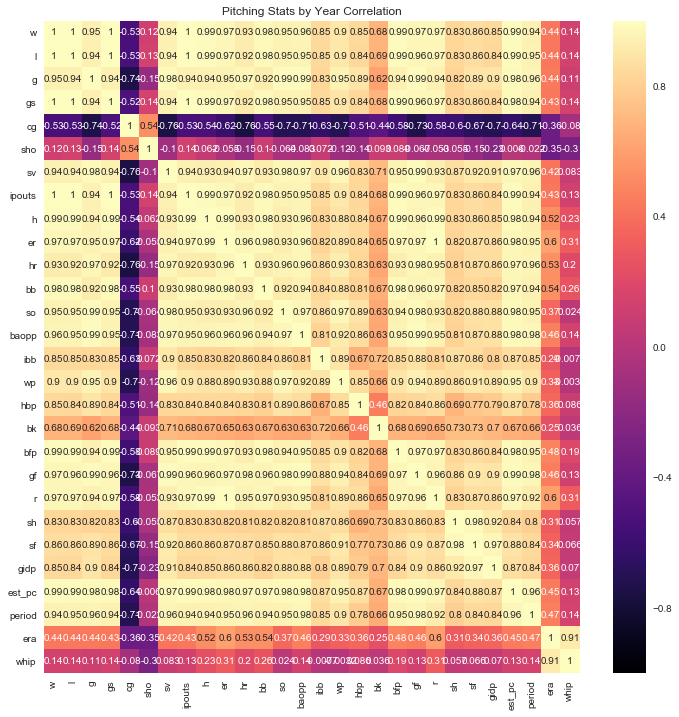

In [712]:
plt.figure(figsize=(12,12))
sns.heatmap(pitching_year_ss.corr(),
           vmin=-1,
           vmax=1,
           cmap='magma',
           annot=True)
plt.title('Pitching Stats by Year Correlation')

### PCA for pitching stats

In [713]:
pitching_year_pca = PCA(n_components=28)
pitching_year_pca.fit(pitching_year_ss.values)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Explained variance

In [714]:
for each in pitching_year_pca.components_:
    for each in list(zip(pitching_year_ss.columns, each)):
        print(each)
    print()

('w', 0.2068951568147732)
('l', 0.20663657719409945)
('g', 0.20720147680646608)
('gs', 0.20611858170893405)
('cg', -0.14308224179106302)
('sho', -0.010450947147037187)
('sv', 0.20828272907324755)
('ipouts', 0.20656075783288083)
('h', 0.20663805576682934)
('er', 0.20759289179569987)
('hr', 0.20548359670213132)
('bb', 0.2049911425160412)
('so', 0.20612123735840931)
('baopp', 0.20709360511025743)
('ibb', 0.18703268322284053)
('wp', 0.2007939197824903)
('hbp', 0.1815190262709235)
('bk', 0.1493745586703852)
('bfp', 0.2067346092689095)
('gf', 0.21016619415530666)
('r', 0.20636823095468457)
('sh', 0.1860638970206006)
('sf', 0.19470122857598138)
('gidp', 0.19246459584813758)
('est_pc', 0.21006813143970254)
('period', 0.2042099211451316)
('era', 0.10181335380662263)
('whip', 0.034777305005836555)

('w', -0.06591419274557987)
('l', -0.06727141312791038)
('g', 0.013242512696078932)
('gs', -0.0701529380557782)
('cg', -0.16408969964837763)
('sho', -0.4646174130252547)
('sv', -0.022507984357752787)


In [715]:
pitching_year_pca.explained_variance_

array([2.25070266e+01, 2.13844141e+00, 1.58003942e+00, 7.76534717e-01,
       4.58313709e-01, 2.67358981e-01, 1.80488557e-01, 6.55687247e-02,
       4.86432240e-02, 3.99850995e-02, 3.71815120e-02, 3.22744961e-02,
       1.91518344e-02, 1.18242410e-02, 1.00409634e-02, 8.11419047e-03,
       6.13134619e-03, 4.51416461e-03, 3.12311111e-03, 1.53832538e-03,
       1.35344440e-03, 3.91263540e-04, 2.32978357e-04, 1.33697811e-04,
       8.96694559e-05, 4.80328291e-05, 3.78303296e-05, 2.05590738e-31])

In [716]:
pitching_year_pca.explained_variance_ratio_

array([7.98161658e-01, 7.58350703e-02, 5.60325851e-02, 2.75380772e-02,
       1.62530767e-02, 9.48129182e-03, 6.40062540e-03, 2.32524904e-03,
       1.72502379e-03, 1.41798265e-03, 1.31855966e-03, 1.14454325e-03,
       6.79177225e-04, 4.19320418e-04, 3.56080443e-04, 2.87751724e-04,
       2.17434561e-04, 1.60084811e-04, 1.10754192e-04, 5.45532894e-05,
       4.79968965e-05, 1.38752915e-05, 8.26205943e-06, 4.74129560e-06,
       3.17992789e-06, 1.70337749e-06, 1.34156853e-06, 7.29081843e-33])

### Transform batters stats into PCA space

In [717]:
pitching_year_pca_transformed = pitching_year_pca.transform(pitching_year_ss)

In [718]:
pitching_year_pca_transformed = pd.DataFrame(pitching_year_pca_transformed,
                                       columns=pitching_year_ss.columns)

pitching_year_pca_transformed

w         l         g        gs        cg       sho        sv  \
0   -7.041449 -0.971226  3.542758  0.342339 -0.424268 -0.204368 -0.423001   
1   -6.948559  1.294278  3.095089  0.835835 -0.596541 -0.391292 -0.059789   
2   -7.219089 -0.694894  3.994833  0.377367 -0.538168 -0.192311 -0.333698   
3   -6.789327 -1.150414  3.449854  0.203481 -0.281468 -0.139710 -0.254431   
4   -6.842567 -1.667875  3.626290  0.079776 -0.341065 -0.077202 -0.381524   
5   -6.673779 -0.368961  2.943464  0.447700 -0.325299 -0.239765 -0.167774   
6   -6.634687 -0.469441  3.073820  0.334568 -0.279568 -0.173910 -0.177244   
7   -6.337096  0.301077  2.559338  0.476154 -0.172417 -0.249629 -0.017789   
8   -6.192402 -0.487335  2.459117  0.296849 -0.172955 -0.258162  0.063617   
9   -6.329607 -0.757816  2.584332  0.309451 -0.167218 -0.187819 -0.025053   
10  -5.982638  0.318636  2.189693  0.428623 -0.007546 -0.262101  0.221394   
11  -5.738774  1.419467  1.683838  0.421334  0.293923 -0.196458  0.477927   
12  -6.026014 -1.500195  2.330485 -0.138487  0.257826  0.007769  0.133083   
13  -5.573841  1.896552  1.254436  0.538061  0.265281 -0.291862  0.437098   
14  -5.610374  1.282470  1.386866  0.388710  0.346580 -0.207004  0.486011   
15  -5.557678  0.918273  1.535293  0.271931  0.388181 -0.171767  0.367044   
16  -4.497008 -0.010374  0.114705 -0.218079  1.222606 -0.006459  0.506201   
17  -4.352227  3.048618 -0.261107  0.441042  0.980203 -0.166943  0.804297   
18  -4.114368  4.499208 -0.863483  0.744415  0.941703 -0.335984  0.910226   
19  -4.405175  3.196009 -0.337509  0.449194  0.945419 -0.153086  0.731823   
20  -4.611522  2.253474  0.003584  0.310243  0.929492 -0.117802  0.623145   
21  -4.576359  2.039254  0.104168  0.156258  1.148045  0.017012  0.711093   
22  -4.505303  0.557574 -0.002948 -0.227663  1.477497  0.227825  0.661856   
23  -4.431010  0.922861 -0.224363  0.121013  1.357236  0.378512  0.723699   
24  -5.546279  1.090885  1.215480  0.346617  0.420081 -0.048387  0.338903   
25  -3.976061 -0.357651 -0.529649 -0.558925  1.586643  0.351736  0.487933   
26  -4.311303 -1.233530 -0.441994 -0.546896  1.378359  0.276861  0.260538   
27  -3.971922 -1.217394 -0.636481 -0.599833  1.278443  0.230976  0.183985   
28  -3.801429 -3.099010 -1.303406 -0.787089  1.397571  0.363110  0.160580   
29  -3.696069 -2.670761 -0.927695 -0.925995  1.316376  0.330095  0.214954   
..        ...       ...       ...       ...       ...       ...       ...   
112  5.761966 -1.953241  0.093118  5.138338 -0.304568  3.971438  0.842932   
113  5.101635 -1.302860  0.531346  2.121507 -0.260758  0.726656  0.092146   
114  5.089967 -0.809350  0.583350  1.335389 -0.213853  0.054570  0.008821   
115  5.263024 -0.431619  0.856008  0.888875 -0.053294 -0.037105 -0.130462   
116  5.046564 -0.875934  0.628174  0.836061  0.015114 -0.338552 -0.152853   
117  6.838969  0.168300  0.502880  1.065904  0.322728  0.138397  0.217877   
118  2.976436  1.579879  1.158765  0.742709 -0.489204 -0.184871 -0.034230   
119  5.482144  1.149200  0.612187  0.326422 -0.046630 -0.023828 -0.043490   
120  7.450201  1.179922  0.315080  0.039939  0.272438 -0.147997  0.226042   
121  7.024685  0.958924  0.456629 -0.076386  0.246431 -0.070578  0.007258   
122  8.022568  0.539861  0.288297 -0.315965  0.511306  0.153544 -0.068320   
123  8.353963  1.522385  0.261904 -0.435811  0.549218 -0.040535 -0.059505   
124  8.340893  1.648688  0.145480 -0.434859  0.454539 -0.253011 -0.108629   
125  8.124798  0.658053  0.759813 -0.897940  0.601516 -0.065790  0.277807   
126  7.986472  0.504700  0.674445 -0.697899  0.492281 -0.239976  0.216304   
127  7.752093  0.680031  0.829968 -0.841444  0.570510  0.034340  0.216964   
128  8.224910  0.900400  0.762022 -0.800542  0.509367 -0.116441  0.220154   
129  8.002775  0.650482  0.857359 -0.885349  0.685588  0.102065 -0.025799   
130  8.180796  1.064653  0.853660 -0.887005  0.365765 -0.177159  0.036618   
131  8.149047  1.296420  0.965684 -0.956836  0.403139 -0.064474 -0.101344   
132  7.9

### Visualize transformed PCA features
-There should be no correlation

In [350]:
# sns.pairplot(batting_year_pca_transformed)

## Now  KMeans Clustering

In [719]:
pitching_year[pitching_year.columns]

w     l      g    gs    cg  sho    sv  ipouts      h     er  \
year                                                                   
1876   255   238    534   499   454   46    11   13560   5001   1113   
1877   169   172    377   347   315   18     3    9358   3564    970   
1878   164   164    345   337   324   24     1    9107   3195    743   
1879   312   298    647   619   588   44     2   16752   5892   1513   
1880   323   308    709   648   581   50    12   17145   5546   1452   
1881   321   303    658   630   592   51     0   16738   5838   1666   
1882   329   318    678   653   626   40     1   17530   5920   1830   
1883   381   365    817   759   694   37     9   19970   7176   2224   
1884   421   393    856   834   795   67     4   21952   7147   2298   
1885   411   398    829   815   796   67     3   21390   6798   2178   
1886   458   422    930   907   863   43     3   23421   7725   2722   
1887   463   430    942   923   890   33     5   24067   8567   3429   
1888   499   492   1034  1017   986   88     2   26776   8257   2716   
1889   491   458   1055   975   876   41    11   25490   8940   3612   
1890   499   460   1046   975   902   54     7   25807   8380   3192   
1891   525   490   1158  1031   900   50    23   27344   9078   3320   
1892   860   836   1909  1727  1547   88    23   45402  14557   5379   
1893   736   697   1676  1444  1217   40    23   38391  14469   6356   
1894   746   693   1725  1458  1208   29    31   38006  16080   7217   
1895   734   705   1721  1461  1192   44    31   37945  15204   6474   
1896   737   702   1694  1465  1220   54    25   38003  14614   5920   
1897   740   701   1707  1484  1271   48    25   38684  15044   5982   
1898   851   819   1918  1714  1507   80    15   44479  15603   5794   
1899   843   805   1882  1677  1467   88    27   43390  15922   5964   
1900   526   519   1262  1079   893   67    11   27952  10165   3732   
1901  1047  1002   2343  2071  1806  119    36   54729  19312   6842   
1902  1037   962   2247  2031  1804  152    31   53974  18206   6090   
1903  1050   998   2345  2068  1787  156    44   54643  18105   6140   
1904  1182  1142   2618  2372  2096  243    37   62388  19054   5966   
1905  1178  1150   2841  2367  1903  220    42   62869  19118   6445   
...    ...   ...    ...   ...   ...  ...   ...     ...    ...    ...   
1988  2039  2009  10977  4016   609  178  1043  108264  34466  14746   
1989  2042  1983  11508  3993   475  149  1063  108095  34378  14530   
1990  2042  1962  11949  3954   424  138  1103  106822  34610  14942   
1991  2049  1999  12559  4004   364  106  1125  108576  34732  15409   
1992  2030  1988  12683  3958   413  143  1105  108070  34525  14711   
1993  2203  2157  14223  4308   368   99  1186  116337  39113  17824   
1994  1516  1472  10020  2939   243   65   774   80237  27554  13027   
1995  1938  1877  13037  3760   273   87  1003  101665  34404  16356   
1996  2213  2154  14947  4336   287   83  1114  117152  40324  19577   
1997  2184  2125  15158  4254   262   88  1138  115405  39011  18277   
1998  2351  2303  16085  4623   298   99  1264  124852  42281  20055   
1999  2356  2307  16489  4630   235   64  1211  124153  43087  21205   
2000  2351  2297  16335  4607   229   69  1173  123646  42611  21283   
2001  2363  2288  16892  4599   196   73  1207  123978  41582  19868   
2002  2351  2277  16889  4579   211   86  1219  123975  40979  19218   
2003  2324  2241  16846  4489   200   69  1194  121918  40909  19336   
2004  2354  2277  17496  4561   147   68  1227  124142  42045  20012   
2005  2387  2330  17302  4702   188   63  1252  125234  42158  19451   
2006  2340  2249  17774  4495   141   60  1198  122199  42029  19988   
2007  2324  2262  18341  4517   110   41  1189  123070  42103  19878   
2008  2330  2261  18074  4514   131   51  1181  122752  40997  19190   
2009  2309  2259  18137  4488   148   61  1200  121865  40383  19001   
2010  2373  2306  18054  4639   164   59  1202  1

In [742]:
# Fitting pitching data on KMeans
pitching_year_cluster = pitching_year[pitching_year.columns]
km = KMeans(n_clusters=8,
           random_state=42)
km.fit(pitching_year_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [743]:
#looking at labels
km.labels_

array([6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 1, 7, 7,
       1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [744]:
#Saving labels to a pandas seriers
pd.Series(km.labels_).value_counts()

1    35
0    24
3    23
7    21
5    13
4     9
2     9
6     8
dtype: int64

In [745]:
#saving labels to clustering data frame
pitching_year['kmeans_clusters'] = km.labels_

In [746]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=pitching_year,
                        by='era',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [747]:
show_cluster_results(6, 'kmeans_clusters')[pitching_year.columns]

w    l    g   gs   cg  sho  sv  ipouts     h    er       ...        \
year                                                             ...         
1877  169  172  377  347  315   18   3    9358  3564   970       ...         
1883  381  365  817  759  694   37   9   19970  7176  2224       ...         
1882  329  318  678  653  626   40   1   17530  5920  1830       ...         
1881  321  303  658  630  592   51   0   16738  5838  1666       ...         
1879  312  298  647  619  588   44   2   16752  5892  1513       ...         
1878  164  164  345  337  324   24   1    9107  3195   743       ...         
1880  323  308  709  648  581   50  12   17145  5546  1452       ...         
1876  255  238  534  499  454   46  11   13560  5001  1113       ...         

       sf  gidp   est_pc  period    era   whip  kmeans_clusters  year  \
year                                                                    
1877  0.0   0.0  21582.0       0  3.504  0.155                6  1877   
1883  0.0   0.0  59832.0       0  3.312  0.146                6  1883   
1882  0.0   0.0  48384.0       0  3.003  0.136                6  1882   
1881  0.0   0.0  45297.0       0  2.899  0.141                6  1881   
1879  0.0   0.0  40206.0       0  2.551  0.131                6  1879   
1878  0.0   0.0  22449.0       0  2.439  0.136                6  1878   
1880  0.0   0.0  42585.0       0  2.425  0.124                6  1880   
1876  0.0   0.0  24507.0       0  2.360  0.136                6  1876   

      hdb_clusters  kmean_clusters  
year                                
1877            -1               9  
1883             2               9  
1882             2               9  
1881             2               9  
1879             2               9  
1878            -1               9  
1880             2               9  
1876            -1               9  

[8 rows x 32 columns]

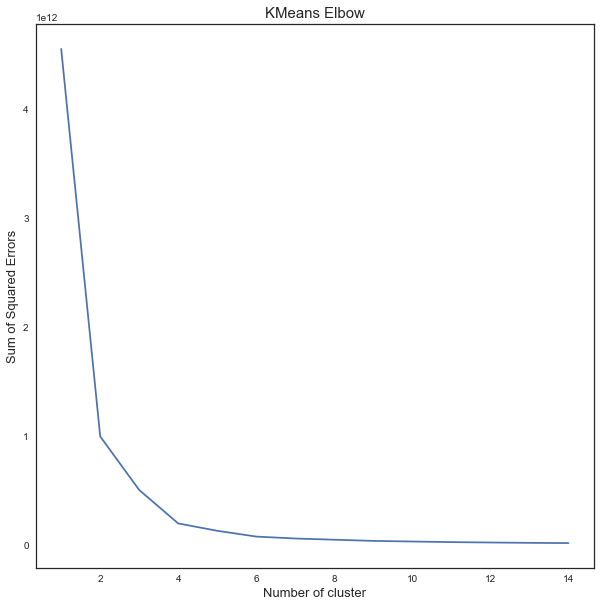

In [748]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(pitching_year)
    pitching_year['kmean_clusters'] = kmeans.labels_
    #print(batters["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(10,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('KMeans Elbow', fontsize=15)
plt.xlabel("Number of cluster", fontsize=13)
plt.ylabel("Sum of Squared Errors", fontsize=13)
plt.show()

In [749]:
ks = range(2,16)
sil = []

for n_cluster in range(2, 16):
    kmeans = KMeans(n_clusters=n_cluster).fit(pitching_year)
    label = kmeans.labels_
    sil_coeff = silhouette_score(pitching_year, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    sil.append(sil_coeff)

For n_clusters=2, The Silhouette Coefficient is 0.6952298395626949
For n_clusters=3, The Silhouette Coefficient is 0.6445219790479827
For n_clusters=4, The Silhouette Coefficient is 0.6997618989707152
For n_clusters=5, The Silhouette Coefficient is 0.7016211473912958
For n_clusters=6, The Silhouette Coefficient is 0.6844920939640555
For n_clusters=7, The Silhouette Coefficient is 0.6321158940927283
For n_clusters=8, The Silhouette Coefficient is 0.6235411230149234
For n_clusters=9, The Silhouette Coefficient is 0.588341888851402
For n_clusters=10, The Silhouette Coefficient is 0.5631923228060225
For n_clusters=11, The Silhouette Coefficient is 0.5675416546435622
For n_clusters=12, The Silhouette Coefficient is 0.5543724628909151
For n_clusters=13, The Silhouette Coefficient is 0.5096240099411983
For n_clusters=14, The Silhouette Coefficient is 0.5236077752888876
For n_clusters=15, The Silhouette Coefficient is 0.5428544230454253


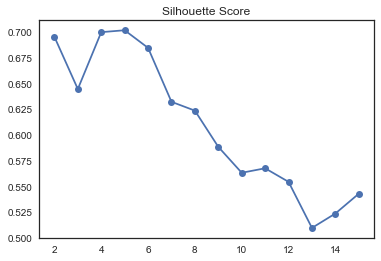

In [750]:
plt.plot(ks, sil, '-o')
plt.title('Silhouette Score');

In [751]:
pitching_year['year'] = batting_year.index

In [752]:
# Call k-means to cluster the stats
kmeans = KMeans(n_clusters=8, random_state=42)
model = kmeans.fit(pitching_year)
centroids = pd.DataFrame(model.cluster_centers_, columns = pitching_year.columns)

In [753]:
pitching_year.columns

Index(['w', 'l', 'g', 'gs', 'cg', 'sho', 'sv', 'ipouts', 'h', 'er', 'hr', 'bb',
       'so', 'baopp', 'ibb', 'wp', 'hbp', 'bk', 'bfp', 'gf', 'r', 'sh', 'sf',
       'gidp', 'est_pc', 'period', 'era', 'whip', 'kmeans_clusters', 'year',
       'hdb_clusters', 'kmean_clusters'],
      dtype='object')

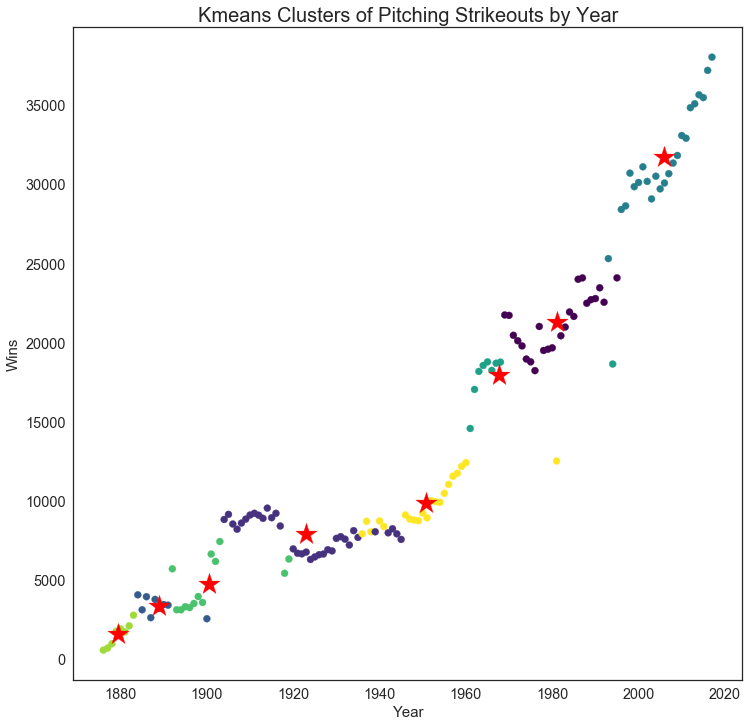

In [754]:
plt.figure(figsize=(12,12))
plt.tick_params(axis='both', which='both', direction='in', labelsize='x-large')
plt.scatter(pitching_year['year'], pitching_year['so'],
                c=pitching_year['kmeans_clusters'], marker=None, vmin=None, vmax=None,
                alpha=None, cmap='viridis')
plt.scatter(centroids['year'], centroids['so'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters of Pitching Strikeouts by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Wins', fontsize=15);

## HDBSCAN

In [755]:
hdb = HDBSCAN(min_cluster_size=3)
hdb.fit(pitching_year)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=3, min_samples=None, p=None,
    prediction_data=False)

In [756]:
# investigate clusters to see how they are made up
pd.Series(hdb.labels_).value_counts().sort_index()

-1    13
 0     9
 1    21
 2     5
 3     9
 4     4
 5    18
 6    54
 7     9
dtype: int64

In [757]:
pitching_year['hdb_clusters'] = hdb.labels_

In [758]:
#making a function to later display clusters

#show_cluster_results will take:
# a 'k' to indicate which cluster value to display
# a 'cluster_column' to indicate which column to filter on;
# a 'df', a 'by', and a 'limit'

def show_cluster_results(k, cluster_column,
                        df=pitching_year,
                        by='era',
                        limit=15):
    return df[df[cluster_column] == k].sort_values(by=by, ascending=False).head(limit)

In [759]:
show_cluster_results(2, 'hdb_clusters')

w    l    g   gs   cg  sho  sv  ipouts     h    er       ...        \
year                                                             ...         
1883  381  365  817  759  694   37   9   19970  7176  2224       ...         
1882  329  318  678  653  626   40   1   17530  5920  1830       ...         
1881  321  303  658  630  592   51   0   16738  5838  1666       ...         
1879  312  298  647  619  588   44   2   16752  5892  1513       ...         
1880  323  308  709  648  581   50  12   17145  5546  1452       ...         

       sf  gidp   est_pc  period    era   whip  kmeans_clusters  year  \
year                                                                    
1883  0.0   0.0  59832.0       0  3.312  0.146                6  1883   
1882  0.0   0.0  48384.0       0  3.003  0.136                6  1882   
1881  0.0   0.0  45297.0       0  2.899  0.141                6  1881   
1879  0.0   0.0  40206.0       0  2.551  0.131                6  1879   
1880  0.0   0.0  42585.0       0  2.425  0.124                6  1880   

      hdb_clusters  kmean_clusters  
year                                
1883             2               7  
1882             2               7  
1881             2               7  
1879             2               7  
1880             2               7  

[5 rows x 32 columns]

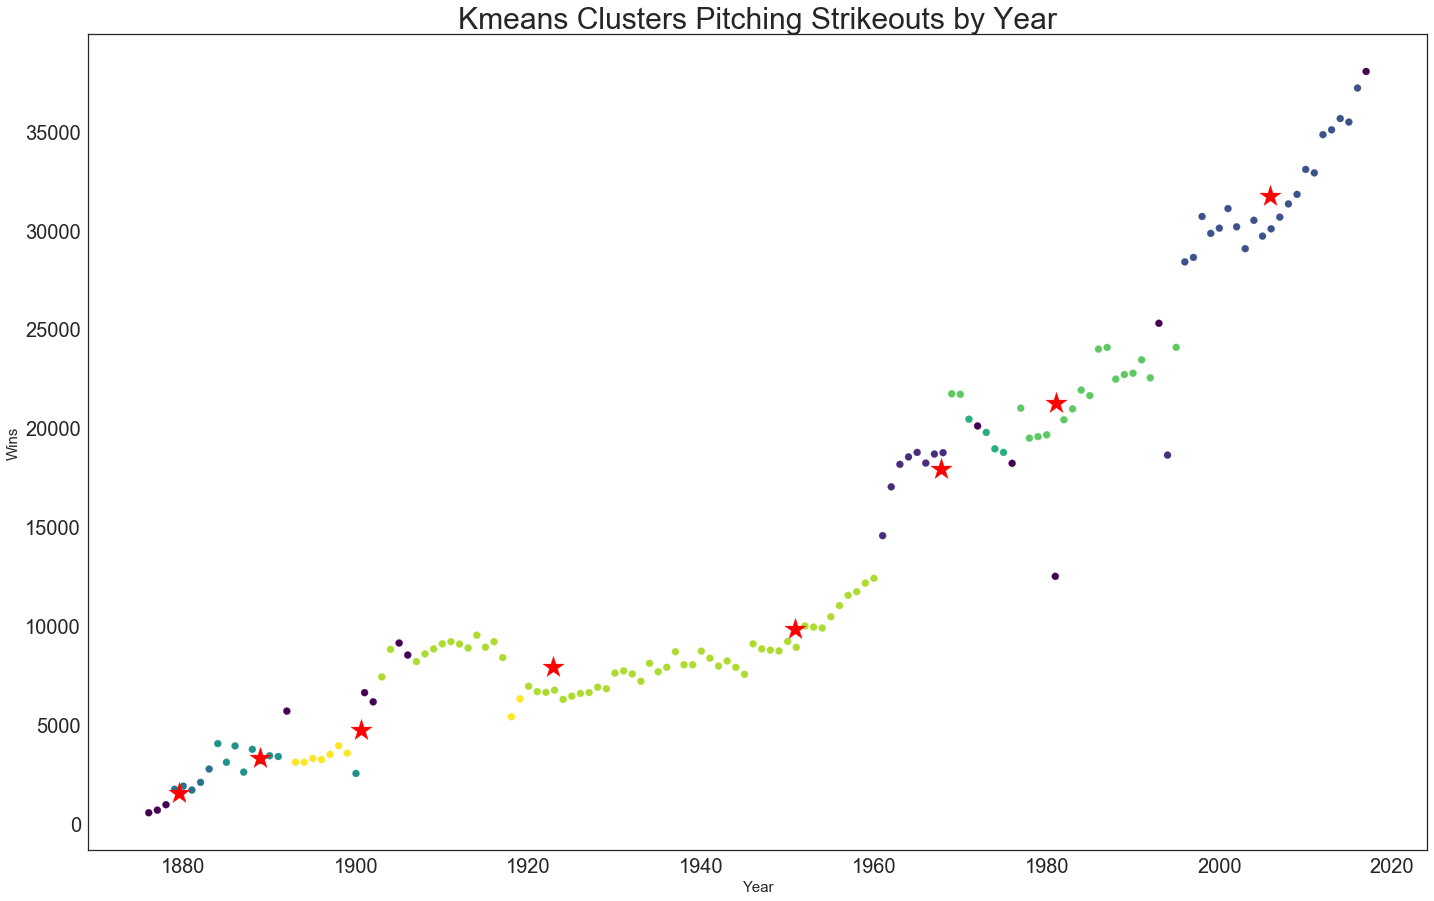

In [760]:

plt.figure(figsize=(24,15))
plt.scatter(pitching_year['year'], pitching_year['so'],
           c=pitching_year['hdb_clusters'], cmap='viridis')

plt.scatter(centroids['year'], centroids['so'],
           c='red', marker='*', s=500)
plt.title('Kmeans Clusters Pitching Strikeouts by Year', fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Wins', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# Model the Data

In [761]:
# Define my x and y
# we will test one cluster at a time
features = [each for each in pitching_year.columns if each not in ['year', 'period']]
X = pitching_year[features]
y = pitching_year['period']

In [762]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [763]:
X_train.head()

w     l      g    gs    cg  sho    sv  ipouts      h     er  \
year                                                                   
1986  2062  2009  11295  4043   573  138   999  109206  35417  15884   
1918   933   926   2688  1889  1205  183   104   50627  15567   5073   
1993  2203  2157  14223  4308   368   99  1186  116337  39113  17824   
1962  1586  1558   7869  3148   830  165   608   84088  27428  12154   
1971  1904  1894   9325  3806  1072  263   681  101845  31742  13010   

           ...            r      sh      sf    gidp    est_pc    era   whip  \
year       ...                                                                
1986       ...        17693  1460.0  1130.0  3000.0  489330.0  4.173  0.157   
1918       ...         6629     0.0     0.0     0.0  158226.0  2.859  0.140   
1993       ...        19702  1734.0  1361.0  3281.0  520344.0  4.406  0.159   
1962       ...        13785     0.0     0.0     0.0  363480.0  4.115  0.156   
1971       ...        14637  1746.0   960.0     0.0  427965.0  3.717  0.152   

      kmeans_clusters  hdb_clusters  kmean_clusters  
year                                                 
1986                0             5               9  
1918                5             7              11  
1993                3            -1               9  
1962                4             0               5  
1971                0             4               2  

[5 rows x 30 columns]

In [764]:
y_train.head()

year
1986    5
1918    1
1993    5
1962    4
1971    4
Name: period, dtype: int64

In [765]:
pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

params = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__criterion': ['gini', 'entropy'],
    'rf__verbose': [2],
    'rf__n_jobs': [-1],
    'rf__random_state': [42]
}
gs_rf = GridSearchCV(pipe_rf, params, n_jobs=-1, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)
gs_rf.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.5s finished


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10building tree 7 of 10

building tree 8 of 10
building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9528301886792453

In [766]:
gs_rf.best_params_

{'rf__criterion': 'entropy',
 'rf__n_estimators': 10,
 'rf__n_jobs': -1,
 'rf__random_state': 42,
 'rf__verbose': 2}

In [767]:
gs_rf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.8888888888888888

In [768]:
y_preds_gs_rf = gs_rf.predict(X_test)

confusion_matrix(y_test, y_preds_gs_rf)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[7, 1, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2, 1]], dtype=int64)

In [769]:
gs_rf.predict_proba(X_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.4],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0.2, 0. , 0. ],
       [0. , 0. , 0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.3, 0.7, 0. , 0. , 0. , 0. ],
       [0.8, 0. , 0.1, 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.7, 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.9, 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.4],
       [0. , 0. , 0.9, 0.1, 0. , 0. , 0. , 0. ],
       [0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0.6, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0.1],
       [0. , 0. , 0.3, 0.7, 0. , 0. , 0. , 0. ],
       [1. , 0. , 0.

In [770]:
X_test

w     l      g    gs    cg  sho    sv  ipouts      h     er  \
year                                                                   
2007  2324  2262  18341  4517   110   41  1189  123070  42103  19878   
1895   734   705   1721  1461  1192   44    31   37945  15204   6474   
1957  1211  1185   5666  2406   700  135   380   64733  21014   9044   
1972  1829  1789   8656  3612  1001  293   719   97088  29270  11553   
1932  1193  1189   4347  2403  1105  115   186   64006  23174   9793   
1888   499   492   1034  1017   986   88     2   26776   8257   2716   
1974  1899  1875   8906  3778  1075  222   506  101490  32695  13464   
1941  1183  1171   4491  2374  1042  155   212   63250  21365   9038   
1942  1184  1161   4347  2364  1105  172   196   63171  20227   8024   
1894   746   693   1725  1458  1208   29    31   38006  16080   7217   
1927  1198  1181   4213  2400  1170  124   193   63566  22955   9333   
1953  1214  1196   5343  2417   852  155   340   64233  21715   9705   
1969  1907  1859   9550  3771   976  242   731  100861  31169  13275   
1991  2049  1999  12559  4004   364  106  1125  108576  34732  15409   
2006  2340  2249  17774  4495   141   60  1198  122199  42029  19988   
1940  1196  1183   4612  2401  1075  136   232   63722  22022   9536   
1903  1050   998   2345  2068  1787  156    44   54643  18105   6140   
1945  1170  1151   4300  2341  1097  178   210   62412  20795   8178   
2000  2351  2297  16335  4607   229   69  1173  123646  42611  21283   
1949  1215  1191   5055  2428   970  170   240   64453  21464   9669   
1887   463   430    942   923   890   33     5   24067   8567   3429   
1994  1516  1472  10020  2939   243   65   774   80237  27554  13027   
1985  2045  2011  11003  4036   620  159   967  108776  35181  15422   
1988  2039  2009  10977  4016   609  178  1043  108264  34466  14746   
1931  1210  1198   4336  2431  1172  130   193   64297  23322   9711   
1921  1192  1169   3994  2363  1247  120   172   63294  23657   9308   
1885   411   398    829   815   796   67     3   21390   6798   2178   
1880   323   308    709   648   581   50    12   17145   5546   1452   
1902  1037   962   2247  2031  1804  152    31   53974  18206   6090   
1999  2356  2307  16489  4630   235   64  1211  124153  43087  21205   
1907  1158  1116   2979  2322  1735  267    85   61396  18271   5543   
1973  1910  1877   8786  3776  1048  232   809  101305  32782  13875   
1912  1162  1120   3406  2287  1364  152   122   60476  19936   7199   
1892   860   836   1909  1727  1547   88    23   45402  14557   5379   
1886   458   422    930   907   863   43     3   23421   7725   2722   
2016  2345  2265  19133  4537    83   36  1274  122878  39431  18514   

           ...            r      sh      sf    gidp    est_pc    era   whip  \
year       ...                                                                
2007       ...        21497  1440.0  1332.0  3732.0  585168.0  4.662  0.162   
1895       ...         9302     0.0     0.0     0.0  130392.0  4.900  0.179   
1957       ...        10116     0.0     0.0     0.0  261468.0  4.024  0.155   
1972       ...        13046  1692.0   832.0     0.0  406110.0  3.471  0.147   
1932       ...        11543     0.0     0.0     0.0  224103.0  4.470  0.165   
1888       ...         4446     0.0     0.0     0.0   82785.0  2.873  0.129   
1974       ...        15337  1675.0  1055.0  2998.0  421200.0  3.855  0.156   
1941       ...        10503     0.0     0.0     0.0  240726.0  4.080  0.162   
1942       ...         9438     0.0     0.0     0.0  229122.0  3.657  0.154   
1894       ...        10416     0.0     0.0     0.0  139803.0  5.409  0.193   
1927       ...        11132     0.0     0.0     0.0  213834.0  4.224  0.164   
1953       ...        10944     0.0     0.0     0.0  255273.0  4.484  0.165   
1969       ...        15048     0.0     0.0     0.0  446181.0  3.844  0.153   
1991       ...        17033  1549.0  1175.0  2888.0  477459.0  4.049  0.152   
2006    